In [1]:
library(DESeq2)
library(RColorBrewer)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [2]:
library(reshape2)


In [3]:
library("gplots")



Attaching package: ‘gplots’


The following object is masked from ‘package:IRanges’:

    space


The following object is masked from ‘package:S4Vectors’:

    space


The following object is masked from ‘package:stats’:

    lowess




In [4]:
library("GGally")                      # Load GGally package

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [5]:
library(goseq)

Loading required package: BiasedUrn

Loading required package: geneLenDataBase


Attaching package: ‘geneLenDataBase’


The following object is masked from ‘package:S4Vectors’:

    unfactor






In [6]:
library(readxl)
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRan

In [7]:
library("pheatmap")
library("RColorBrewer")

In [8]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [9]:
PRO_COLOR = 'MediumSeaGreen'
ALT_COLOR = 'Gold'
HCOLOR = '#E26A2C'
HCOLOR = '#984215'
 
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(A = HCOLOR_light, C = HCOLOR),
    treatment = c(ref = gpal[2], long.term=gpal[4])
)
#forder = ['med4 (AX)', 'med4 (CC)', '1A3 (CC)', '1A3 (AX)']
#fpal = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  ]


In [10]:
list.files()

[1] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
[2] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
[3] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
[4] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
[5] "CC1A3 WGCNA CC.ipynb"                         
[6] "data"                                         
[7] "DE_results"

In [11]:
fname_counts = file.path('data', 'HOT1A3_counts_combined.txt')

In [12]:
cdf = read.csv(fname_counts, sep='\t' )

In [13]:
rownames(cdf) = cdf$gene_id

In [14]:
md = read_excel(file.path('data', 'CC1A3_RNASEQ_metadata.xlsx'))

In [15]:
names(md)

[1] "sample_id"               "TGCnew#"                
 [3] "sample"                  "Conc.Qubit TGC [ng/ul]" 
 [5] "starting input RNA (ng)" "Lib_conc [ng/ul]"       
 [7] "Group"                   "Timepoint"              
 [9] "Replicate"               "Day"                    
[11] "extraction"              "techincal_replicate"

In [16]:
md = md %>% rename('init_RNA' = 'starting input RNA (ng)')

In [17]:
md = md %>% mutate(phase = factor(recode(Timepoint, 
                                  '1' = 'logExp', 
                                  '2' = 'decline' , 
                                  '3' = 'long-term' ,
                                  '4' = 'long-term' ,
                                  '5' = 'long-term' ,
                                         .default = 'NA'
                                 ), levels=c('logExp', 'decline', 'long-term', 'NA')))

In [18]:
group <- paste0(md$Group, md$Timepoint)
group
md$groupandtime = group

[1] "A1"       "A1"       "A1"       "A2"       "A2"       "A2"      
 [7] "A3"       "A3"       "A3"       "C1"       "C1"       "C1"      
[13] "C2"       "C2"       "C2"       "C2"       "C2"       "C3"      
[19] "C3"       "C3"       "C3"       "C3"       "C4"       "C4"      
[25] "C4"       "C5"       "C5"       "C5"       "MockMock" "P1"      
[31] "P1"       "P1"       "P2"       "P2"       "P2"

In [19]:
md = md %>% mutate(treatment = factor(recode(groupandtime, 
                                  'A1' = 'ref', 
                                  'A2' = 'ref', 
                                  'A3' = 'ref', 
                                  'C1' = 'ref' , 
                                  'C3' = 'long.term' ,
                                  'C4' = 'long.term' ,
                                  'C5' = 'long.term' ,
                                         .default = 'NA'
                                 ), levels=c('ref', 'long.term', 'NA')))

In [20]:
head(md)

sample_id TGCnew# sample Conc.Qubit TGC [ng/ul] init_RNA Lib_conc [ng/ul]
1 A1A_S7     7      A1A    168.0                  100      0.888           
2 A1B_S8     8      A1B     99.8                  100      0.850           
3 A1C_S9     9      A1C     57.3                  100      1.570           
4 A2A_S10   10      A2A     69.0                  100      0.592           
5 A2B_S11   11      A2B     41.9                  100      0.570           
6 A2C_S12   12      A2C     67.2                  100      0.980           
  Group Timepoint Replicate Day extraction techincal_replicate phase  
1 A     1         A         11  1          0                   logExp 
2 A     1         B         11  1          0                   logExp 
3 A     1         C         11  1          0                   logExp 
4 A     2         A         18  2          0                   decline
5 A     2         B         18  2          0                   decline
6 A     2         C         18  4          0                   decline
  groupandtime treatment
1 A1           ref      
2 A1           ref      
3 A1           ref      
4 A2           ref      
5 A2           ref      
6 A2           ref

In [21]:
md$Group = factor(md$Group, levels = c('P', 'C', 'A', 'Mock'))


In [22]:
head(cdf)

gene_id       gene product                                       
ACZ81_RS00005 ACZ81_RS00005 dnaA chromosomal replication initiator protein DnaA
ACZ81_RS00010 ACZ81_RS00010 dnaN DNA polymerase III subunit beta               
ACZ81_RS00015 ACZ81_RS00015 recF DNA replication/repair protein RecF           
ACZ81_RS00020 ACZ81_RS00020 gyrB DNA topoisomerase (ATP-hydrolyzing) subunit B 
ACZ81_RS00025 ACZ81_RS00025      hypothetical protein                          
ACZ81_RS00030 ACZ81_RS00030 glyS glycine--tRNA ligase subunit beta             
              protein_id     old_locus_tag A1A_S7 A1B_S8 A1C_S9 A2A_S10 A2B_S11
ACZ81_RS00005 WP_232375975.1 NA            5962   6211   1340   2294    7210   
ACZ81_RS00010 WP_012516526.1 NA            3590   2898    784    769    2761   
ACZ81_RS00015 WP_061438857.1 NA             806    756    203    284     613   
ACZ81_RS00020 WP_014977848.1 NA            5336   3735    960   1092    3754   
ACZ81_RS00025 WP_039234509.1 NA             171    106     63     73     185   
ACZ81_RS00030 WP_061438859.1 NA            3158   3375    515    737    2724   
              ⋯ C5A_S32 C5B_S33 C5C_S34 Mock_S35 P6A_S1 P6B_S2 P6C_S3 P7A_S4
ACZ81_RS00005 ⋯ 4223    5758    4907    3285     0      0      0      0     
ACZ81_RS00010 ⋯ 1840    2191    1626     536     0      0      0      0     
ACZ81_RS00015 ⋯  504     600     368     155     0      0      0      0     
ACZ81_RS00020 ⋯ 2491    3503    3177    1119     0      0      0      0     
ACZ81_RS00025 ⋯  119     170      96      58     0      0      0      0     
ACZ81_RS00030 ⋯ 3406    3858    3955    2218     0      0      0      0     
              P7B_S5 P7C_S6
ACZ81_RS00005 0      0     
ACZ81_RS00010 0      0     
ACZ81_RS00015 0      0     
ACZ81_RS00020 0      0     
ACZ81_RS00025 0      0     
ACZ81_RS00030 0      0

In [23]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [24]:
path_fname = file.path('..', 'genomes', 'HOT1A3', 'HOT1A3_pathways.csv')
path_df = read.csv(path_fname)

In [25]:
path_df = left_join(genes, path_df, by='protein_id')

In [26]:
head(md)
head(counts)
head(genes)

sample_id TGCnew# sample Conc.Qubit TGC [ng/ul] init_RNA Lib_conc [ng/ul]
1 A1A_S7     7      A1A    168.0                  100      0.888           
2 A1B_S8     8      A1B     99.8                  100      0.850           
3 A1C_S9     9      A1C     57.3                  100      1.570           
4 A2A_S10   10      A2A     69.0                  100      0.592           
5 A2B_S11   11      A2B     41.9                  100      0.570           
6 A2C_S12   12      A2C     67.2                  100      0.980           
  Group Timepoint Replicate Day extraction techincal_replicate phase  
1 A     1         A         11  1          0                   logExp 
2 A     1         B         11  1          0                   logExp 
3 A     1         C         11  1          0                   logExp 
4 A     2         A         18  2          0                   decline
5 A     2         B         18  2          0                   decline
6 A     2         C         18  4          0                   decline
  groupandtime treatment
1 A1           ref      
2 A1           ref      
3 A1           ref      
4 A2           ref      
5 A2           ref      
6 A2           ref

A1A_S7 A1B_S8 A1C_S9 A2A_S10 A2B_S11 A2C_S12 A3A_S13 A3B_S14
ACZ81_RS00005 5962   6211   1340   2294    7210    15750   5310    12332  
ACZ81_RS00010 3590   2898    784    769    2761     6439   1996     4657  
ACZ81_RS00015  806    756    203    284     613     1487    601     1265  
ACZ81_RS00020 5336   3735    960   1092    3754     9944   2587     5235  
ACZ81_RS00025  171    106     63     73     185      425    234      398  
ACZ81_RS00030 3158   3375    515    737    2724     7003   1917     5476  
              A3C_S15 C1A_S16 ⋯ C5A_S32 C5B_S33 C5C_S34 Mock_S35 P6A_S1 P6B_S2
ACZ81_RS00005 20033   2434    ⋯ 4223    5758    4907    3285     0      0     
ACZ81_RS00010  7835   1063    ⋯ 1840    2191    1626     536     0      0     
ACZ81_RS00015  1280    368    ⋯  504     600     368     155     0      0     
ACZ81_RS00020  7447   2153    ⋯ 2491    3503    3177    1119     0      0     
ACZ81_RS00025   748     73    ⋯  119     170      96      58     0      0     
ACZ81_RS00030  9922   1416    ⋯ 3406    3858    3955    2218     0      0     
              P6C_S3 P7A_S4 P7B_S5 P7C_S6
ACZ81_RS00005 0      0      0      0     
ACZ81_RS00010 0      0      0      0     
ACZ81_RS00015 0      0      0      0     
ACZ81_RS00020 0      0      0      0     
ACZ81_RS00025 0      0      0      0     
ACZ81_RS00030 0      0      0      0

gene_id       gene product                                       
ACZ81_RS00005 ACZ81_RS00005 dnaA chromosomal replication initiator protein DnaA
ACZ81_RS00010 ACZ81_RS00010 dnaN DNA polymerase III subunit beta               
ACZ81_RS00015 ACZ81_RS00015 recF DNA replication/repair protein RecF           
ACZ81_RS00020 ACZ81_RS00020 gyrB DNA topoisomerase (ATP-hydrolyzing) subunit B 
ACZ81_RS00025 ACZ81_RS00025      hypothetical protein                          
ACZ81_RS00030 ACZ81_RS00030 glyS glycine--tRNA ligase subunit beta             
              protein_id     old_locus_tag
ACZ81_RS00005 WP_232375975.1 NA           
ACZ81_RS00010 WP_012516526.1 NA           
ACZ81_RS00015 WP_061438857.1 NA           
ACZ81_RS00020 WP_014977848.1 NA           
ACZ81_RS00025 WP_039234509.1 NA           
ACZ81_RS00030 WP_061438859.1 NA

In [27]:
table(md$sample_id == names(counts))


TRUE 
  35 

# Remove the 60ng technical replicate and non P ,C samples

In [28]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [29]:
# remove last 5 lines that are not genes
counts = head(counts, -5)
genes = head(genes, -5)

In [30]:
md_noalt = filter(md, treatment %in% c('ref', 'long.term'), techincal_replicate %in% 0)


In [31]:
counts_no_alt = select(counts, md_noalt$sample_id)

In [32]:
table(md_noalt$sample_id == names(counts_no_alt))


TRUE 
  21 

In [33]:
cts = counts_no_alt
coldata= md_noalt


In [34]:
head(coldata)

sample_id TGCnew# sample Conc.Qubit TGC [ng/ul] init_RNA Lib_conc [ng/ul]
1 A1A_S7     7      A1A    168.0                  100      0.888           
2 A1B_S8     8      A1B     99.8                  100      0.850           
3 A1C_S9     9      A1C     57.3                  100      1.570           
4 A2A_S10   10      A2A     69.0                  100      0.592           
5 A2B_S11   11      A2B     41.9                  100      0.570           
6 A2C_S12   12      A2C     67.2                  100      0.980           
  Group Timepoint Replicate Day extraction techincal_replicate phase  
1 A     1         A         11  1          0                   logExp 
2 A     1         B         11  1          0                   logExp 
3 A     1         C         11  1          0                   logExp 
4 A     2         A         18  2          0                   decline
5 A     2         B         18  2          0                   decline
6 A     2         C         18  4          0                   decline
  groupandtime treatment
1 A1           ref      
2 A1           ref      
3 A1           ref      
4 A2           ref      
5 A2           ref      
6 A2           ref

In [35]:
head(cts)

A1A_S7 A1B_S8 A1C_S9 A2A_S10 A2B_S11 A2C_S12 A3A_S13 A3B_S14
ACZ81_RS00005 5962   6211   1340   2294    7210    15750   5310    12332  
ACZ81_RS00010 3590   2898    784    769    2761     6439   1996     4657  
ACZ81_RS00015  806    756    203    284     613     1487    601     1265  
ACZ81_RS00020 5336   3735    960   1092    3754     9944   2587     5235  
ACZ81_RS00025  171    106     63     73     185      425    234      398  
ACZ81_RS00030 3158   3375    515    737    2724     7003   1917     5476  
              A3C_S15 C1A_S16 ⋯ C1C_S18 C3A_100ng_S24 C3B_60ng_S26
ACZ81_RS00005 20033   2434    ⋯ 4198    7055          3550        
ACZ81_RS00010  7835   1063    ⋯ 1383    2942          2129        
ACZ81_RS00015  1280    368    ⋯  302     943          1028        
ACZ81_RS00020  7447   2153    ⋯ 2493    5736          2365        
ACZ81_RS00025   748     73    ⋯   46     202           244        
ACZ81_RS00030  9922   1416    ⋯ 1282    6619          1928        
              C3C_100ng_S27 C4A_S29 C4B_S30 C4C_S31 C5A_S32 C5B_S33 C5C_S34
ACZ81_RS00005 3148          3421    2905    1658    4223    5758    4907   
ACZ81_RS00010 1897          1526    1328     516    1840    2191    1626   
ACZ81_RS00015  482           412     323     387     504     600     368   
ACZ81_RS00020 3099          2082    1881     601    2491    3503    3177   
ACZ81_RS00025  201           107     131      98     119     170      96   
ACZ81_RS00030 3241          2500    2485     593    3406    3858    3955

In [36]:
coldata$groupandtime = factor(coldata$groupandtime, levels=c("A1", "A2",'A3',"C1", "C2", "C3", "C4", "C5"))
coldata$Group = factor(coldata$Group, levels=c("A", "C"))
coldata$Timepoint = factor(coldata$Timepoint, levels=c(1,2,3,4,5))
coldata$extraction = factor(coldata$extraction)
coldata$treatment = factor(coldata$treatment, levels=c('ref', 'long.term'))


In [37]:
colnames(cts) = coldata$sample
rownames(coldata) = coldata$sample


Warning message:
“Setting row names on a tibble is deprecated.”


In [38]:
dput(unique(coldata$groupandtime))
dput(unique(coldata$Group))

structure(c(1L, 2L, 3L, 4L, 6L, 7L, 8L), levels = c("A1", "A2", 
"A3", "C1", "C2", "C3", "C4", "C5"), class = "factor")
structure(1:2, levels = c("A", "C"), class = "factor")


In [39]:
rownames(coldata) = coldata$sample



Warning message:
“Setting row names on a tibble is deprecated.”


In [40]:
rownames(coldata)

[1] "A1A"   "A1B"   "A1C"   "A2A"   "A2B"   "A2C"   "A3A"   "A3B"   "A3C"  
[10] "C1A"   "C1B"   "C1C"   "C3A_1" "C3B"   "C3C_1" "C4A"   "C4B"   "C4C"  
[19] "C5A"   "C5B"   "C5C"

In [41]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [42]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design= ~treatment)

In [43]:
mcols(dds) <- DataFrame(mcols(dds), genes)
mcols(dds)

DataFrame with 4085 rows and 5 columns
                    gene_id        gene                product     protein_id
                <character> <character>            <character>    <character>
ACZ81_RS00005 ACZ81_RS00005        dnaA chromosomal replicat.. WP_232375975.1
ACZ81_RS00010 ACZ81_RS00010        dnaN DNA polymerase III s.. WP_012516526.1
ACZ81_RS00015 ACZ81_RS00015        recF DNA replication/repa.. WP_061438857.1
ACZ81_RS00020 ACZ81_RS00020        gyrB DNA topoisomerase (A.. WP_014977848.1
ACZ81_RS00025 ACZ81_RS00025               hypothetical protein WP_039234509.1
...                     ...         ...                    ...            ...
ACZ81_RS21685 ACZ81_RS21685                        transposase WP_232376038.1
ACZ81_RS21690 ACZ81_RS21690             transposase domain-c.. WP_080986484.1
ACZ81_RS21695 ACZ81_RS21695             IS66 family transpos..               
ACZ81_RS21700 ACZ81_RS21700                        transposase WP_232376039.1
ACZ81_RS21705 ACZ81_RS217

In [44]:
dds

class: DESeqDataSet 
dim: 4085 21 
metadata(1): version
assays(1): counts
rownames(4085): ACZ81_RS00005 ACZ81_RS00010 ... ACZ81_RS21700
  ACZ81_RS21705
rowData names(5): gene_id gene product protein_id old_locus_tag
colnames(21): A1A A1B ... C5B C5C
colData names(15): sample_id TGCnew# ... groupandtime treatment

In [45]:
keep <- rowSums(counts(dds)) >= 10
table(keep)
dds <- dds[keep,]

keep
FALSE  TRUE 
   70  4015 

In [46]:
names(colData(dds))

[1] "sample_id"              "TGCnew#"                "sample"                
 [4] "Conc.Qubit TGC [ng/ul]" "init_RNA"               "Lib_conc [ng/ul]"      
 [7] "Group"                  "Timepoint"              "Replicate"             
[10] "Day"                    "extraction"             "techincal_replicate"   
[13] "phase"                  "groupandtime"           "treatment"

In [47]:
dds$groupandtime = factor(dds$groupandtime, levels=c("A1", "A2", 'A3' ,"C1", "C2", "C3", "C4", "C5"))
dds$Group = factor(dds$Group, levels=c("A", "C"))
dds$Timepoint = factor(dds$Timepoint, levels=c(1,2,3,4,5))
dds$extraction = factor(dds$extraction)


In [48]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

A1A       A1B       A1C      A2A       A2B       A2C      
ACZ81_RS00005 11.989542 12.048218 11.41220 12.727223 12.706460 12.685363
ACZ81_RS00010 11.259557 10.951485 10.64182 11.153703 11.324364 11.397390
ACZ81_RS00015  9.120154  9.028852  8.71238  9.725009  9.168393  9.296757
              A3A       A3B       A3C       C1A      ⋯ C1C       C3A_1    
ACZ81_RS00005 12.105423 12.228423 12.460792 12.06128 ⋯ 13.351181 12.106031
ACZ81_RS00010 10.698057 10.827350 11.109525 10.86948 ⋯ 11.751472 10.847748
ACZ81_RS00015  8.981971  8.963547  8.521472  9.35041 ⋯  9.567912  9.219135
              C3B       C3C_1     C4A      C4B       C4C       C5A      
ACZ81_RS00005 11.396903 11.494763 11.92570 11.760170 11.559760 12.027539
ACZ81_RS00010 10.662042 10.766617 10.76462 10.634734  9.883979 10.832464
ACZ81_RS00015  9.619112  8.808774  8.89291  8.616847  9.472894  8.980471
              C5B       C5C     
ACZ81_RS00005 12.300639 12.33690
ACZ81_RS00010 10.910289 10.74777
ACZ81_RS00015  9.057113  8.62633

In [49]:
head(colData(vsd))

DataFrame with 6 rows and 16 columns
      sample_id   TGCnew#      sample Conc.Qubit TGC [ng/ul]  init_RNA
    <character> <numeric> <character>              <numeric> <numeric>
A1A      A1A_S7         7         A1A                  168.0       100
A1B      A1B_S8         8         A1B                   99.8       100
A1C      A1C_S9         9         A1C                   57.3       100
A2A     A2A_S10        10         A2A                   69.0       100
A2B     A2B_S11        11         A2B                   41.9       100
A2C     A2C_S12        12         A2C                   67.2       100
    Lib_conc [ng/ul]    Group Timepoint   Replicate         Day extraction
           <numeric> <factor>  <factor> <character> <character>   <factor>
A1A            0.888        A         1           A          11          1
A1B            0.850        A         1           B          11          1
A1C            1.570        A         1           C          11          1
A2A            0.592

In [50]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

A1A       A1B       A1C       A2A      A2B       A2C      
ACZ81_RS00005 12.033904 12.074250 11.646478 12.55182 12.537176 12.522122
ACZ81_RS00010 11.149314 10.933000 10.720087 11.07420 11.195267 11.247431
ACZ81_RS00015  9.074275  9.010597  8.794056  9.50199  9.107987  9.198582
              A3A       A3B       A3C       C1A       ⋯ C1C       C3A_1    
ACZ81_RS00005 12.113739 12.199149 12.362323 12.083278 ⋯ 13.006059 12.114157
ACZ81_RS00010 10.758211 10.846989 11.043512 10.876147 ⋯ 11.501872 10.861086
ACZ81_RS00015  8.978061  8.965211  8.662792  9.235708 ⋯  9.389737  9.143728
              C3B       C3C_1     C4A       C4B       C4C      C5A      
ACZ81_RS00005 11.636034 11.700480 11.990219 11.877830 11.74377 12.060024
ACZ81_RS00010 10.733600 10.805214 10.803868 10.715086 10.22021 10.850553
ACZ81_RS00015  9.428175  8.858751  8.916636  8.728535  9.32256  8.977047
              C5B       C5C     
ACZ81_RS00005 12.249589 12.27500
ACZ81_RS00010 10.904385 10.79229
ACZ81_RS00015  9.030261  8.73475

In [51]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

           A1A      A1B      A1C      A2A      A2B      A2C      A3A      A3B
A1B   35.99159                                                               
A1C   66.64245 59.54860                                                      
A2A   63.50933 62.86280 81.84785                                             
A2B   64.60271 60.71094 79.02289 45.12837                                    
A2C   60.26419 55.56988 76.21028 43.95660 32.83909                           
A3A   55.96524 51.80163 66.12763 55.70500 46.66086 44.16431                  
A3B   66.82551 58.86635 74.00386 57.54235 40.61117 42.21262 39.81567         
A3C   73.15125 63.21043 78.81661 58.40301 40.11357 39.08185 46.78251 31.55869
C1A   52.90230 45.73415 54.14226 62.31062 60.13535 52.93124 52.17379 58.53289
C1B   68.77810 63.26614 66.15646 65.35693 65.66462 51.12679 61.46832 66.29851
C1C   69.40914 64.27422 77.36051 63.12893 56.13630 48.68214 63.68064 62.16055
C3A_1 90.41811 83.06045 98.60583 76.94176 66.36125 62.81858 65.3

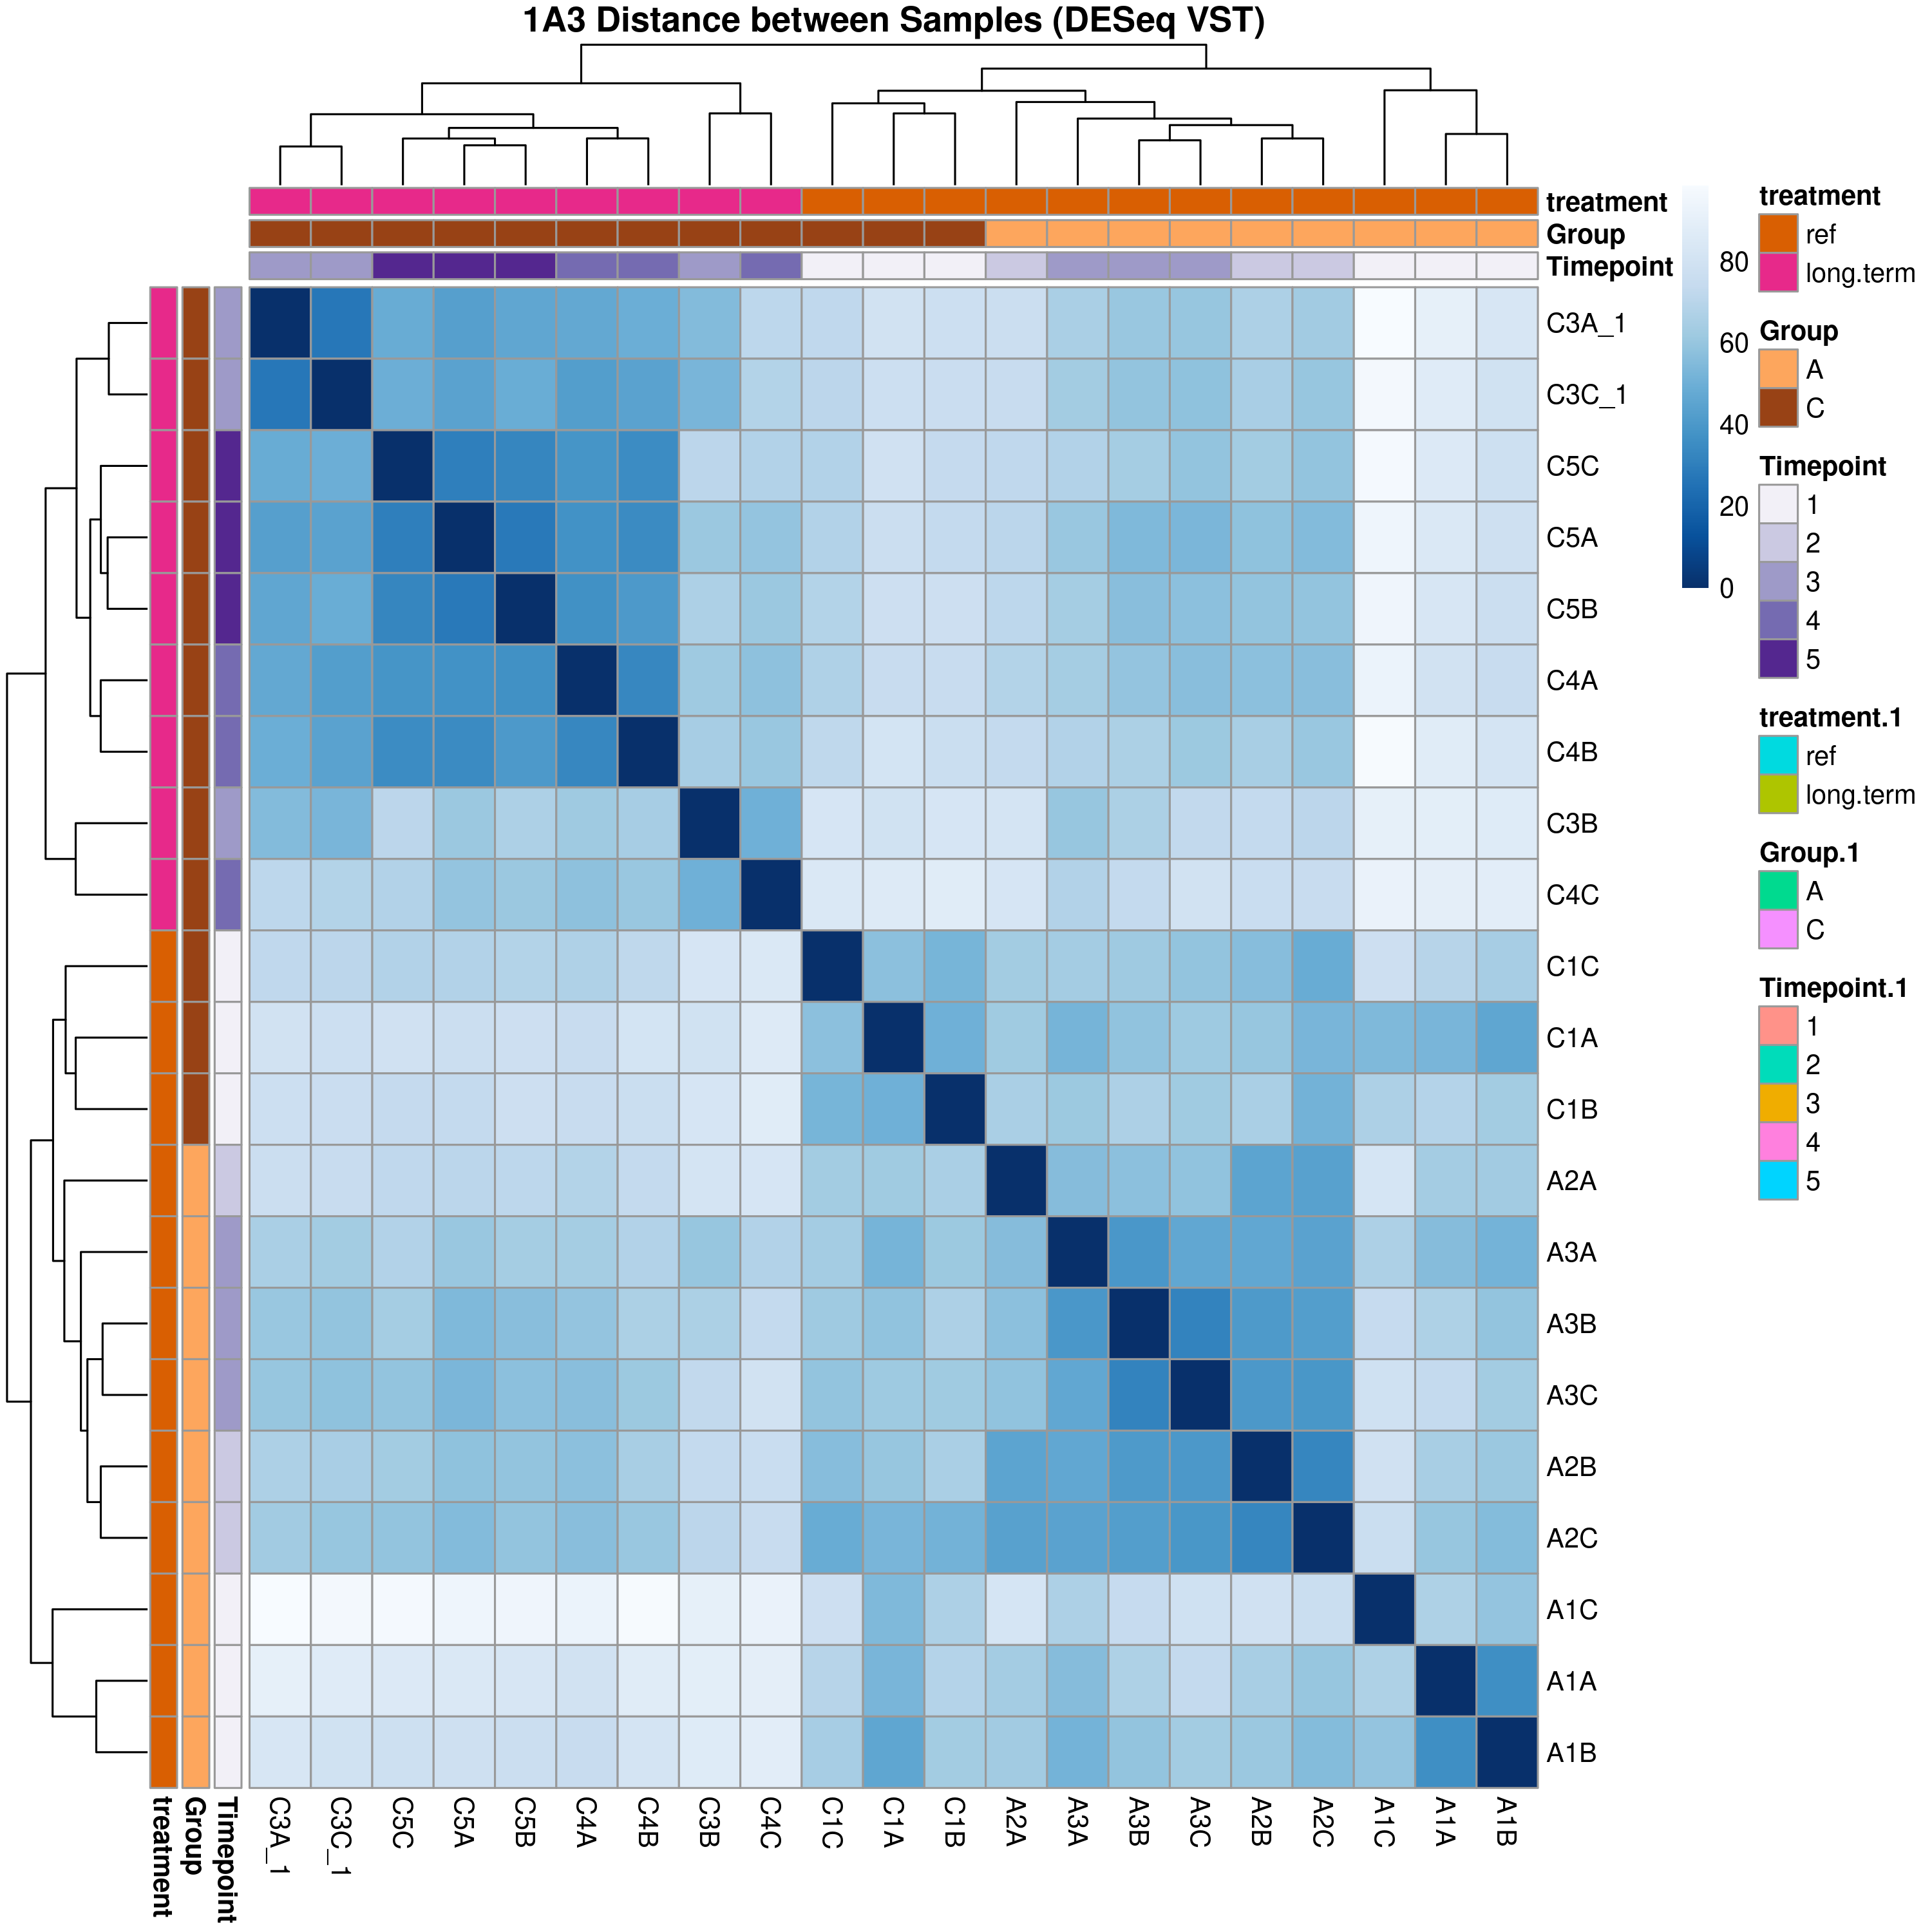

In [52]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- vsd$sample
colnames(sampleDistMatrix) <- vsd$sample
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
ann_df = colData(vsd)[c('Timepoint', 'Group', 'treatment')]

pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         annotation_row = ann_df,
         annotation_col = ann_df,
         annotation_colors = ann_colors,
         main = "1A3 Distance between Samples (DESeq VST)"
)

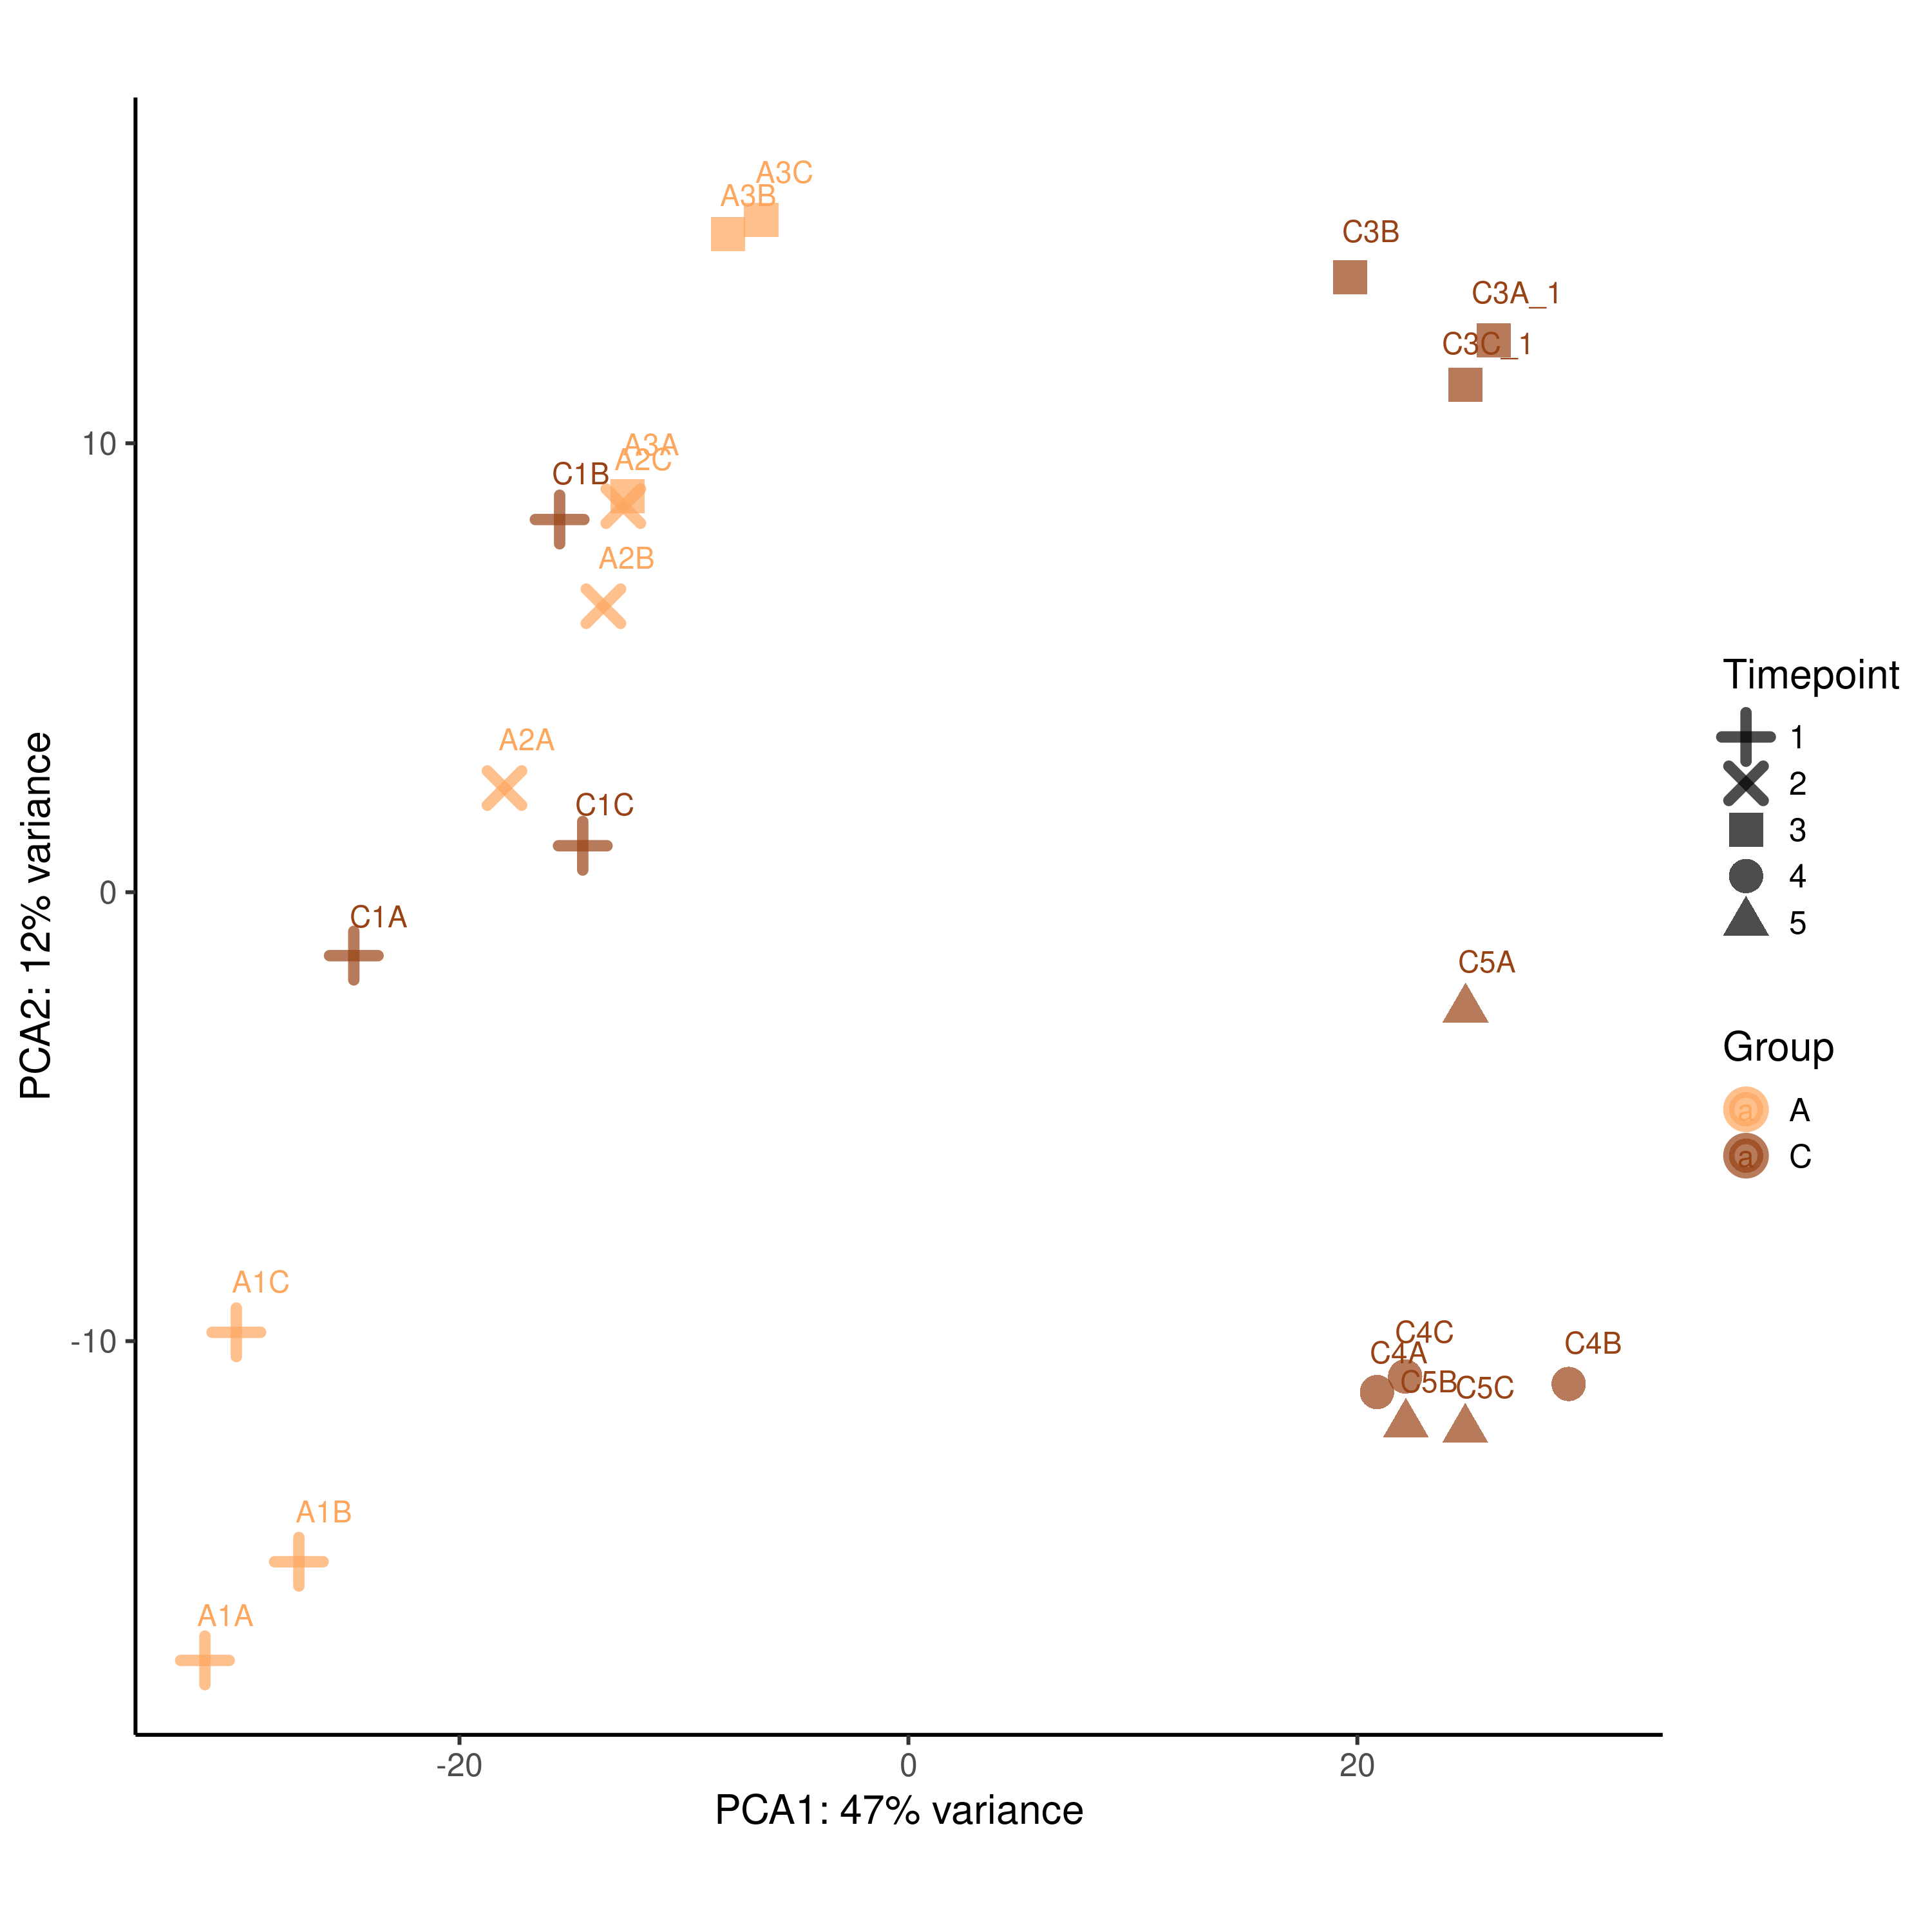

In [53]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1,  y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =4, stroke = 3, alpha=0.7, position=position_jitter(h=0.15,w=0.15)) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1, nudge_x=1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(3,4, 15,16,17))+
  #ggtitle("1A3 PCA (DESeq VST)") +
  theme_classic(base_size = 15)  



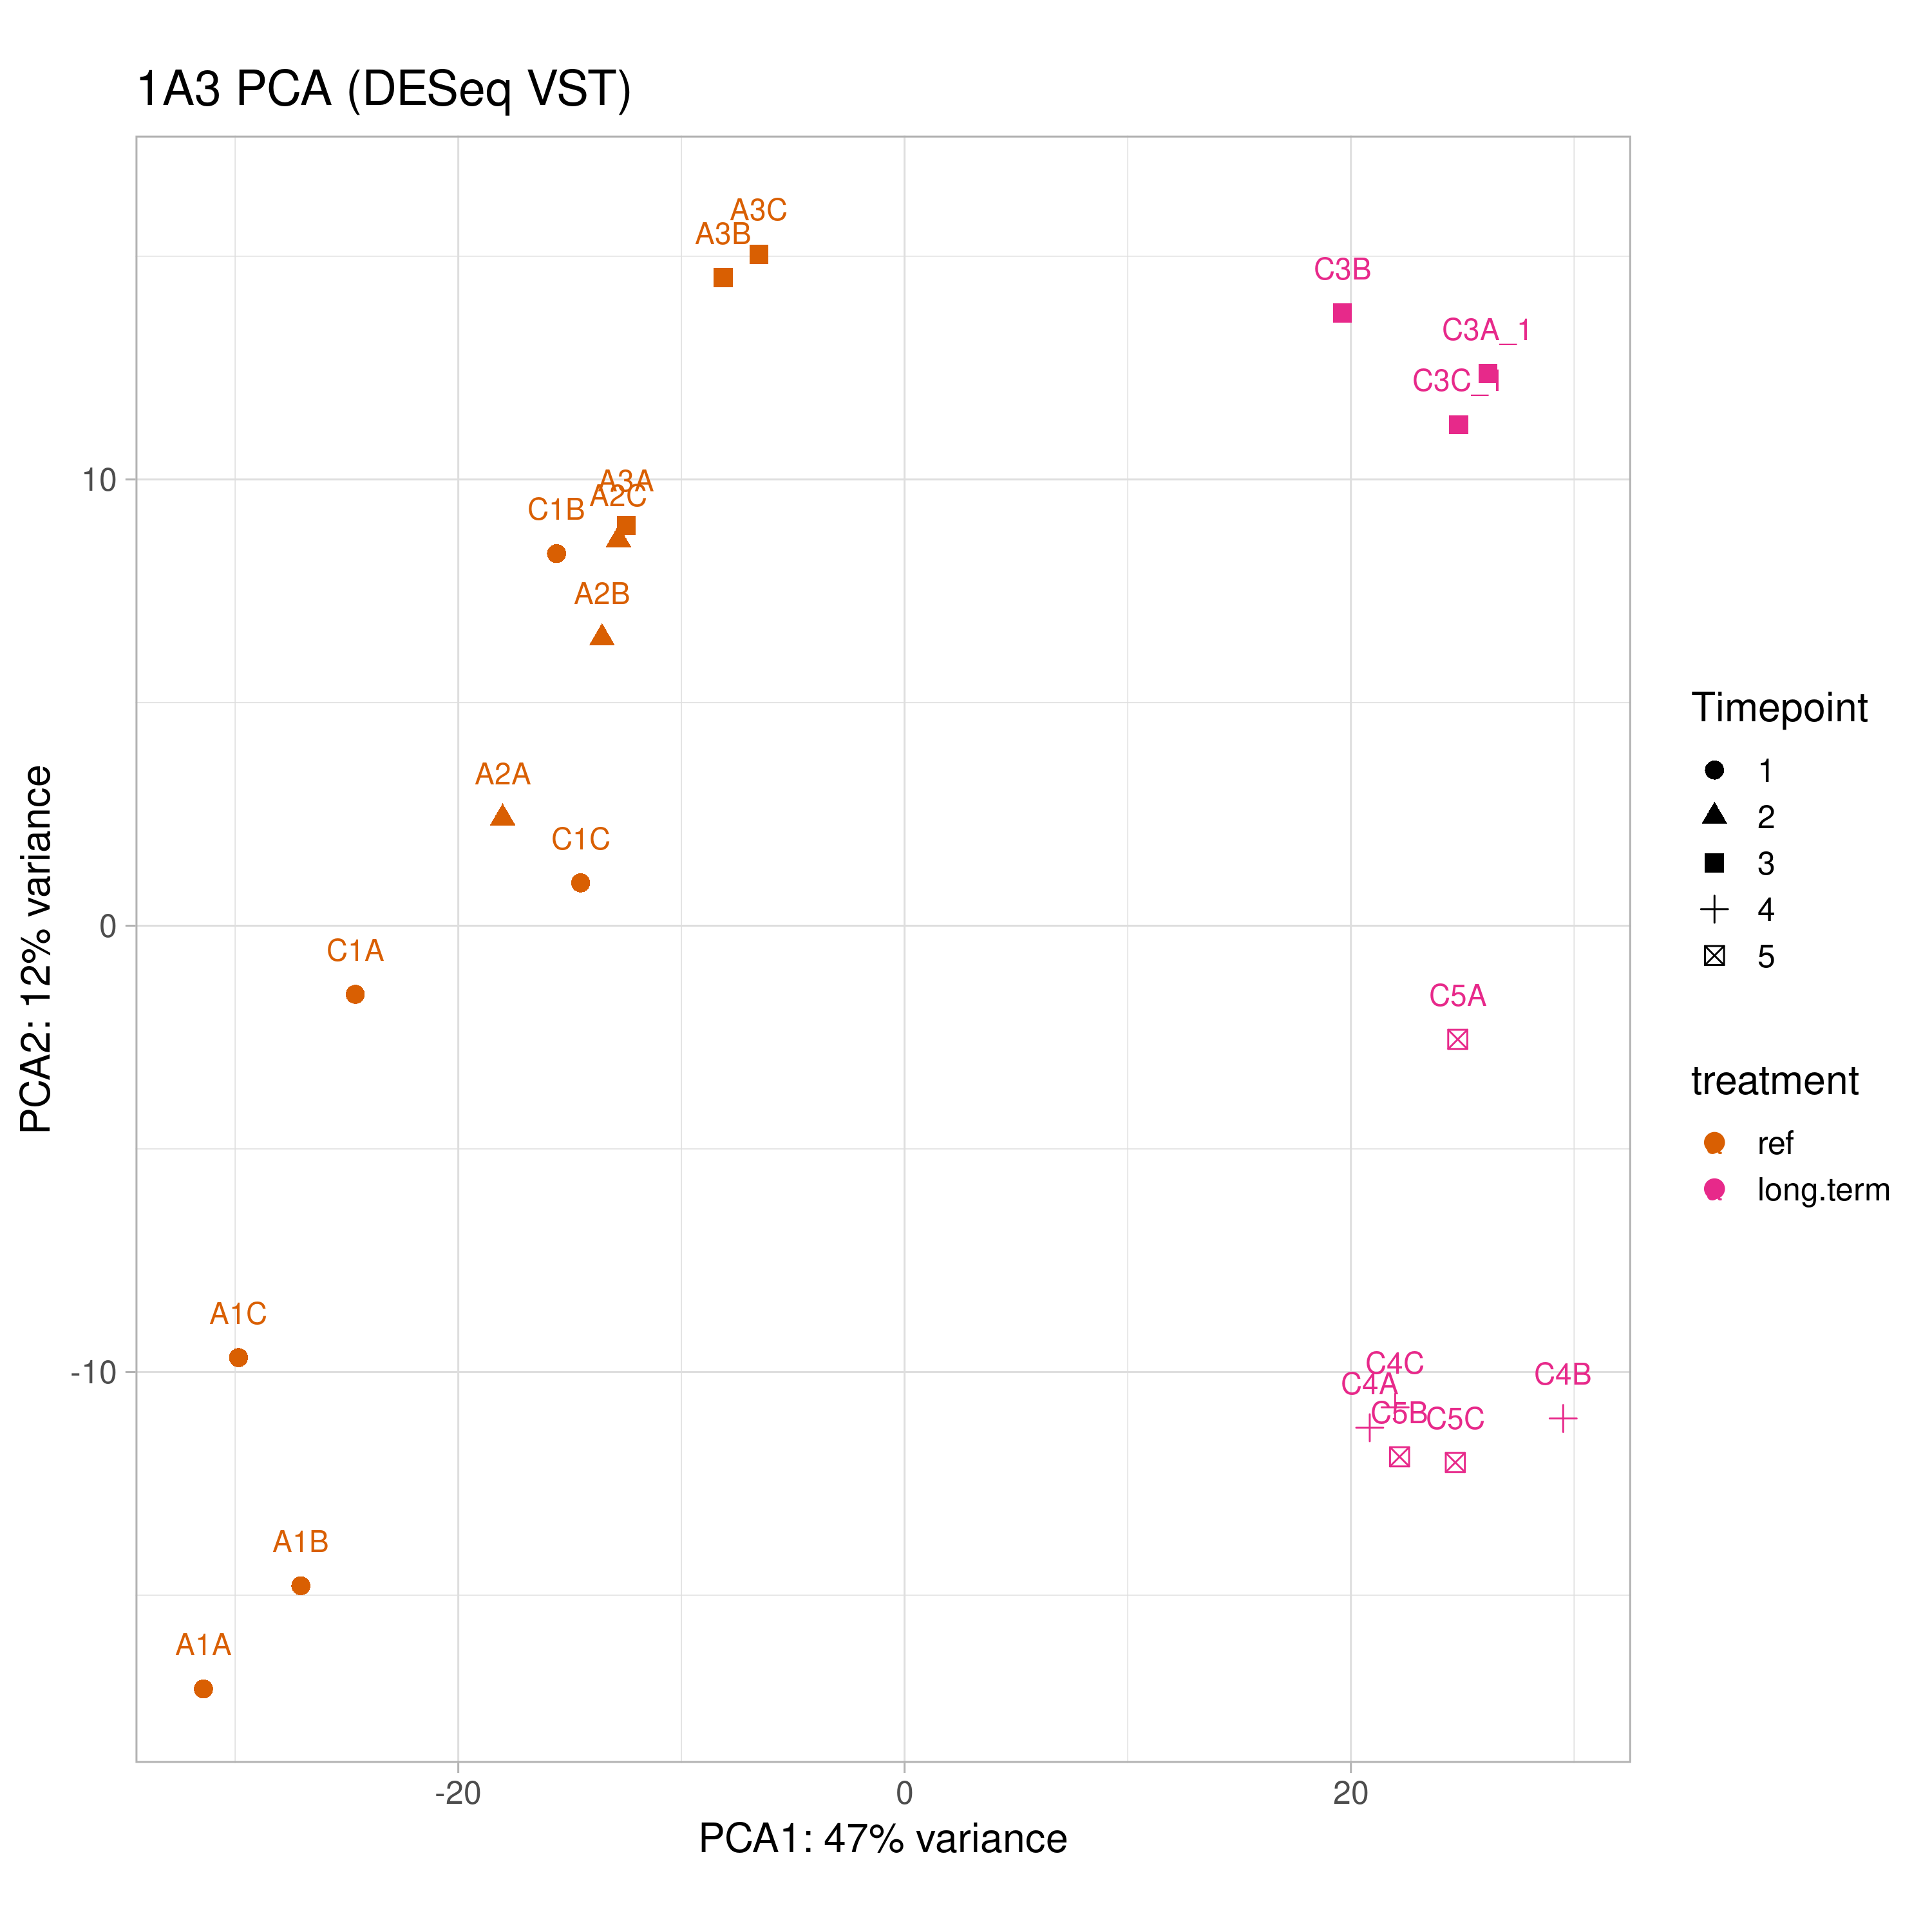

In [54]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = treatment, shape = Timepoint, label=sample)) +
  geom_point(size =3) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$treatment) +
  ggtitle("1A3 PCA (DESeq VST)") +
  theme_light(base_size = 15)



In [55]:
alpha = 0.01
lfcThreshold = 0.5

In [56]:
dds <- DESeq(dds)
res <- results(dds, alpha = alpha, lfcThreshold = lfcThreshold)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 11 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): treatment long.term vs ref 
Wald test p-value: treatment long.term vs ref 
DataFrame with 4015 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
ACZ81_RS00005  4746.948     -0.4903835  0.200709         0         1         1
ACZ81_RS00010  1970.935     -0.4174378  0.147356         0         1         1
ACZ81_RS00015   536.432     -0.0268106  0.189910         0         1         1
ACZ81_RS00020  2930.113     -0.3522575  0.225698         0         1         1
ACZ81_RS00025   150.214     -0.0673280  0.182578         0         1         1
...                 ...            ...       ...       ...       ...       ...
ACZ81_RS21670  283.3154      0.0549635  0.159211         0         1         1
ACZ81_RS21675 4900.4508     -0.1499061  0.383751         0         1         1
ACZ81_RS21680 2663.6516     -0.3348893  0.382490         0         1    

In [57]:
s = summary(res)
s


out of 4015 with nonzero total read count
adjusted p-value < 0.01
LFC > 0.50 (up)    : 107, 2.7%
LFC < -0.50 (down) : 242, 6%
outliers [1]       : 0, 0%
low counts [2]     : 78, 1.9%
(mean count < 13)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



NULL

In [58]:
sum_dds <- function(name) {
    res = results(dds, name=name, alpha = alpha, lfcThreshold = lfcThreshold)
    sum = table(as.data.frame(res) %>% mutate(na_pvalue = is.na(pvalue),
               na_padj = is.na(padj),
               significant = padj < 0.01,
               direction = if_else(log2FoldChange > 0, 'up', 'down'),
               status = if_else(na_pvalue, 'outlier',
                                if_else(na_padj, 'lowcount', 
                                        if_else(significant, direction, 'no_significant'
                                        
                               )))
               ) %>% select(status))
    #sum = cbind(sum, name=name)
    return(sum)
    }


In [59]:
get_dds <- function(name) {
    res = results(dds, name=name, alpha = alpha, lfcThreshold = lfcThreshold)
    res = as.data.frame(res) %>% 
       mutate(
           contrast = name,
           na_pvalue = is.na(pvalue),
           na_padj = is.na(padj),
           significant = padj < 0.01,
           direction = if_else(log2FoldChange > 0, 'up', 'down'),
           status = if_else(na_pvalue, 'outlier',
                            if_else(na_padj, 'lowcount', 
                                    if_else(significant, direction, 'no_significant'
                                           )))
       ) 
    return(res)
}


In [60]:
results_names = resultsNames(dds)

In [61]:
#bind_rows(
sum_df = lapply(results_names, sum_dds) %>% bind_rows 
sum_df$name = results_names
sum_df


no_significant up   down lowcount name                      
1   21           3994  NA  NA       Intercept                 
2 3588            107 242  78       treatment_long.term_vs_ref

In [62]:
sum_df = sum_df %>% 
   filter(name != 'Intercept') %>% 
   mutate(tot_fc = up + down, 
         name = str_remove(name, 'groupandtime_'))

In [63]:
sum_df

no_significant up  down lowcount name                       tot_fc
1 3588           107 242  78       treatment_long.term_vs_ref 349

In [64]:
res_df = lapply(results_names, get_dds) %>% 
  bind_rows %>%
  rownames_to_column(var = 'gene_id') 
write_csv(res_df, file.path('DE_results','HOT1A3_DE_DESEQ_results_ref_vs_long.csv'))


In [65]:
dds@design

~treatment

In [66]:
resLFC <- lfcShrink(dds, coef="treatment_long.term_vs_ref", type="apeglm")
resLFC

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): treatment long.term vs ref 
Wald test p-value: treatment long.term vs ref 
DataFrame with 4015 rows and 5 columns
               baseMean log2FoldChange     lfcSE    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric>
ACZ81_RS00005  4746.948     -0.4511605  0.196374 0.0145553 0.0361183
ACZ81_RS00010  1970.935     -0.3957117  0.145120 0.0046134 0.0139479
ACZ81_RS00015   536.432     -0.0243566  0.180566 0.8877312 0.9198041
ACZ81_RS00020  2930.113     -0.3123412  0.215913 0.1185841 0.1973126
ACZ81_RS00025   150.214     -0.0610278  0.174313 0.7123046 0.7833204
...                 ...            ...       ...       ...       ...
ACZ81_RS21670  283.3154      0.0513178  0.153625 0.7299267  0.797892
ACZ81_RS21675 4900.4508     -0.1042262  0.322881 0.6960681  0.770106
ACZ81_RS21680 2663.6516     -0.2382748  0.331901 0.3812741  0.492858
ACZ81_RS21685   78.6416      0.2691540  0.151832 0.0661159  0.123987
ACZ81_RS21705   40.1425     -0.329

In [67]:
resOrdered <- res[order(res$pvalue),]

In [68]:
summary(resLFC)


out of 4015 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 961, 24%
LFC < 0 (down)     : 1075, 27%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [69]:
summary(res)


out of 4015 with nonzero total read count
adjusted p-value < 0.01
LFC > 0.50 (up)    : 107, 2.7%
LFC < -0.50 (down) : 242, 6%
outliers [1]       : 0, 0%
low counts [2]     : 78, 1.9%
(mean count < 13)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [70]:
sum(res$padj < 0.01, na.rm=TRUE)

[1] 349

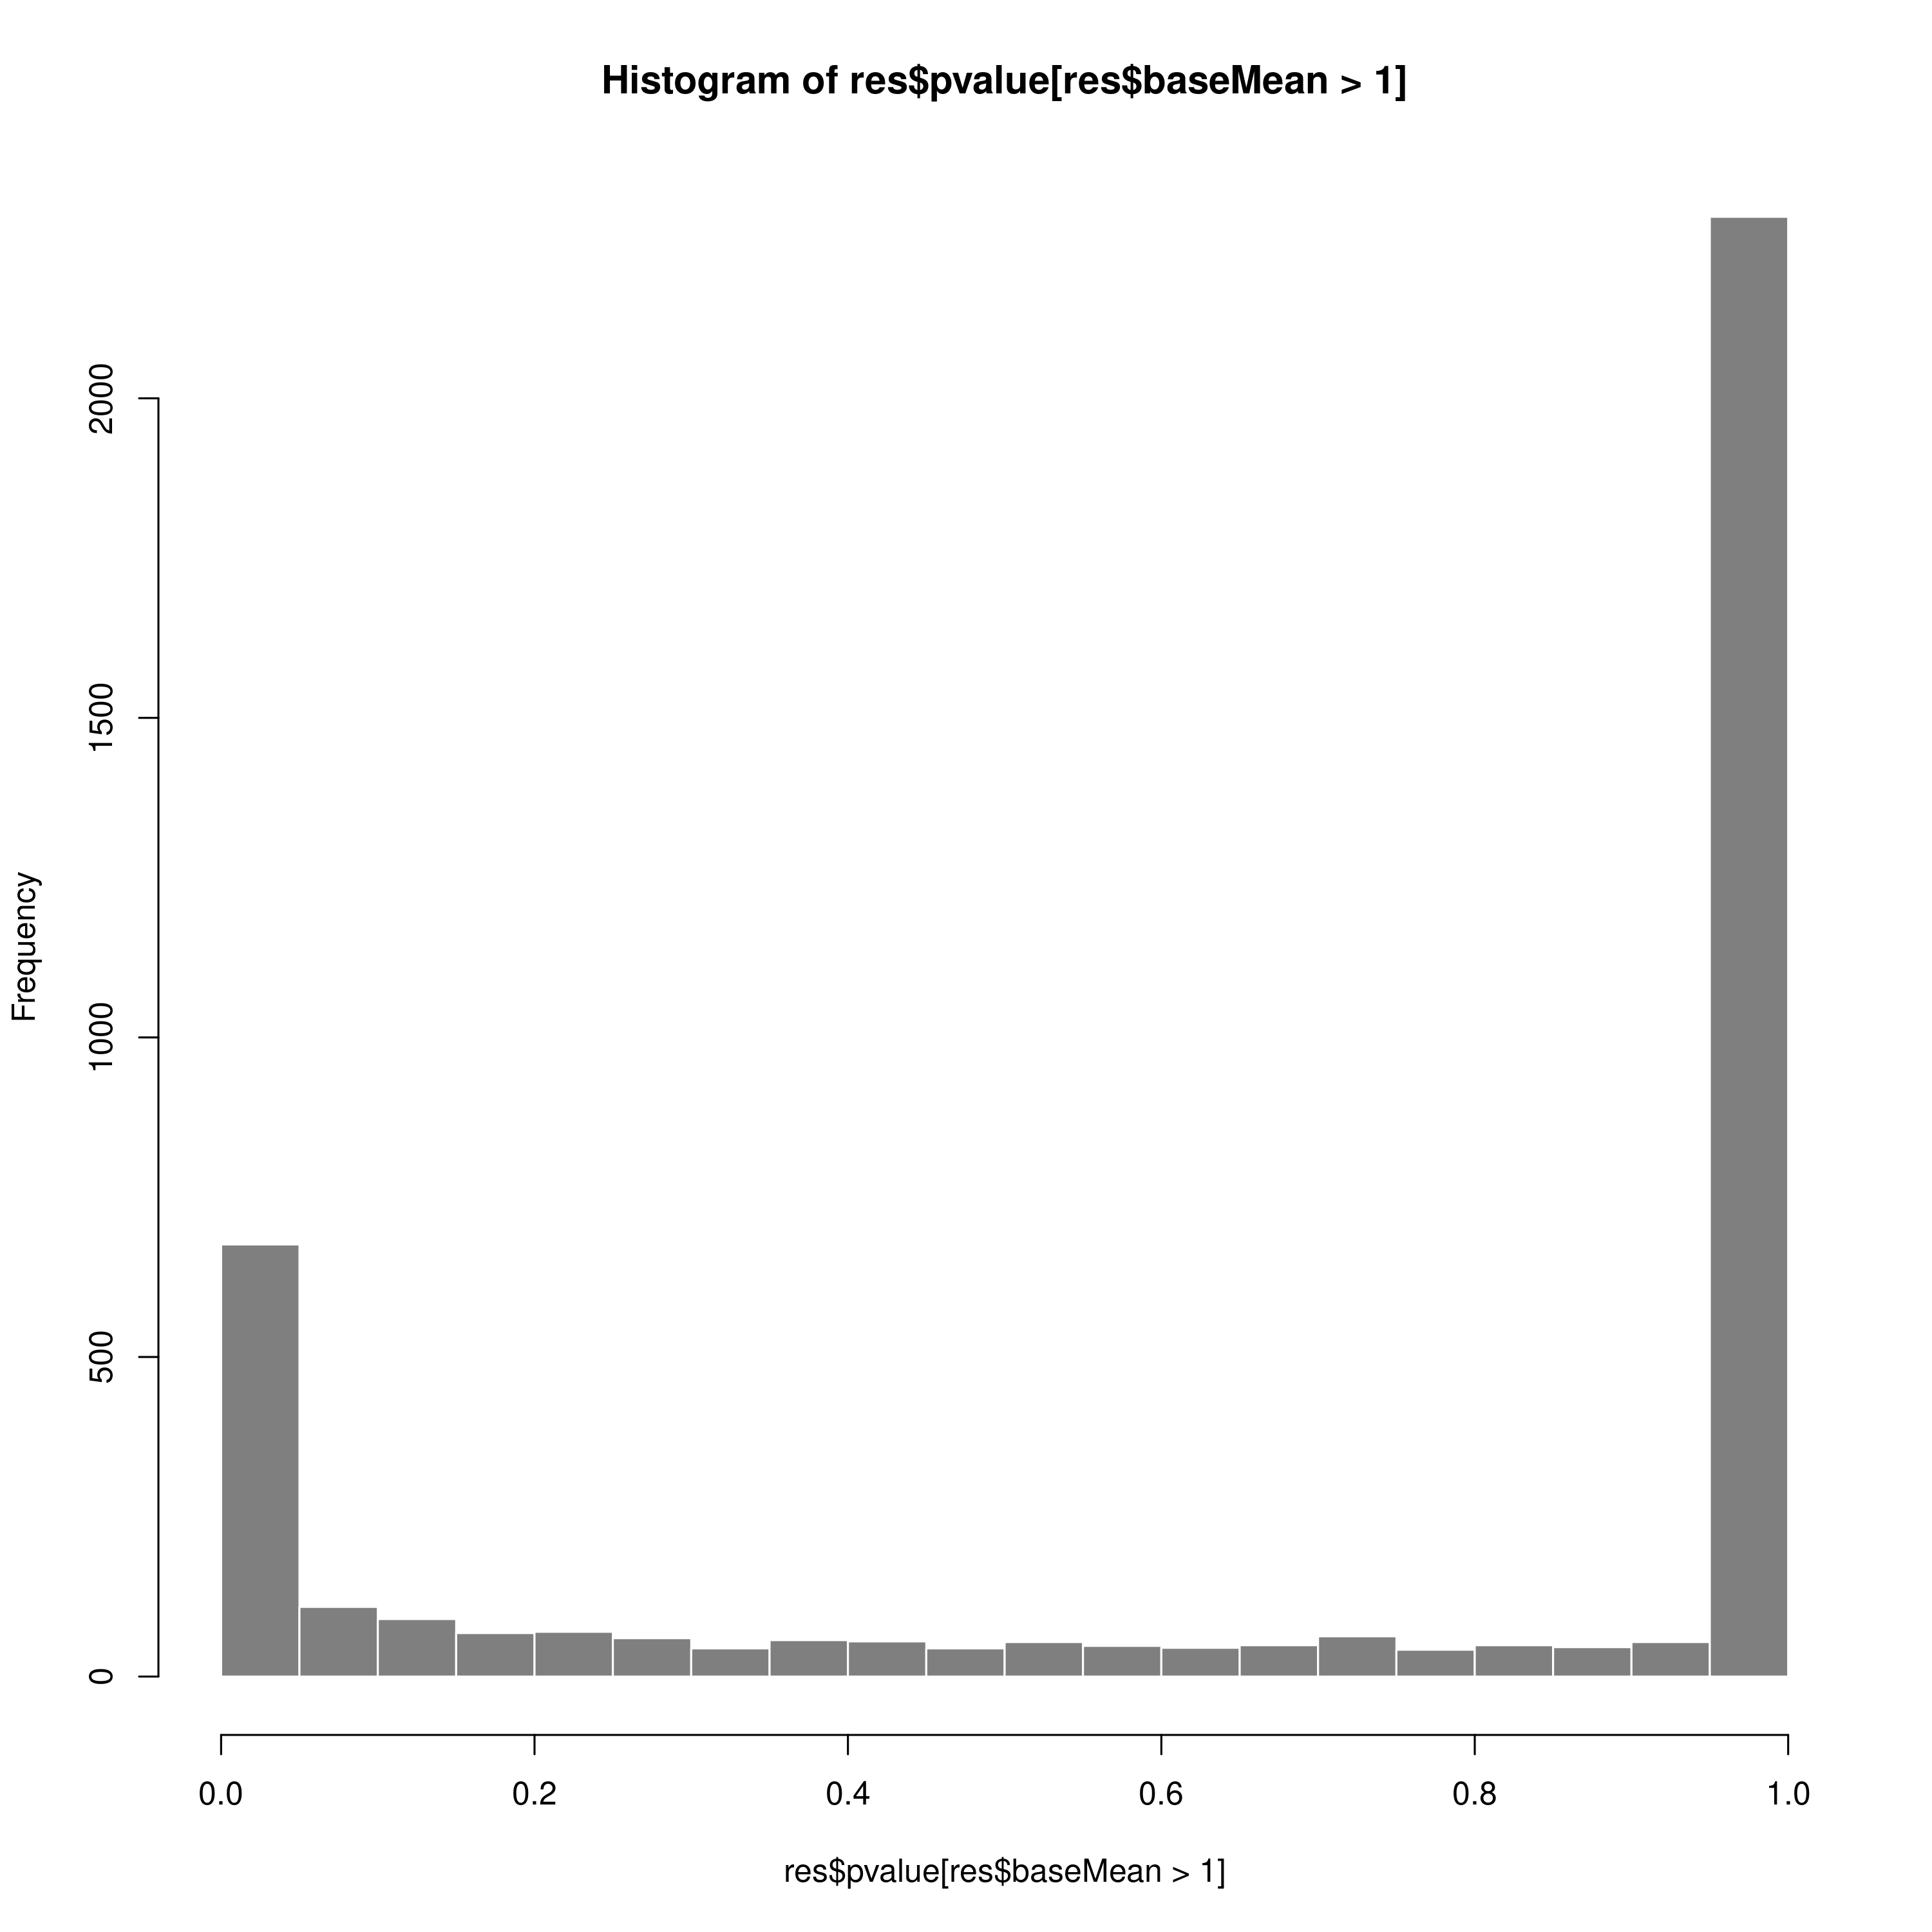

In [71]:
hist(res$pvalue[res$baseMean > 1], breaks = 0:20/20,
     col = "grey50", border = "white")

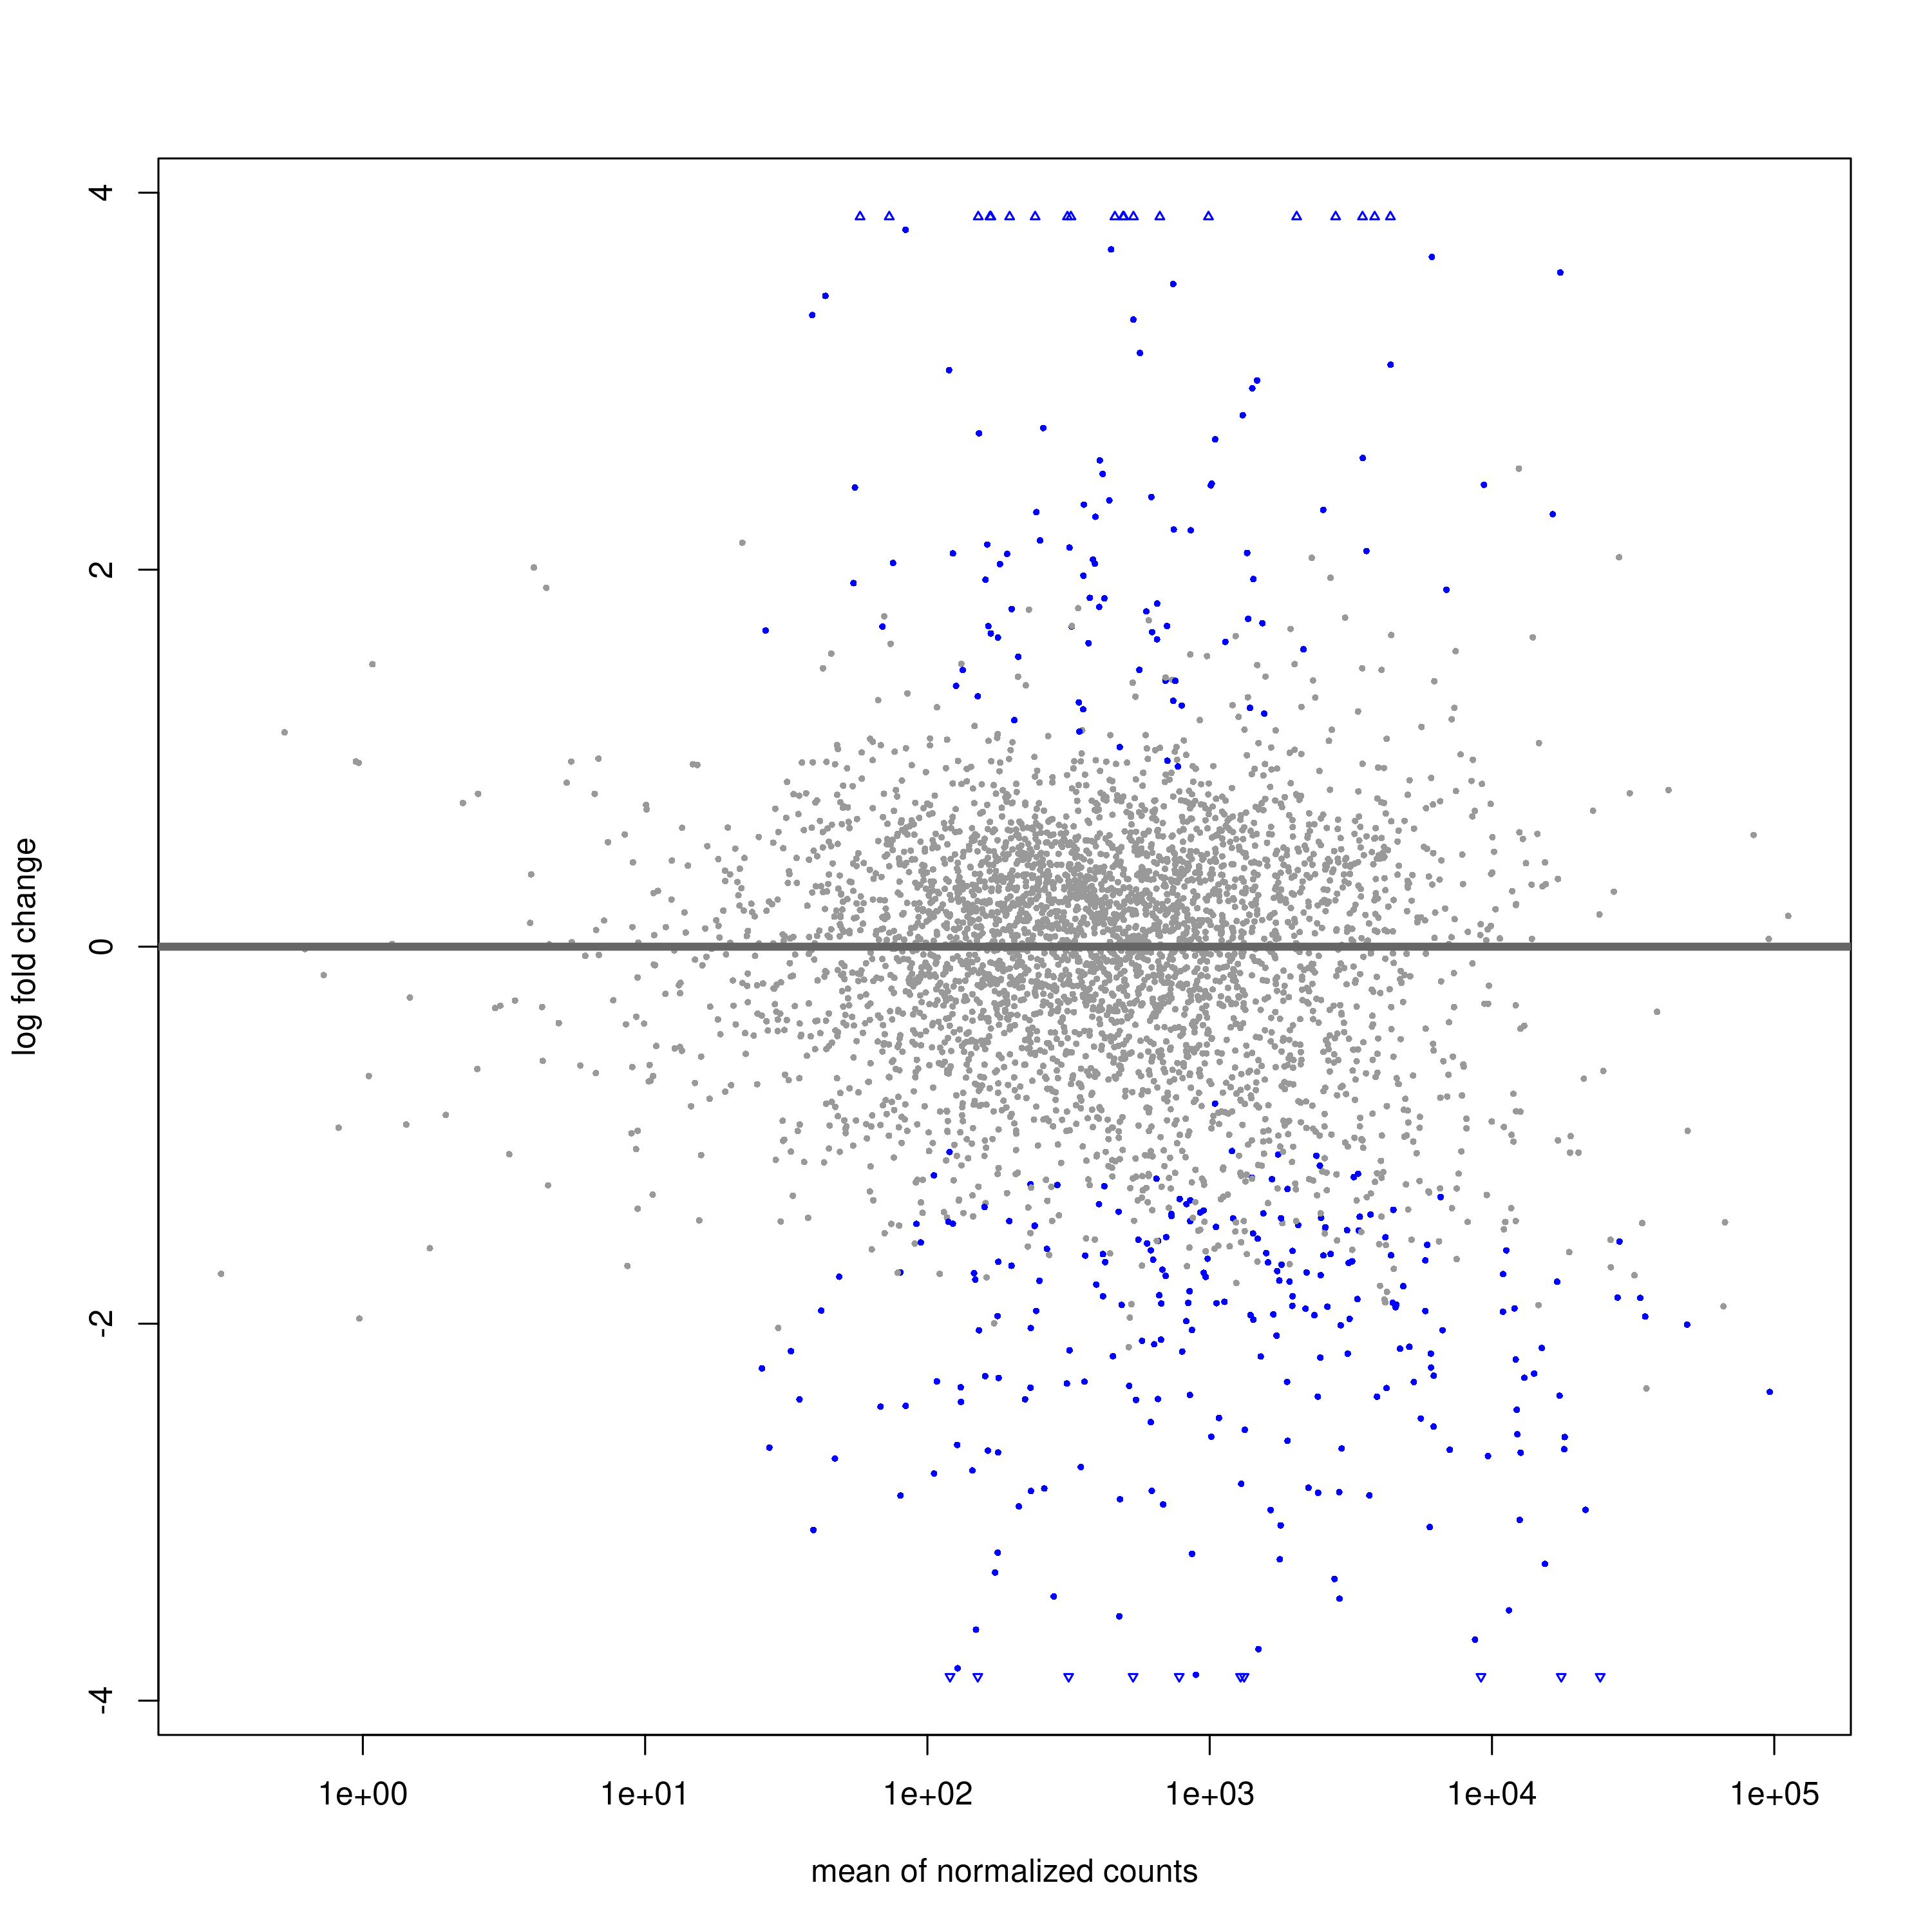

In [72]:
plotMA(res, #ylim=c(-2,2)
      )

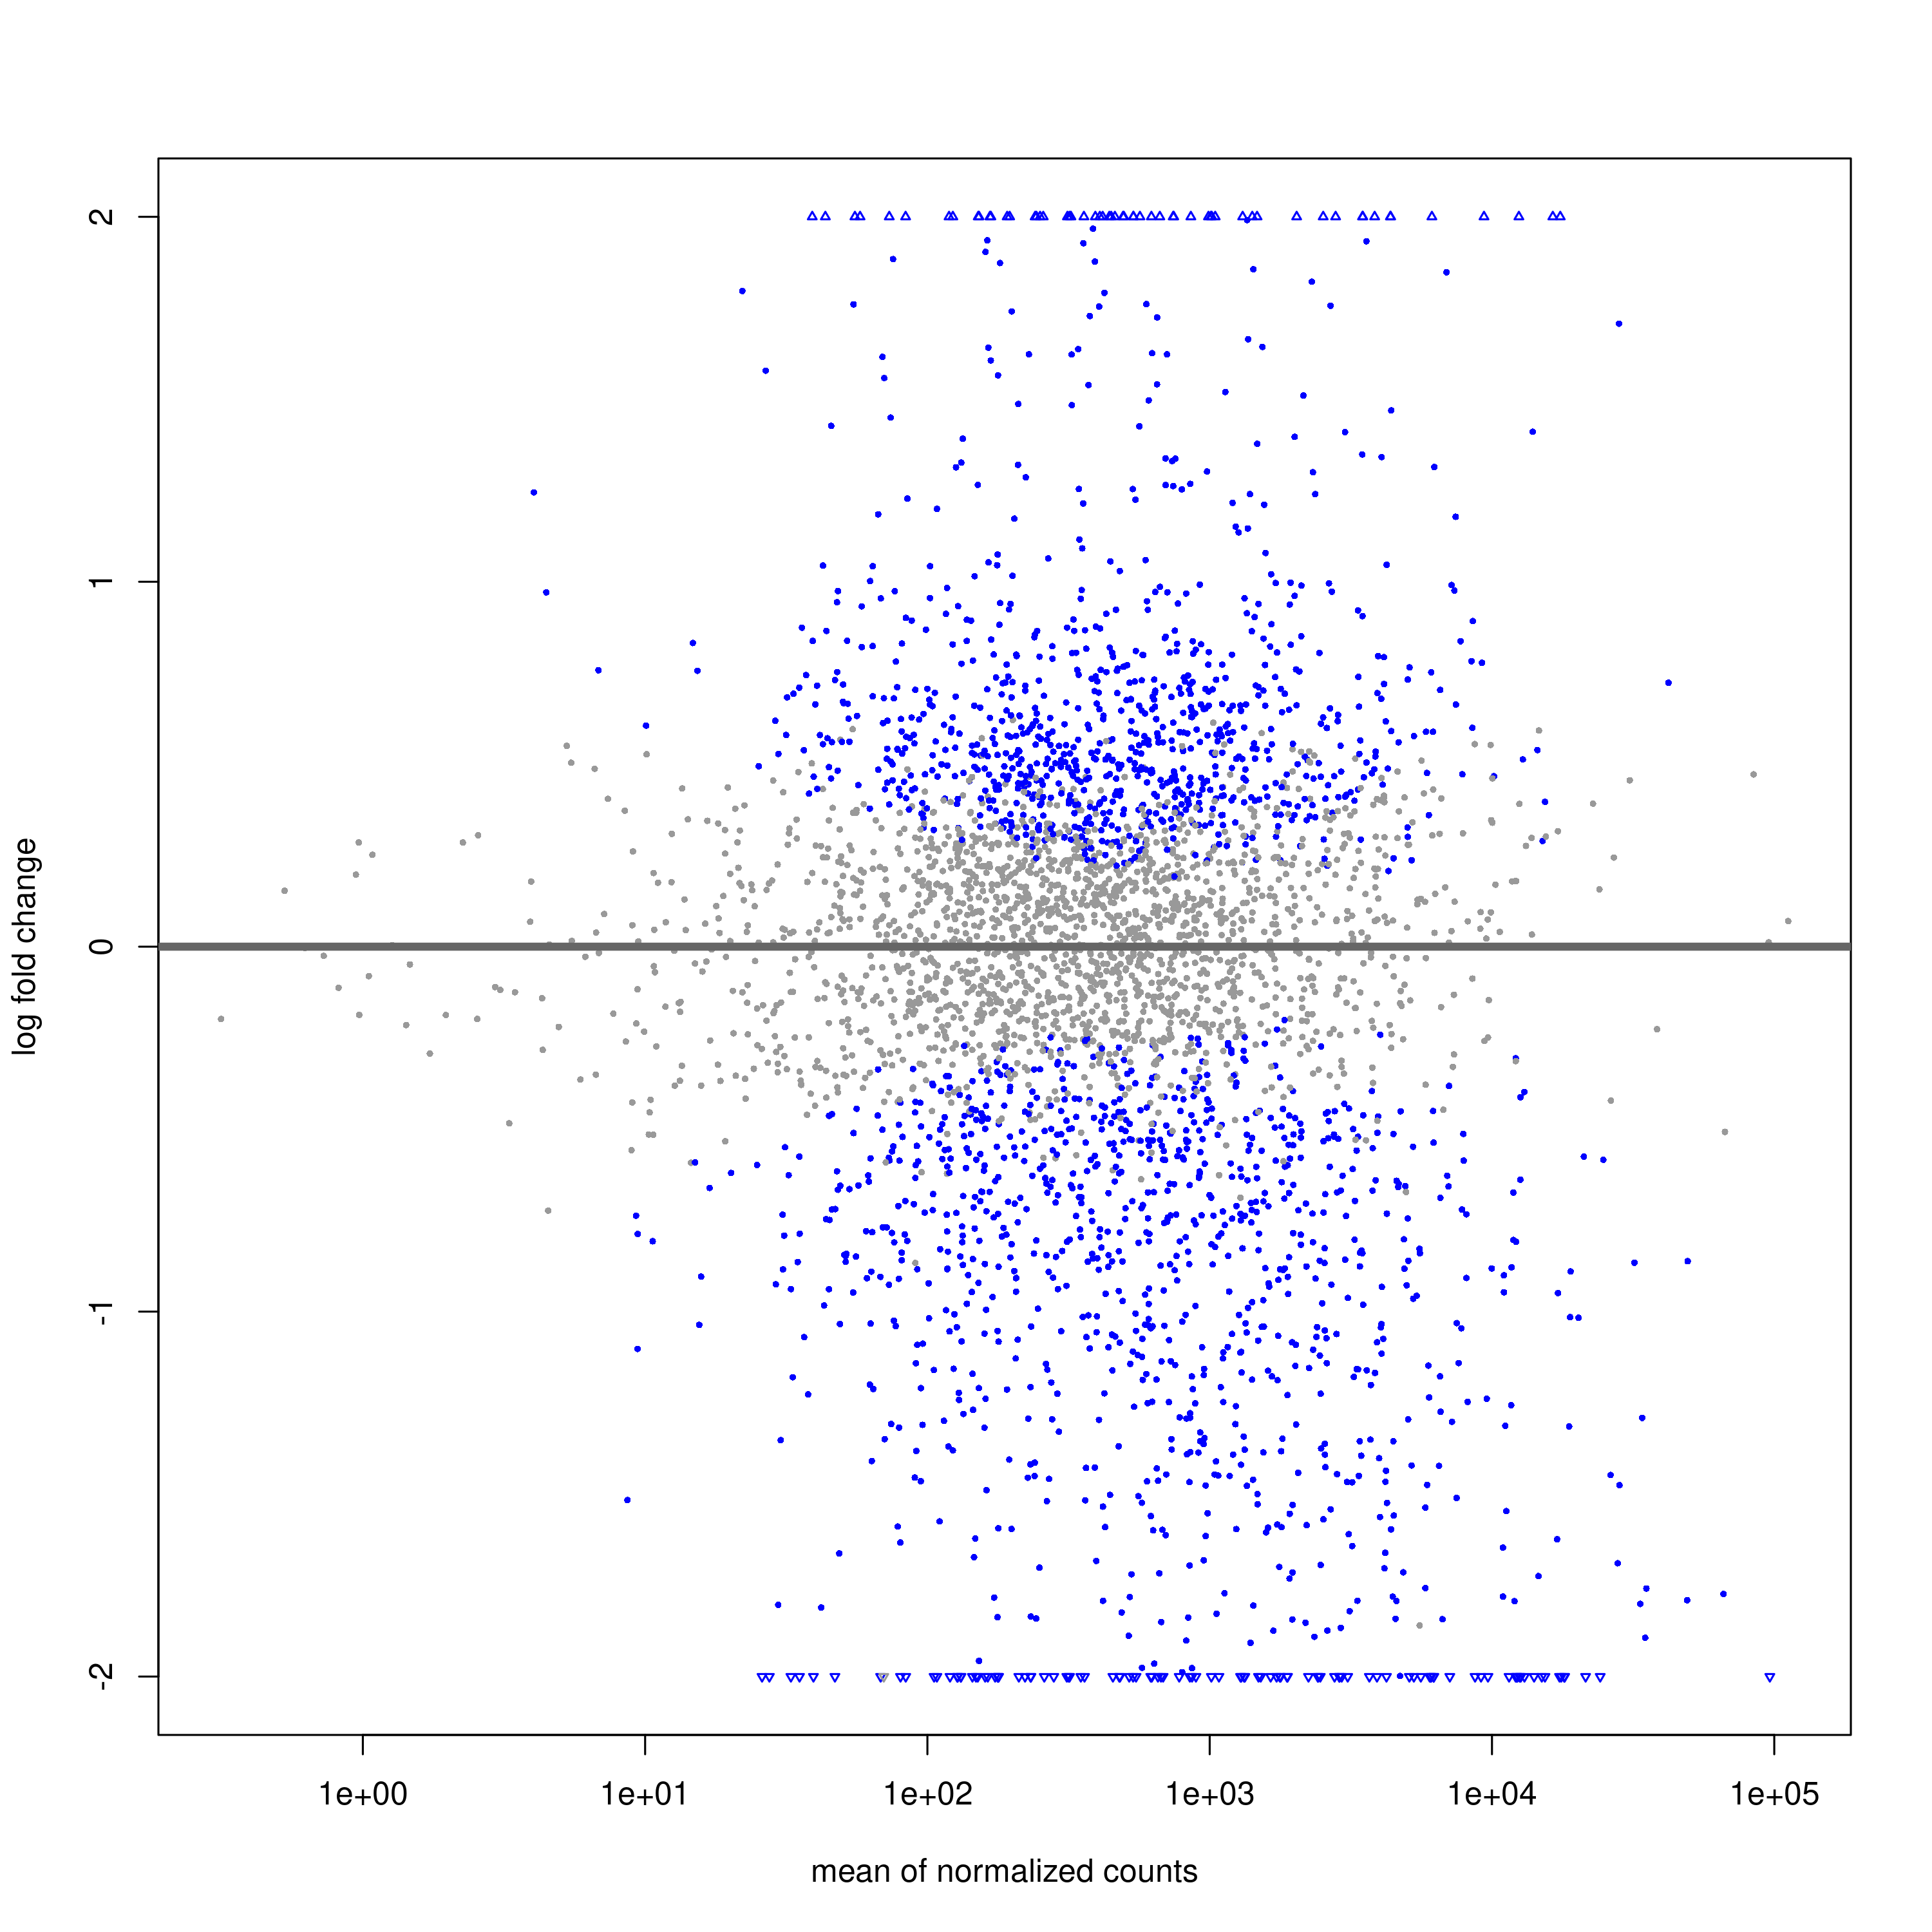

In [73]:
plotMA(resLFC, ylim=c(-2,2))

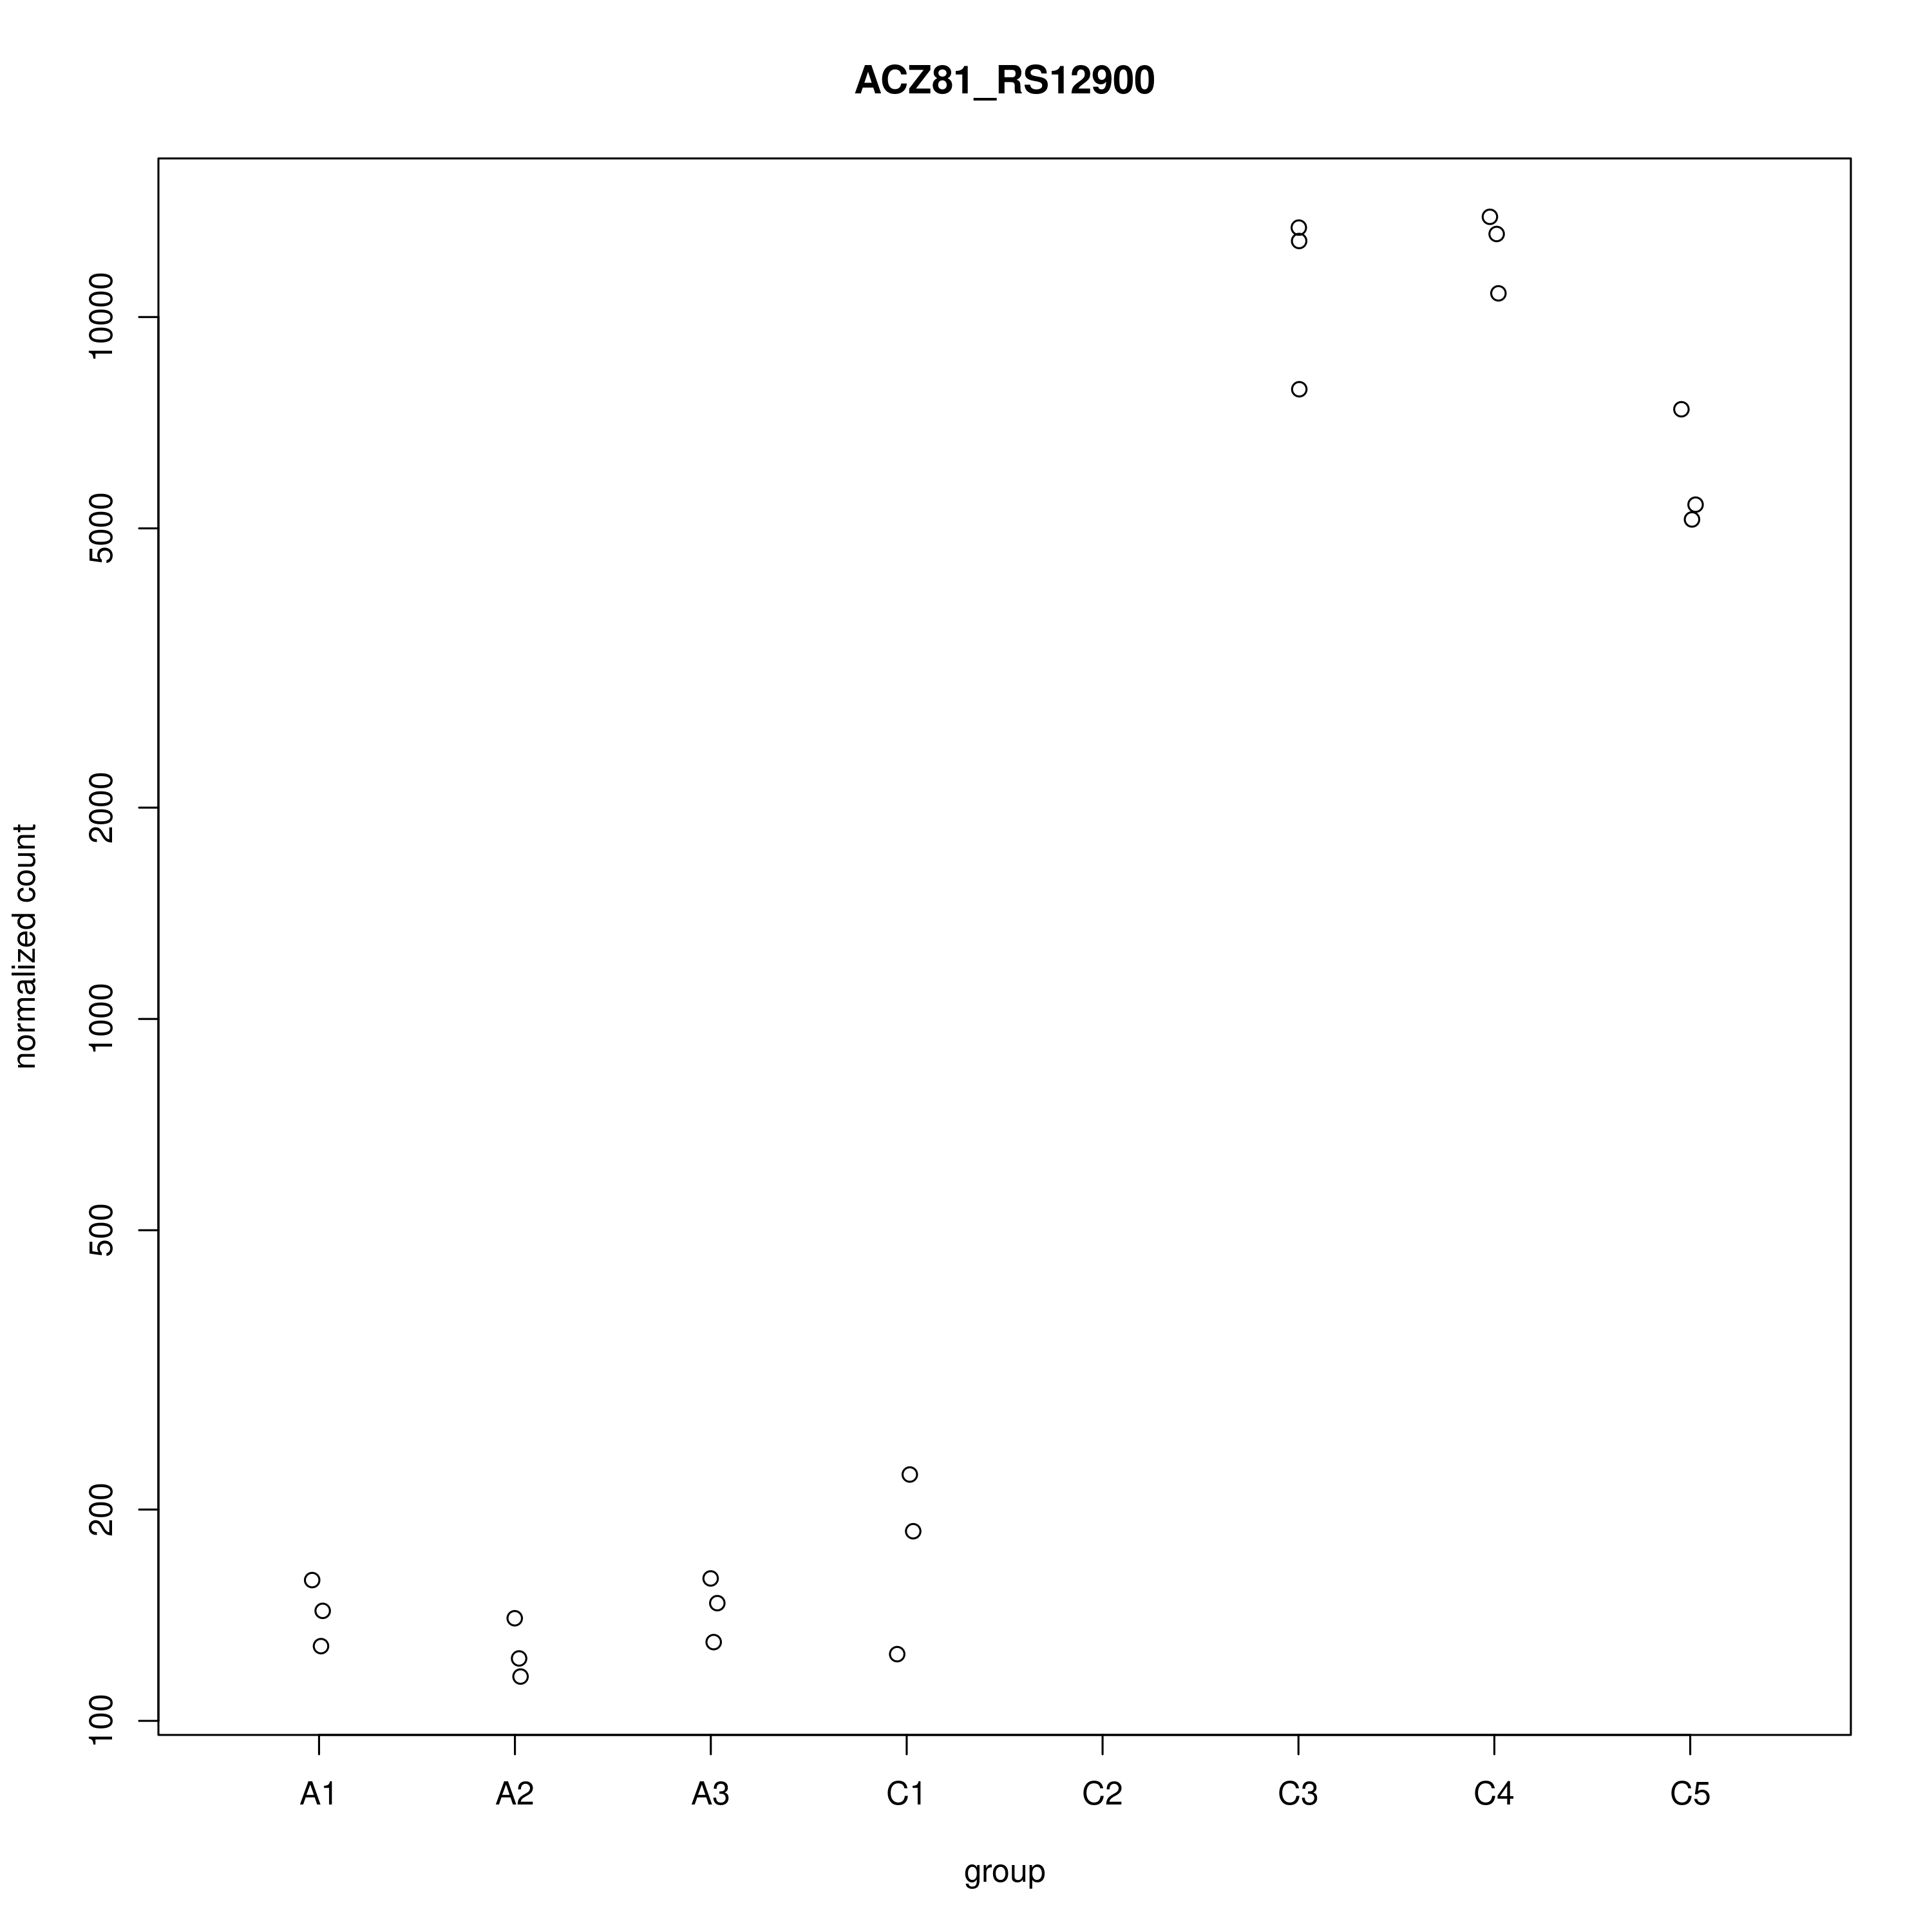

In [74]:
plotCounts(dds, gene=which.max(res$log2FoldChange), intgroup="groupandtime")

In [75]:
which.min(res$padj)

[1] 2420

In [76]:
genes[which.min(res$log2FoldChange),]

gene_id       gene product                                     
ACZ81_RS03565 ACZ81_RS03565 mazG nucleoside triphosphate pyrophosphohydrolase
              protein_id     old_locus_tag
ACZ81_RS03565 WP_061439577.1 NA

In [77]:
genes[(rowSums(counts(dds) >= 10) < 3),]

gene_id       gene
ACZ81_RS00485 ACZ81_RS00485 thiS
ACZ81_RS00815 ACZ81_RS00815     
ACZ81_RS01725 ACZ81_RS01725     
ACZ81_RS04640 ACZ81_RS04640 ccmE
ACZ81_RS07450 ACZ81_RS07450     
ACZ81_RS08885 ACZ81_RS08885     
ACZ81_RS08940 ACZ81_RS08940     
ACZ81_RS13830 ACZ81_RS13830     
ACZ81_RS15630 ACZ81_RS15630 lptF
ACZ81_RS16305 ACZ81_RS16305     
ACZ81_RS16745 ACZ81_RS16745     
ACZ81_RS17390 ACZ81_RS17390     
ACZ81_RS17395 ACZ81_RS17395     
ACZ81_RS17415 ACZ81_RS17415     
ACZ81_RS19830 ACZ81_RS19830     
ACZ81_RS20510 ACZ81_RS20510     
ACZ81_RS20560 ACZ81_RS20560     
ACZ81_RS20585 ACZ81_RS20585     
ACZ81_RS20790 ACZ81_RS20790     
ACZ81_RS20920 ACZ81_RS20920 pqqA
ACZ81_RS21210 ACZ81_RS21210     
              product                                         protein_id    
ACZ81_RS00485 sulfur carrier protein ThiS                     WP_014947794.1
ACZ81_RS00815 IS4 family transposase                          WP_061439020.1
ACZ81_RS01725 hypothetical protein                            WP_014975448.1
ACZ81_RS04640 cytochrome c maturation protein CcmE            WP_015066378.1
ACZ81_RS07450 dicarboxylate/amino acid:cation symporter       WP_081106073.1
ACZ81_RS08885 YgiQ family radical SAM protein                 WP_081106082.1
ACZ81_RS08940 DNA/RNA non-specific endonuclease               WP_061485761.1
ACZ81_RS13830 O-antigen ligase family protein                 WP_061486247.1
ACZ81_RS15630 LPS export ABC transporter permease LptF        WP_049588260.1
ACZ81_RS16305 hypothetical protein                            WP_014977415.1
ACZ81_RS16745 TonB-dependent receptor                         WP_014977470.1
ACZ81_RS17390 ribbon-helix-helix protein, CopG family         WP_039234107.1
ACZ81_RS17395 TonB-dependent receptor                         WP_061486648.1
ACZ81_RS17415 cytochrome b/b6 domain-containing protein       WP_061486651.1
ACZ81_RS19830 hypothetical protein                            WP_039228875.1
ACZ81_RS20510 phenylacetate-CoA oxygenase subunit PaaI        WP_061487062.1
ACZ81_RS20560 hypothetical protein                            WP_061487070.1
ACZ81_RS20585 IS5 family transposase                          WP_145912159.1
ACZ81_RS20790 hypothetical protein                            WP_014948811.1
ACZ81_RS20920 pyrroloquinoline quinone precursor peptide PqqA WP_071953288.1
ACZ81_RS21210 hypothetical protein                            WP_155279855.1
              old_locus_tag
ACZ81_RS00485 NA           
ACZ81_RS00815 NA           
ACZ81_RS01725 NA           
ACZ81_RS04640 NA           
ACZ81_RS07450 NA           
ACZ81_RS08885 NA           
ACZ81_RS08940 NA           
ACZ81_RS13830 NA           
ACZ81_RS15630 NA           
ACZ81_RS16305 NA           
ACZ81_RS16745 NA           
ACZ81_RS17390 NA           
ACZ81_RS17395 NA           
ACZ81_RS17415 NA           
ACZ81_RS19830 NA           
ACZ81_RS20510 NA           
ACZ81_RS20560 NA           
ACZ81_RS20585 NA           
ACZ81_RS20790 NA           
ACZ81_RS20920 NA           
ACZ81_RS21210 NA

In [78]:
vd = as.data.frame(assay(vsd))
vd = vd %>% 
   rownames_to_column(var = 'gene_id') %>% 
   pivot_longer(cols = colData(vsd)$sample, values_to = 'vsd', names_to = 'sample') %>%
   left_join(colData(vsd), by='sample', copy = TRUE) %>%
   group_by(gene_id, groupandtime) %>%
   summarise(mean_vsd = mean(vsd)) %>%
   pivot_wider(names_from = groupandtime, values_from = mean_vsd)


`summarise()` has grouped output by 'gene_id'. You can override using the `.groups` argument.


In [79]:
res_df = res_df %>%
  mutate(gene_id = str_replace(gene_id, '\\.\\.\\.\\d+', '')) %>%
  filter(contrast != 'Intercept') #, !(contrast %in% c('A2_vs_A1', 'A3_vs_A1')))



In [80]:
vd = left_join(vd, res_df, by='gene_id')

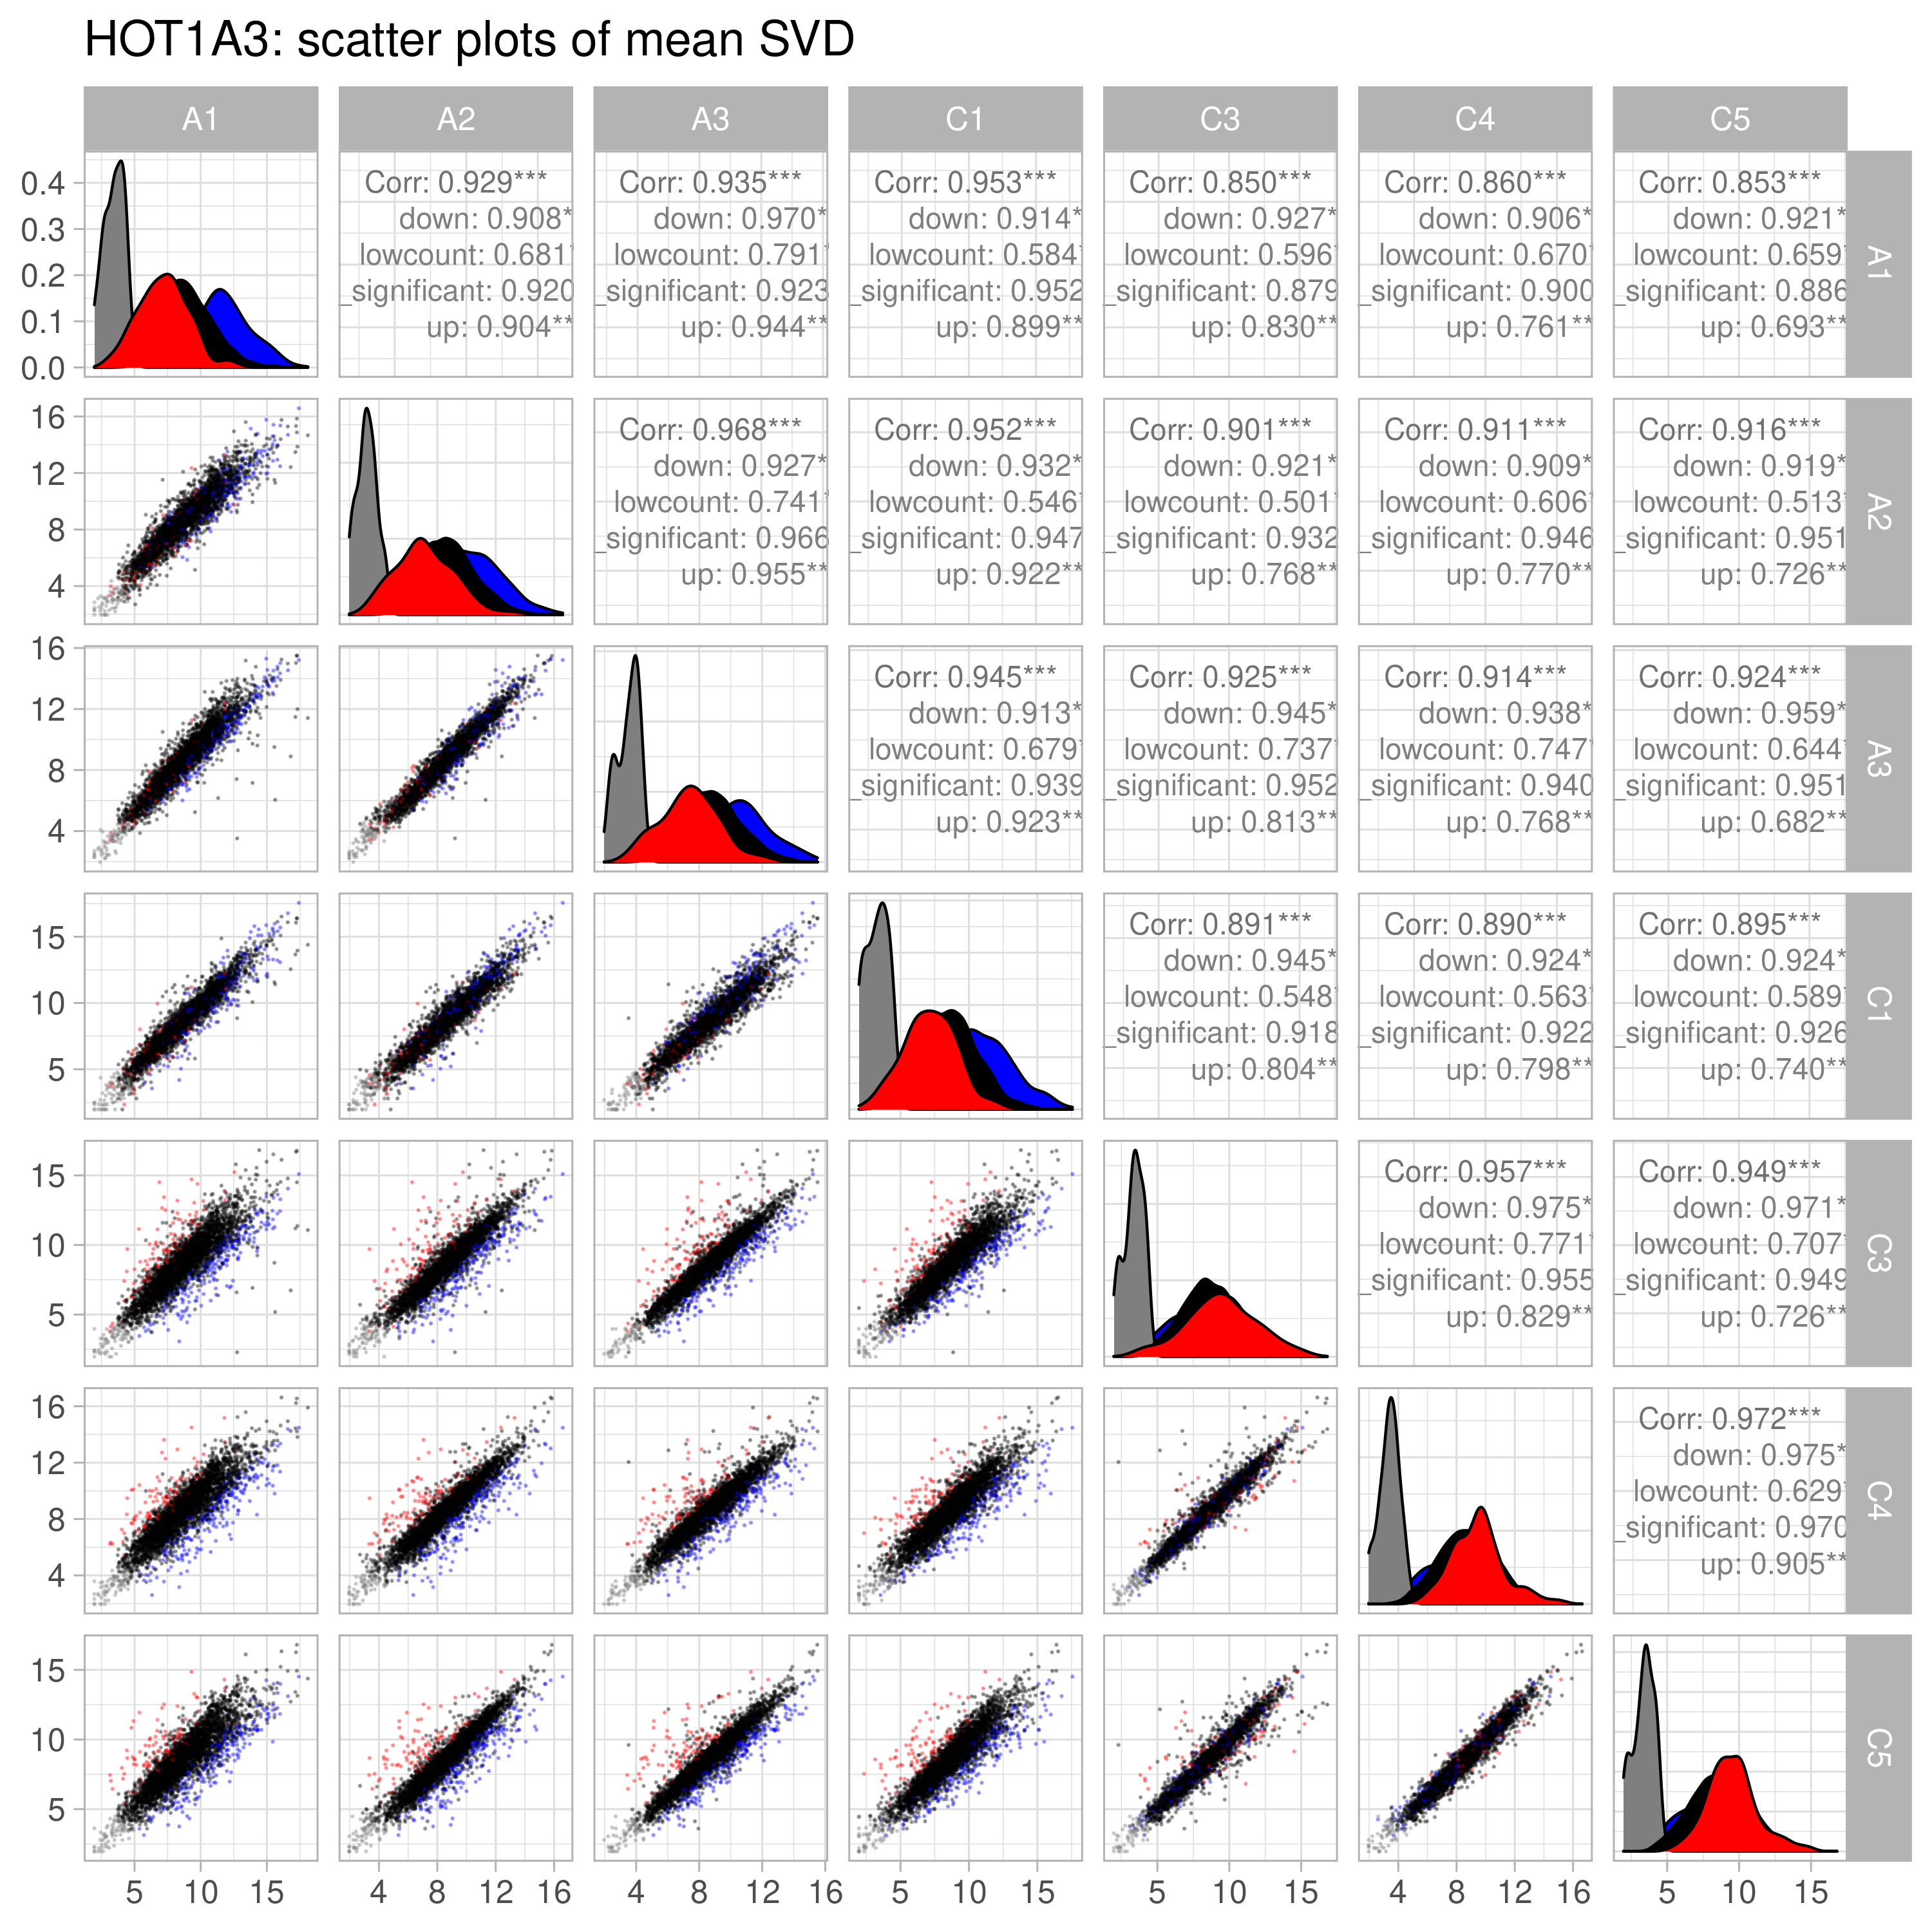

In [81]:

ggpairs(vd, columns = 2:8, 
        aes(colour=status),
         lower = list(continuous = wrap("points", alpha = 0.3, size=0.1)),
        title='HOT1A3: scatter plots of mean SVD'
       ) +
  scale_color_manual(values = c(up='red', down='blue', no_significant='black', outlier='grey')) + 
  scale_fill_manual(values = c(up='red', down='blue', no_significant='black', outlier='grey')) + 
  theme_light(base_size = 15)

    #'no_significant''down''up''outlier'

In [82]:
names(vd)

[1] "gene_id"        "A1"             "A2"             "A3"            
 [5] "C1"             "C3"             "C4"             "C5"            
 [9] "baseMean"       "log2FoldChange" "lfcSE"          "stat"          
[13] "pvalue"         "padj"           "contrast"       "na_pvalue"     
[17] "na_padj"        "significant"    "direction"      "status"

In [83]:
gtf_fpath = file.path('..','genomes', 'HOT1A3', 'genomic.gtf')
SAF <- Rsubread::flattenGTF(gtf_fpath, GTF.featureType = "CDS")
GeneLength <- rowsum(SAF$End-SAF$Start+1, SAF$GeneID)



Flattening GTF file: /fast_data/Osnat/CC1A3/GIT/CC1A3/genomes/HOT1A3/genomic.gtf
Output SAF file: ./.Rsubread_flattenGTF_pid256393

Looking for 'CDS' features... (grouped by 'gene_id')

Finished.



In [84]:
GeneLength = as.data.frame(GeneLength)

In [85]:
names(GeneLength) = 'Length'

In [86]:
GeneLength$gene_id = rownames(GeneLength)

In [87]:
res_df = left_join(res_df, GeneLength, by = 'gene_id')

In [88]:
res_df = res_df %>% 
    mutate(down = (status == 'down'),
           up   = (status == 'up')
)

In [89]:
ignore_main = c('09160 Human Diseases', 
                '09150 Organismal Systems', 
                '09190 Not Included in Pathway or Brite', 
                '09180 Brite Hierarchies',
                ''
               )

In [90]:
run_enrichment <- function(encolname, testcolname) {
    #cat_df = path_df %>% select(encolname, main) %>% distinct()    
    mpath_df = path_df %>%
       #filter(main != '')  %>%
       pivot_longer(cols = all_of(encolname), values_to = 'PATH') %>%
       mutate(PATH = word(PATH)) %>%
       distinct(PATH, gene_id, .keep_all= TRUE) %>%
       select(gene_id, PATH)
    path_names = path_df %>%
       #filter(main != '')  %>%
       pivot_longer(cols = all_of(encolname), values_to = 'PATH') %>%
       mutate(category = word(PATH)) %>%
       distinct(category, .keep_all= TRUE) %>%
       select(category, PATH, main)
    test_df = res_df %>% drop_na(significant)
    test_df$sigval = if_else(test_df[[testcolname]], 1, 0)
    DEgenes = test_df$sigval
    names(DEgenes) = test_df$gene_id
    table(DEgenes)
    LENgenes = test_df$Length
    names(LENgenes) = test_df$gene_id
    pwf = nullp(DEgenes, bias.data=LENgenes)
    goseq_res = goseq(pwf, gene2cat = as.data.frame(mpath_df))
    goseq_res = left_join(goseq_res, path_names)
    goseq_res = goseq_res %>% filter(numInCat>=5) %>% filter(!main %in% ignore_main)
    goseq_res$padj = p.adjust(goseq_res$over_represented_pvalue, method="BH")
    goseq_res = goseq_res %>%
       relocate(padj, .after = over_represented_pvalue) %>%
       relocate(PATH, .after = category) 
    goseq_res$type = testcolname
    goseq_res$enrich = encolname
    goseq_res$organism = 'HOT1A3'
    #return(mpath_df)
    return (goseq_res)
}

Warning message in pcls(G):
“initial point very close to some inequality constraints”
Using manually entered categories.

For 54 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"
Using manually entered categories.

For 54 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"
Warning message in pcls(G):
“initial point very close to some inequality constraints”


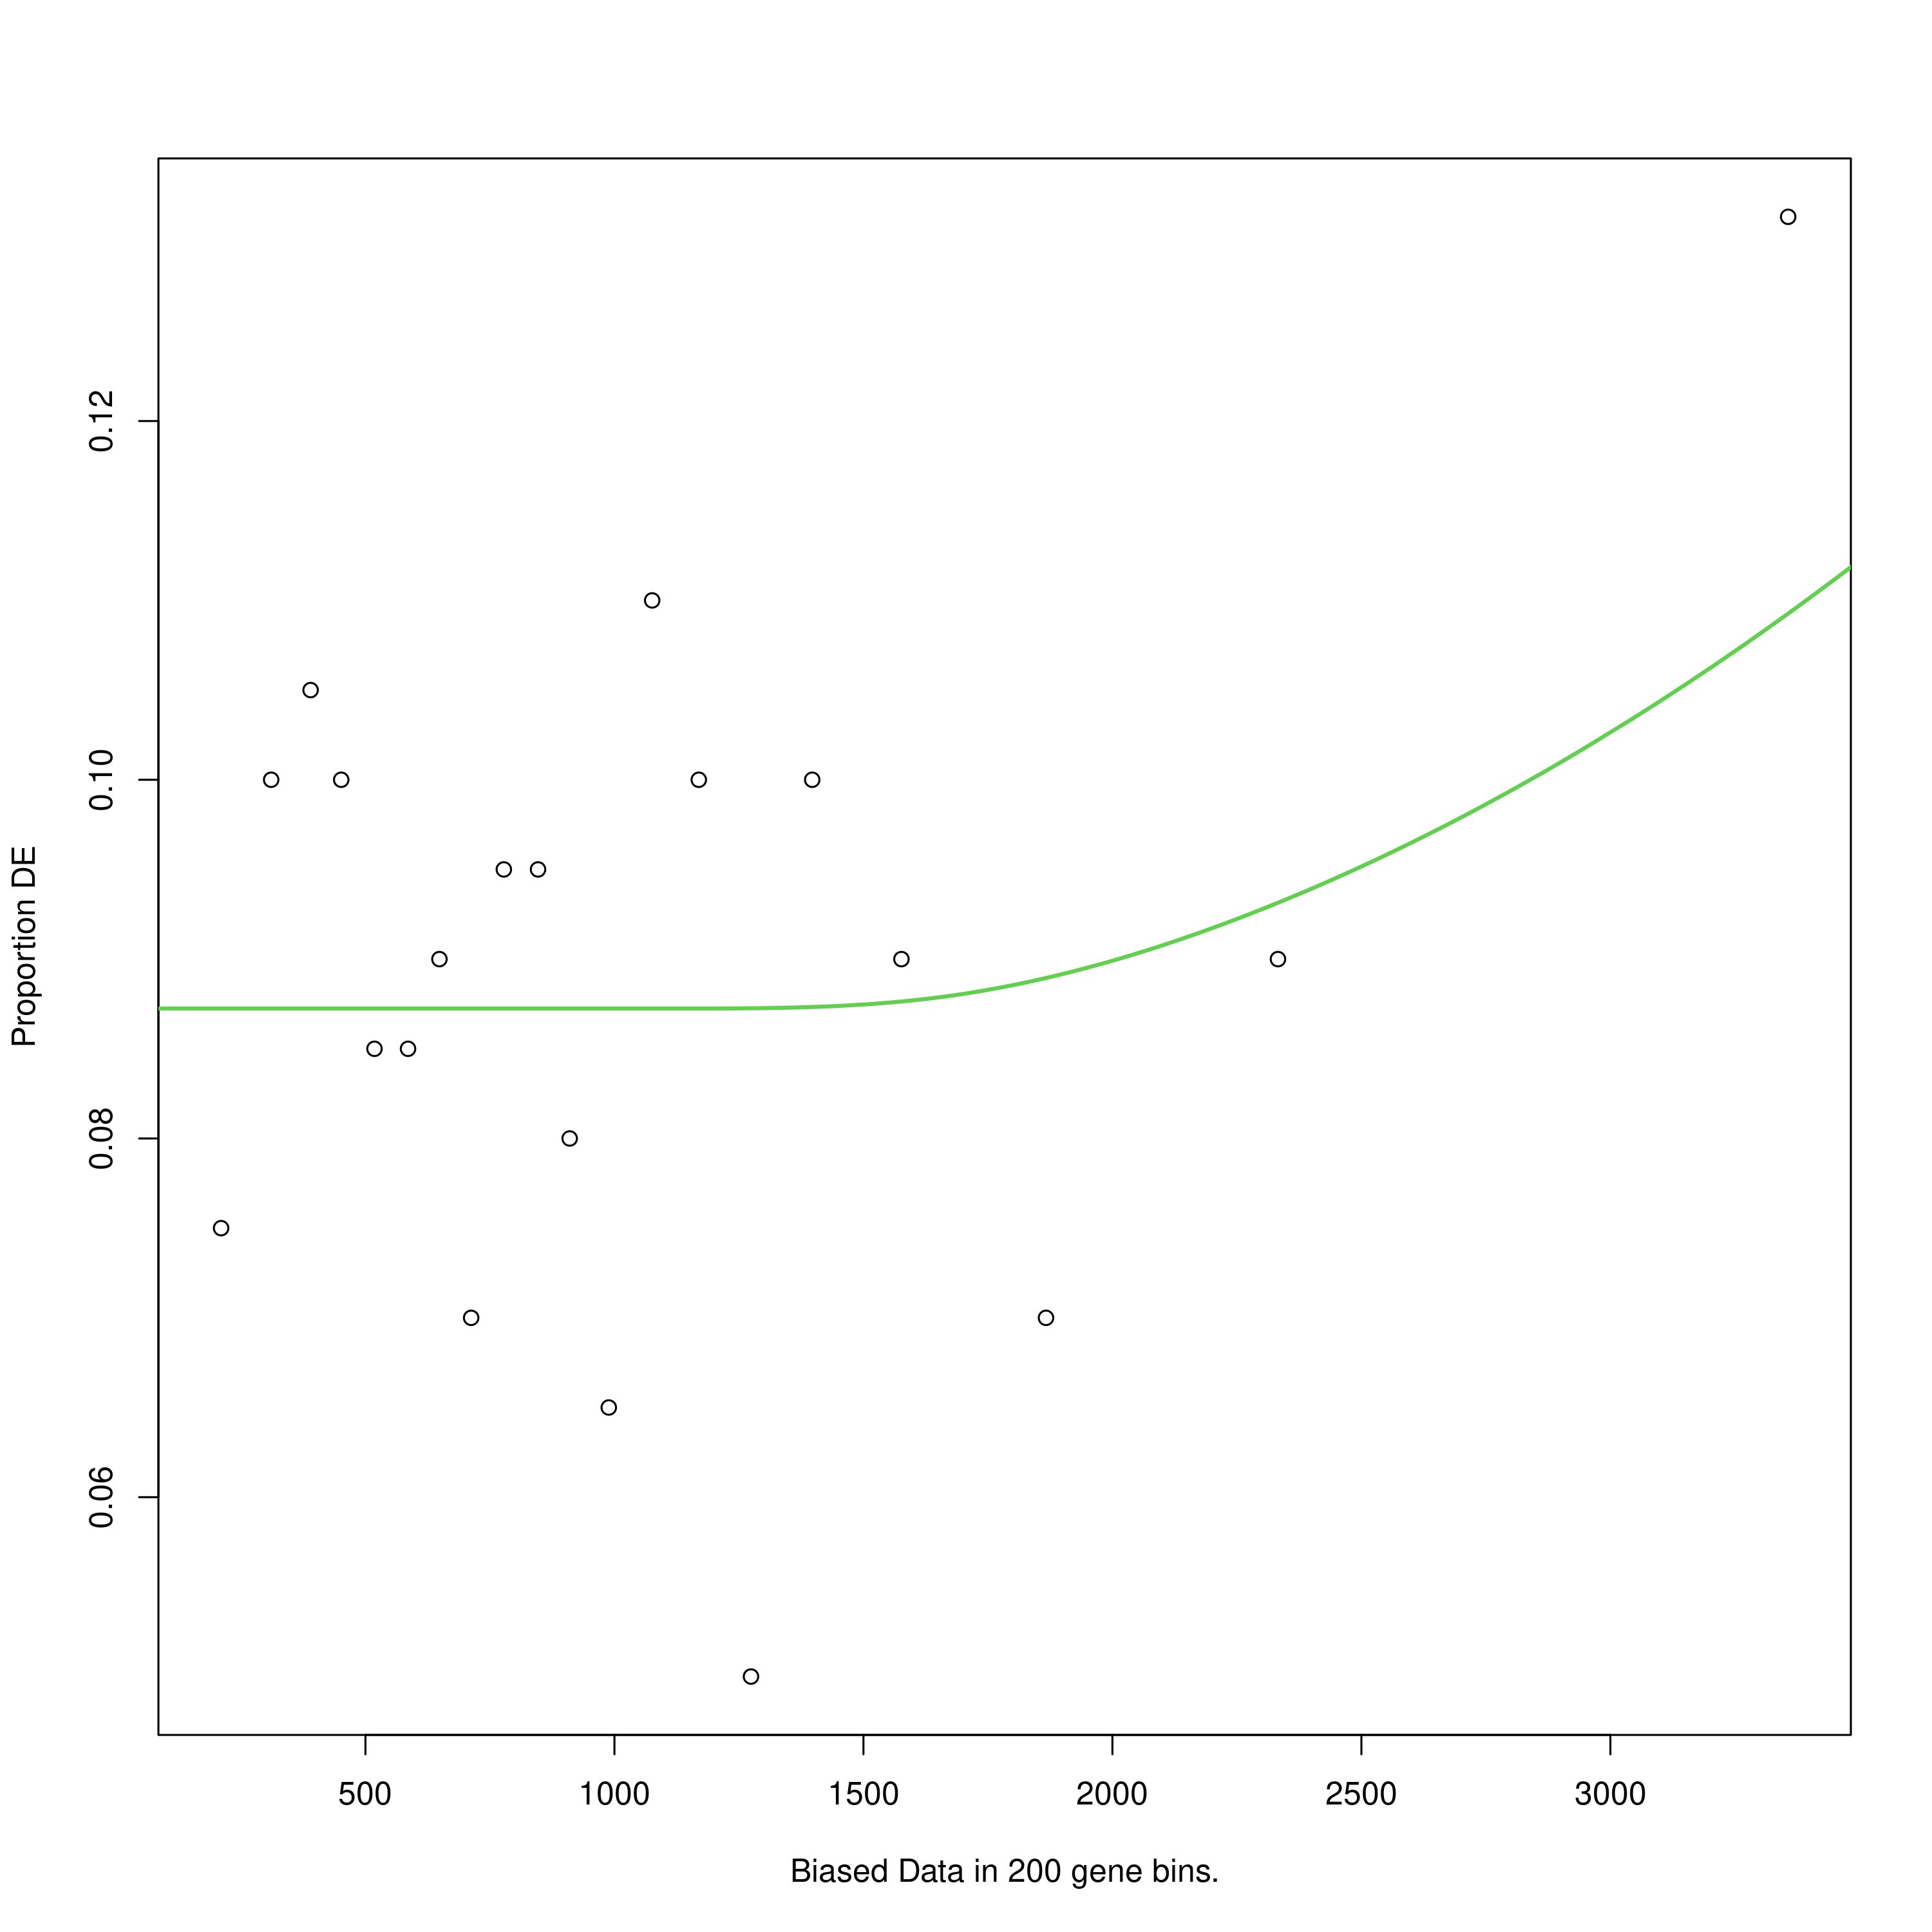

Using manually entered categories.

For 54 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"
Warning message in pcls(G):
“initial point very close to some inequality constraints”


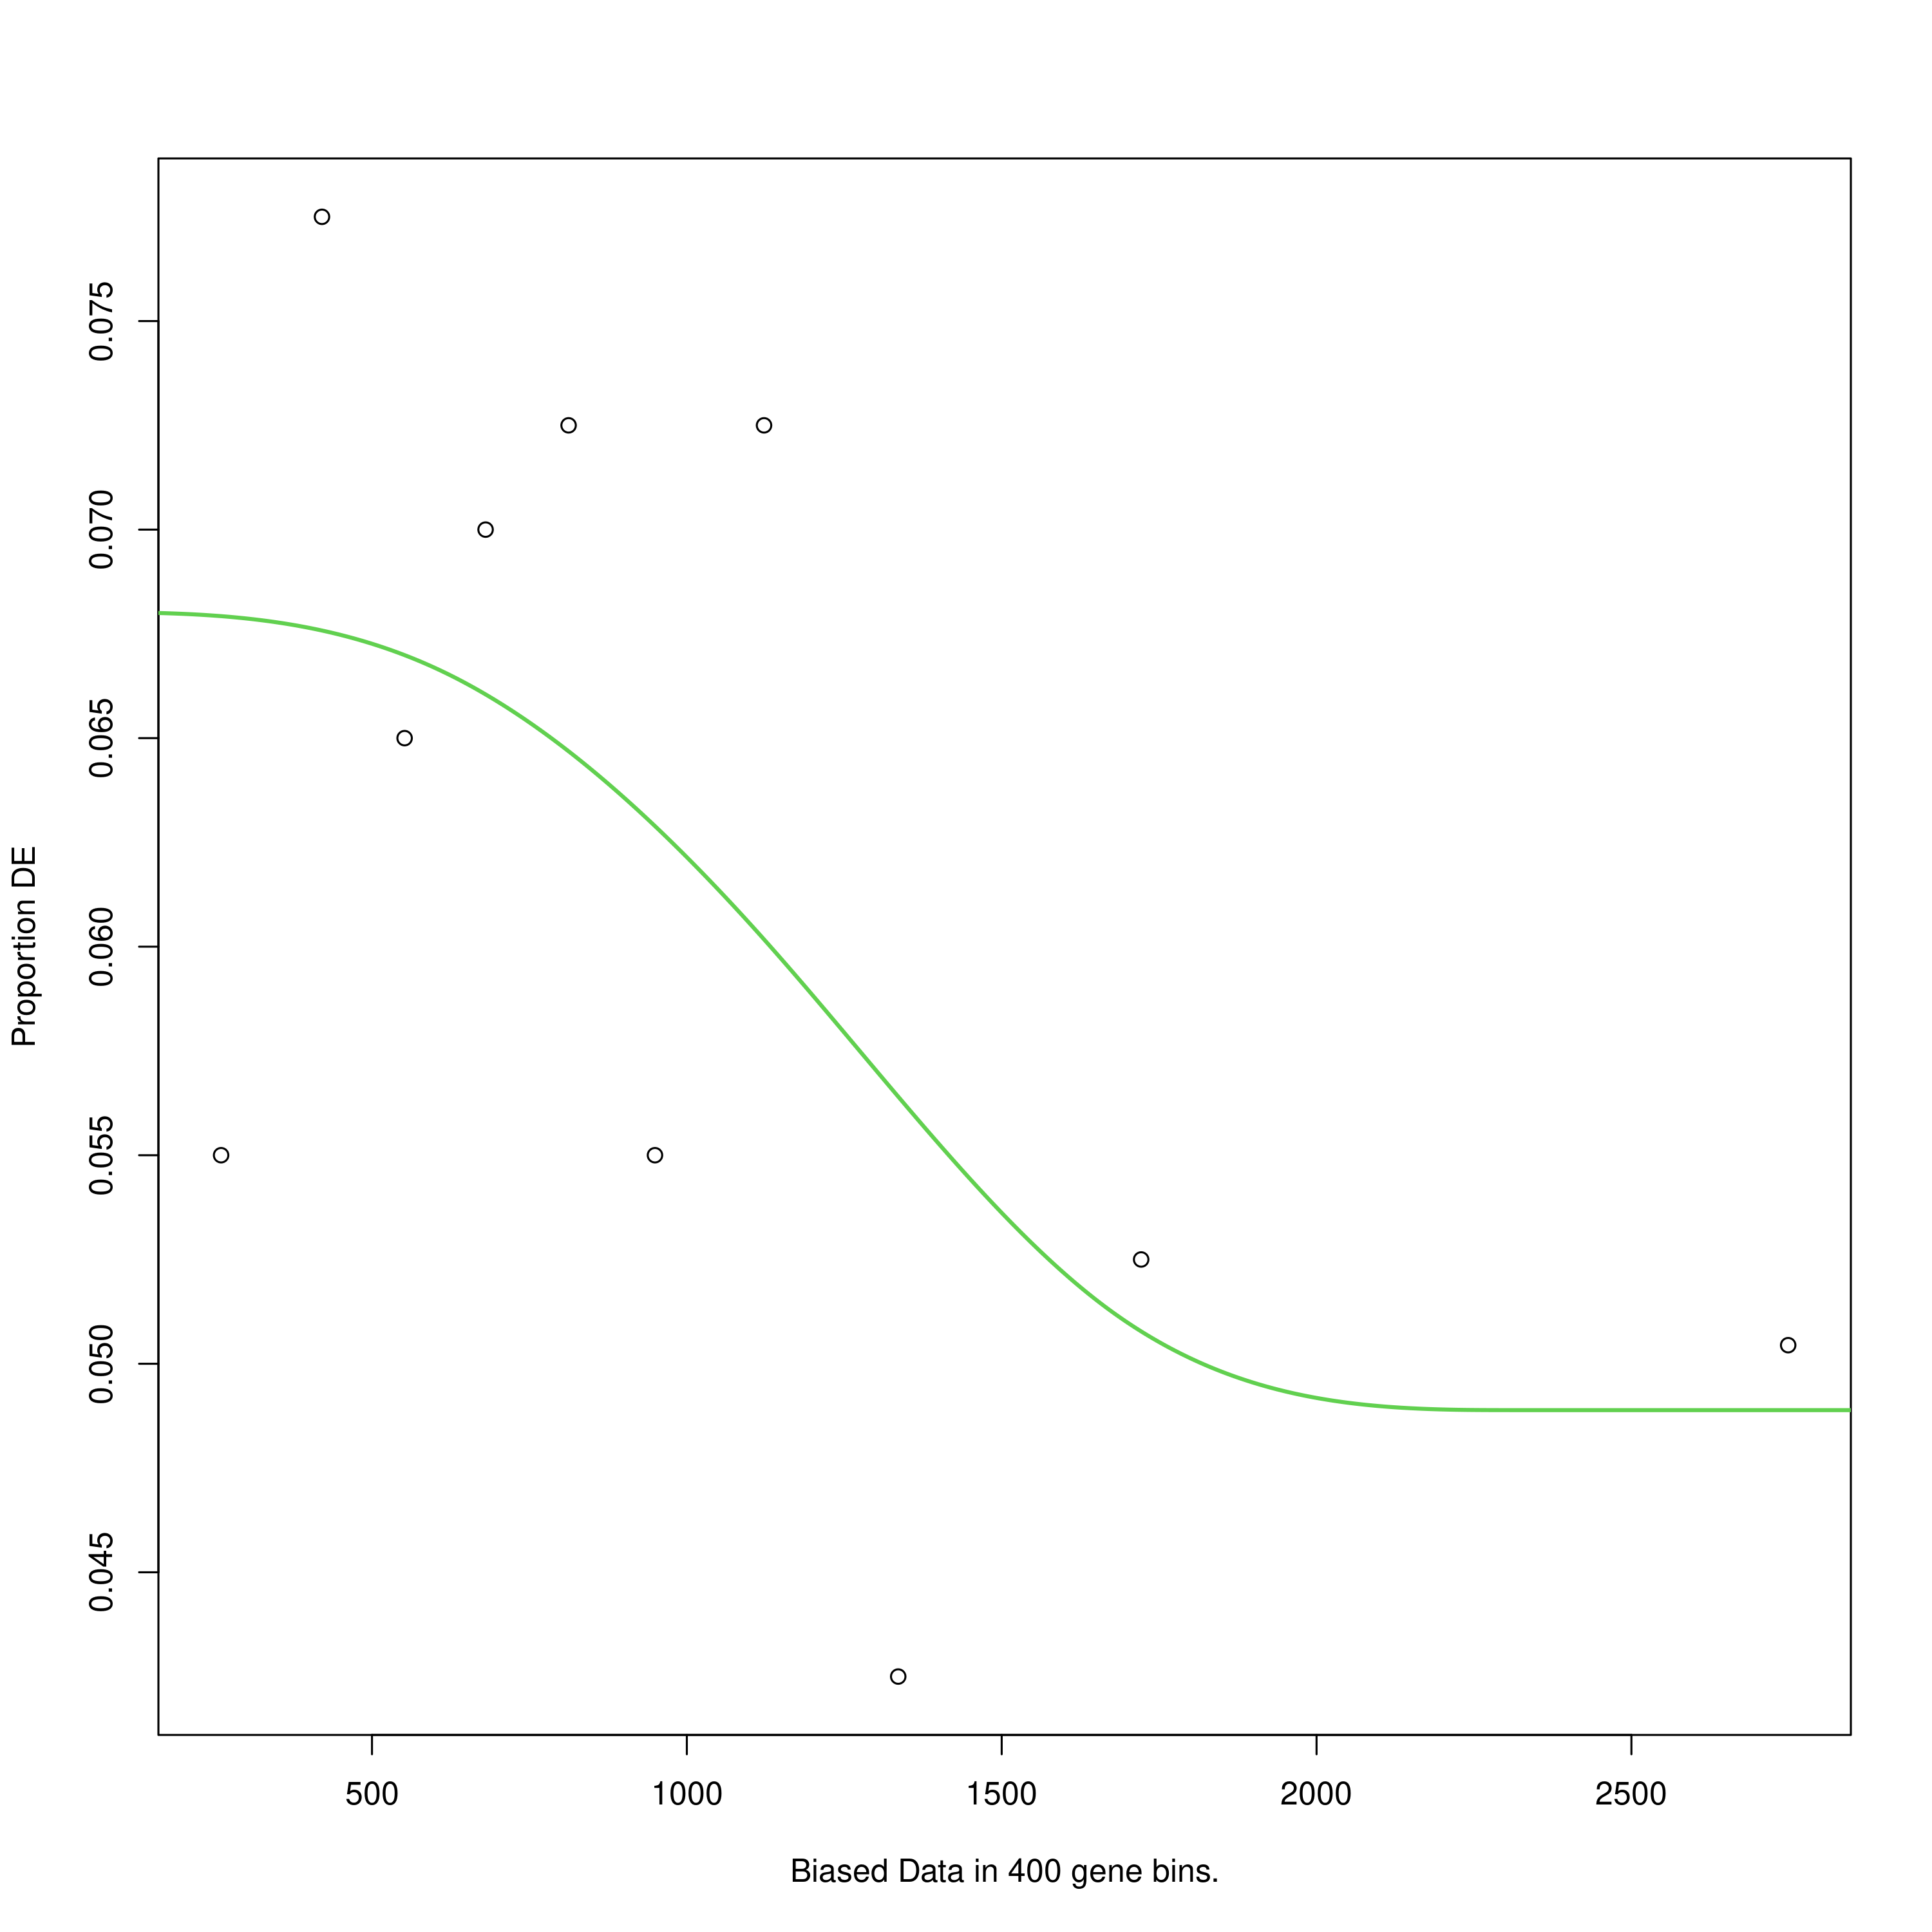

Using manually entered categories.

For 54 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"


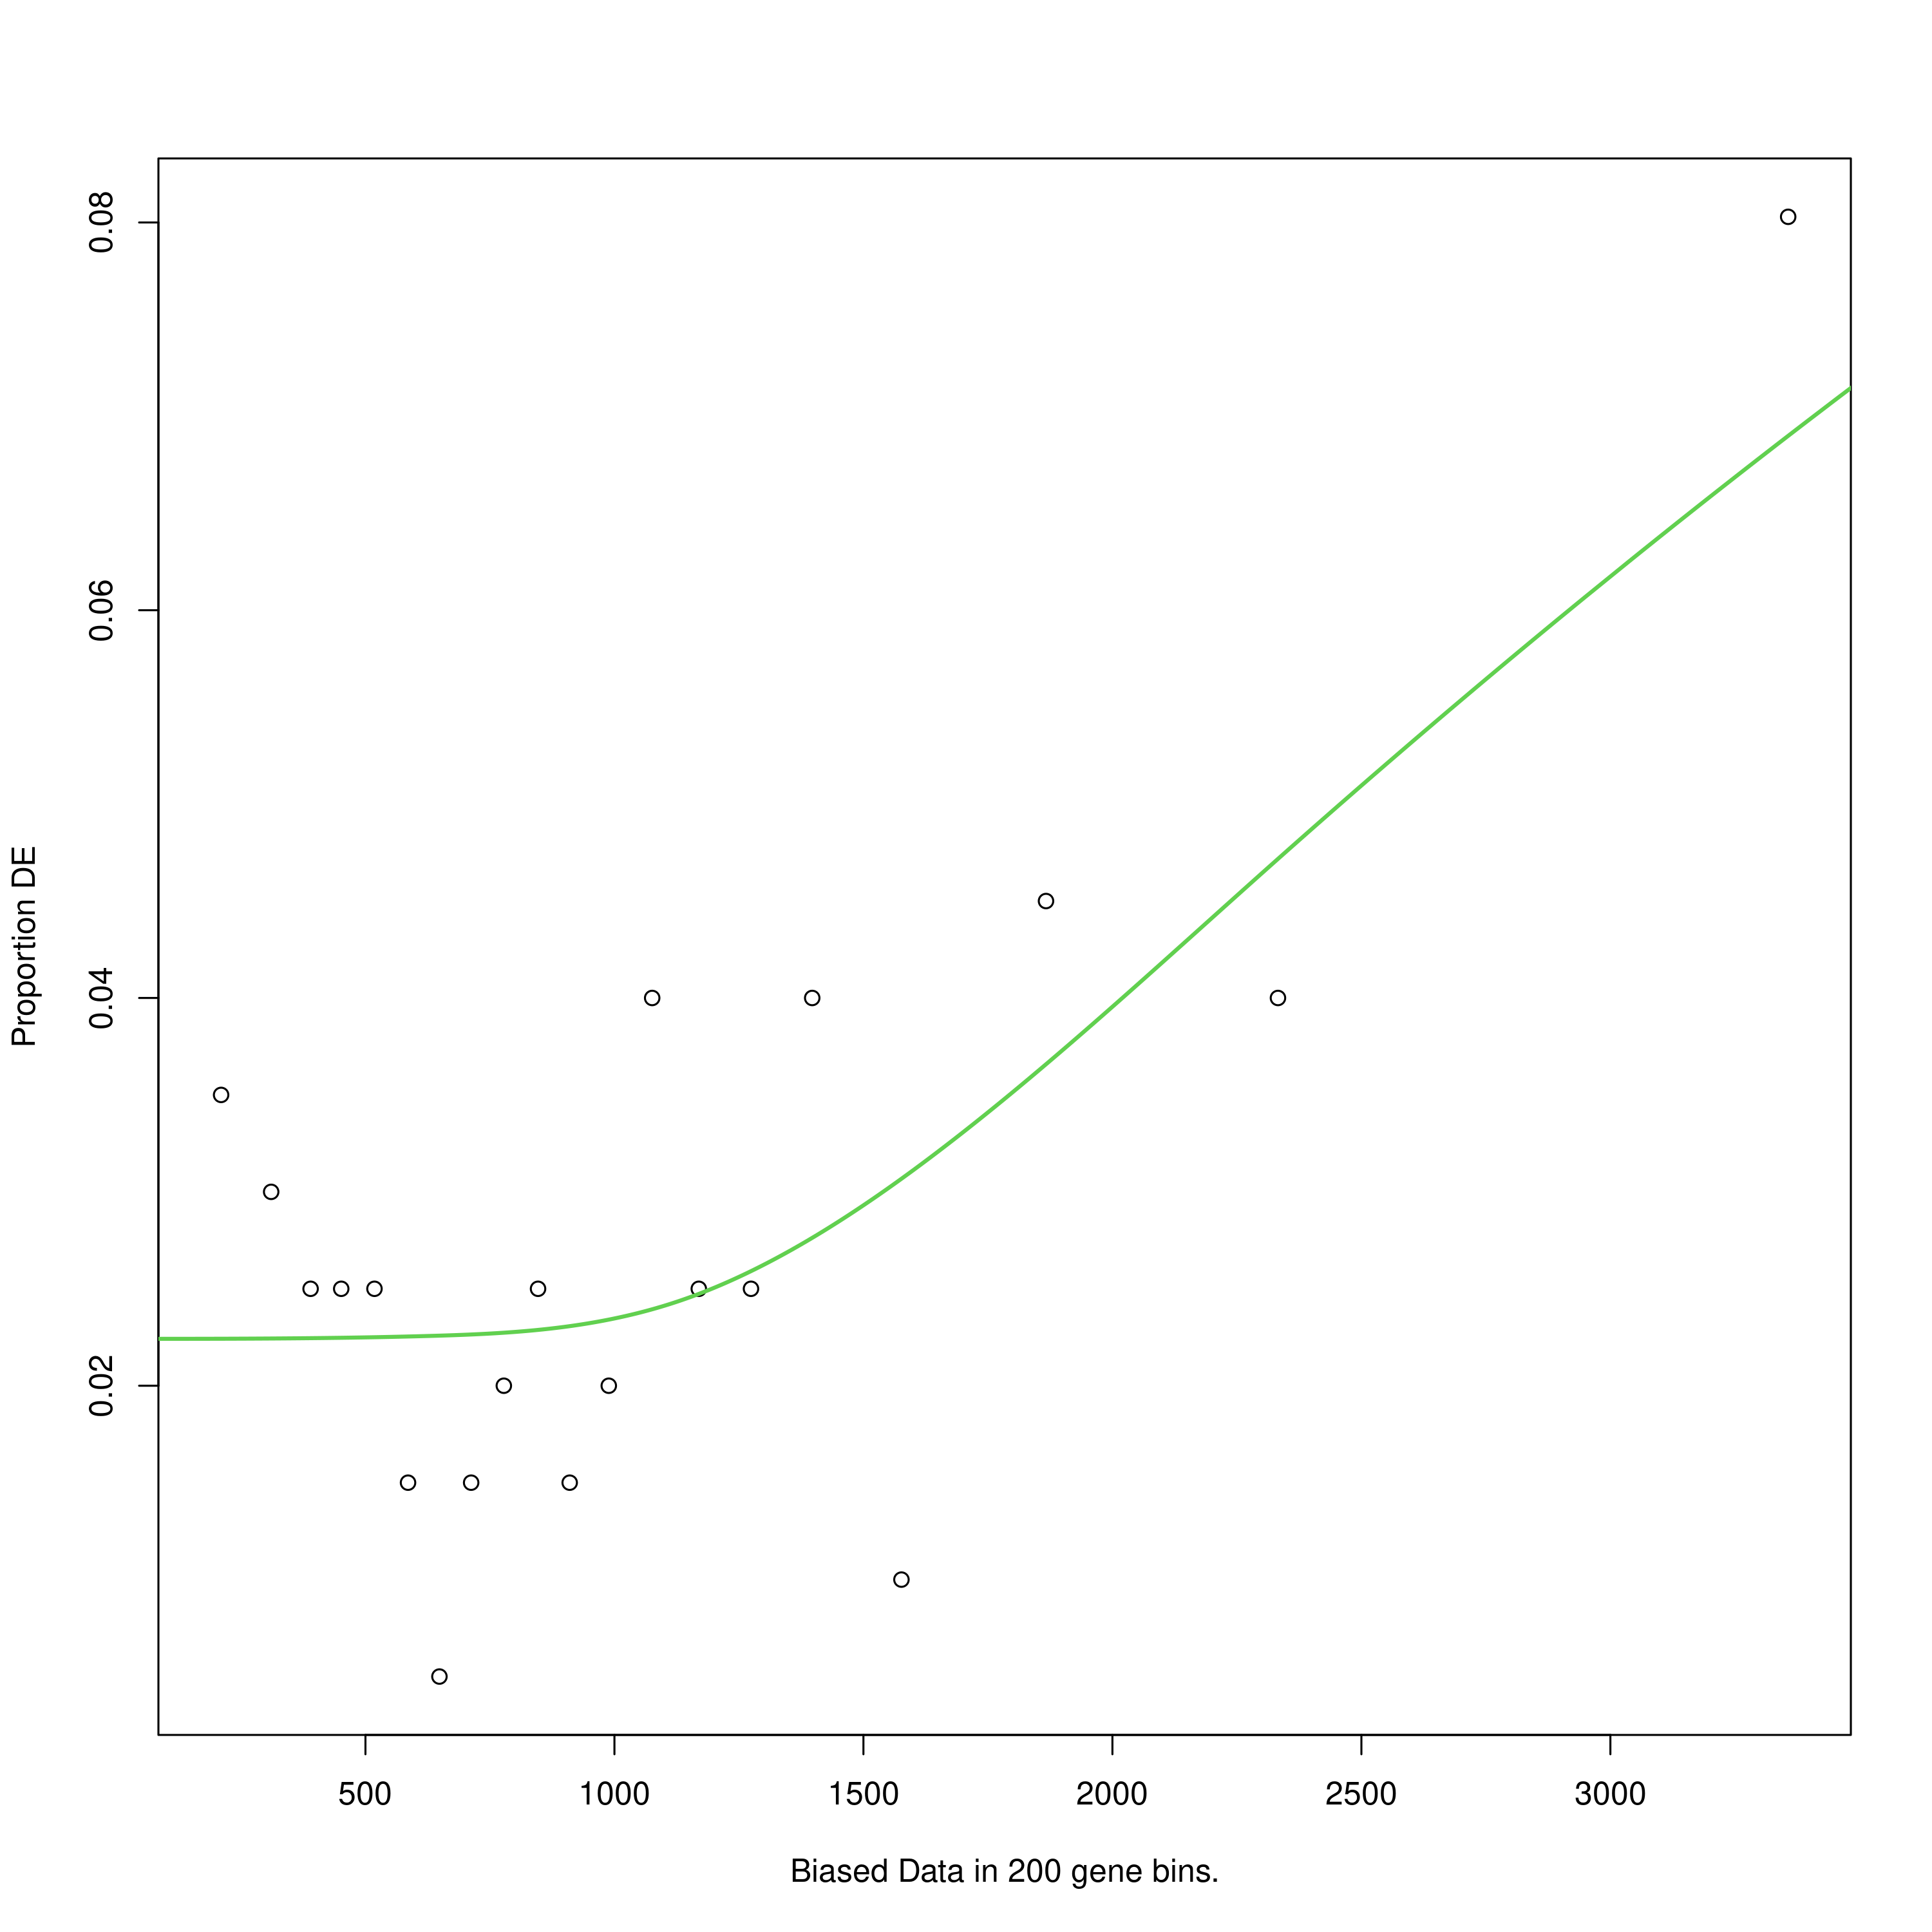

Using manually entered categories.

For 54 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"
Warning message in pcls(G):
“initial point very close to some inequality constraints”


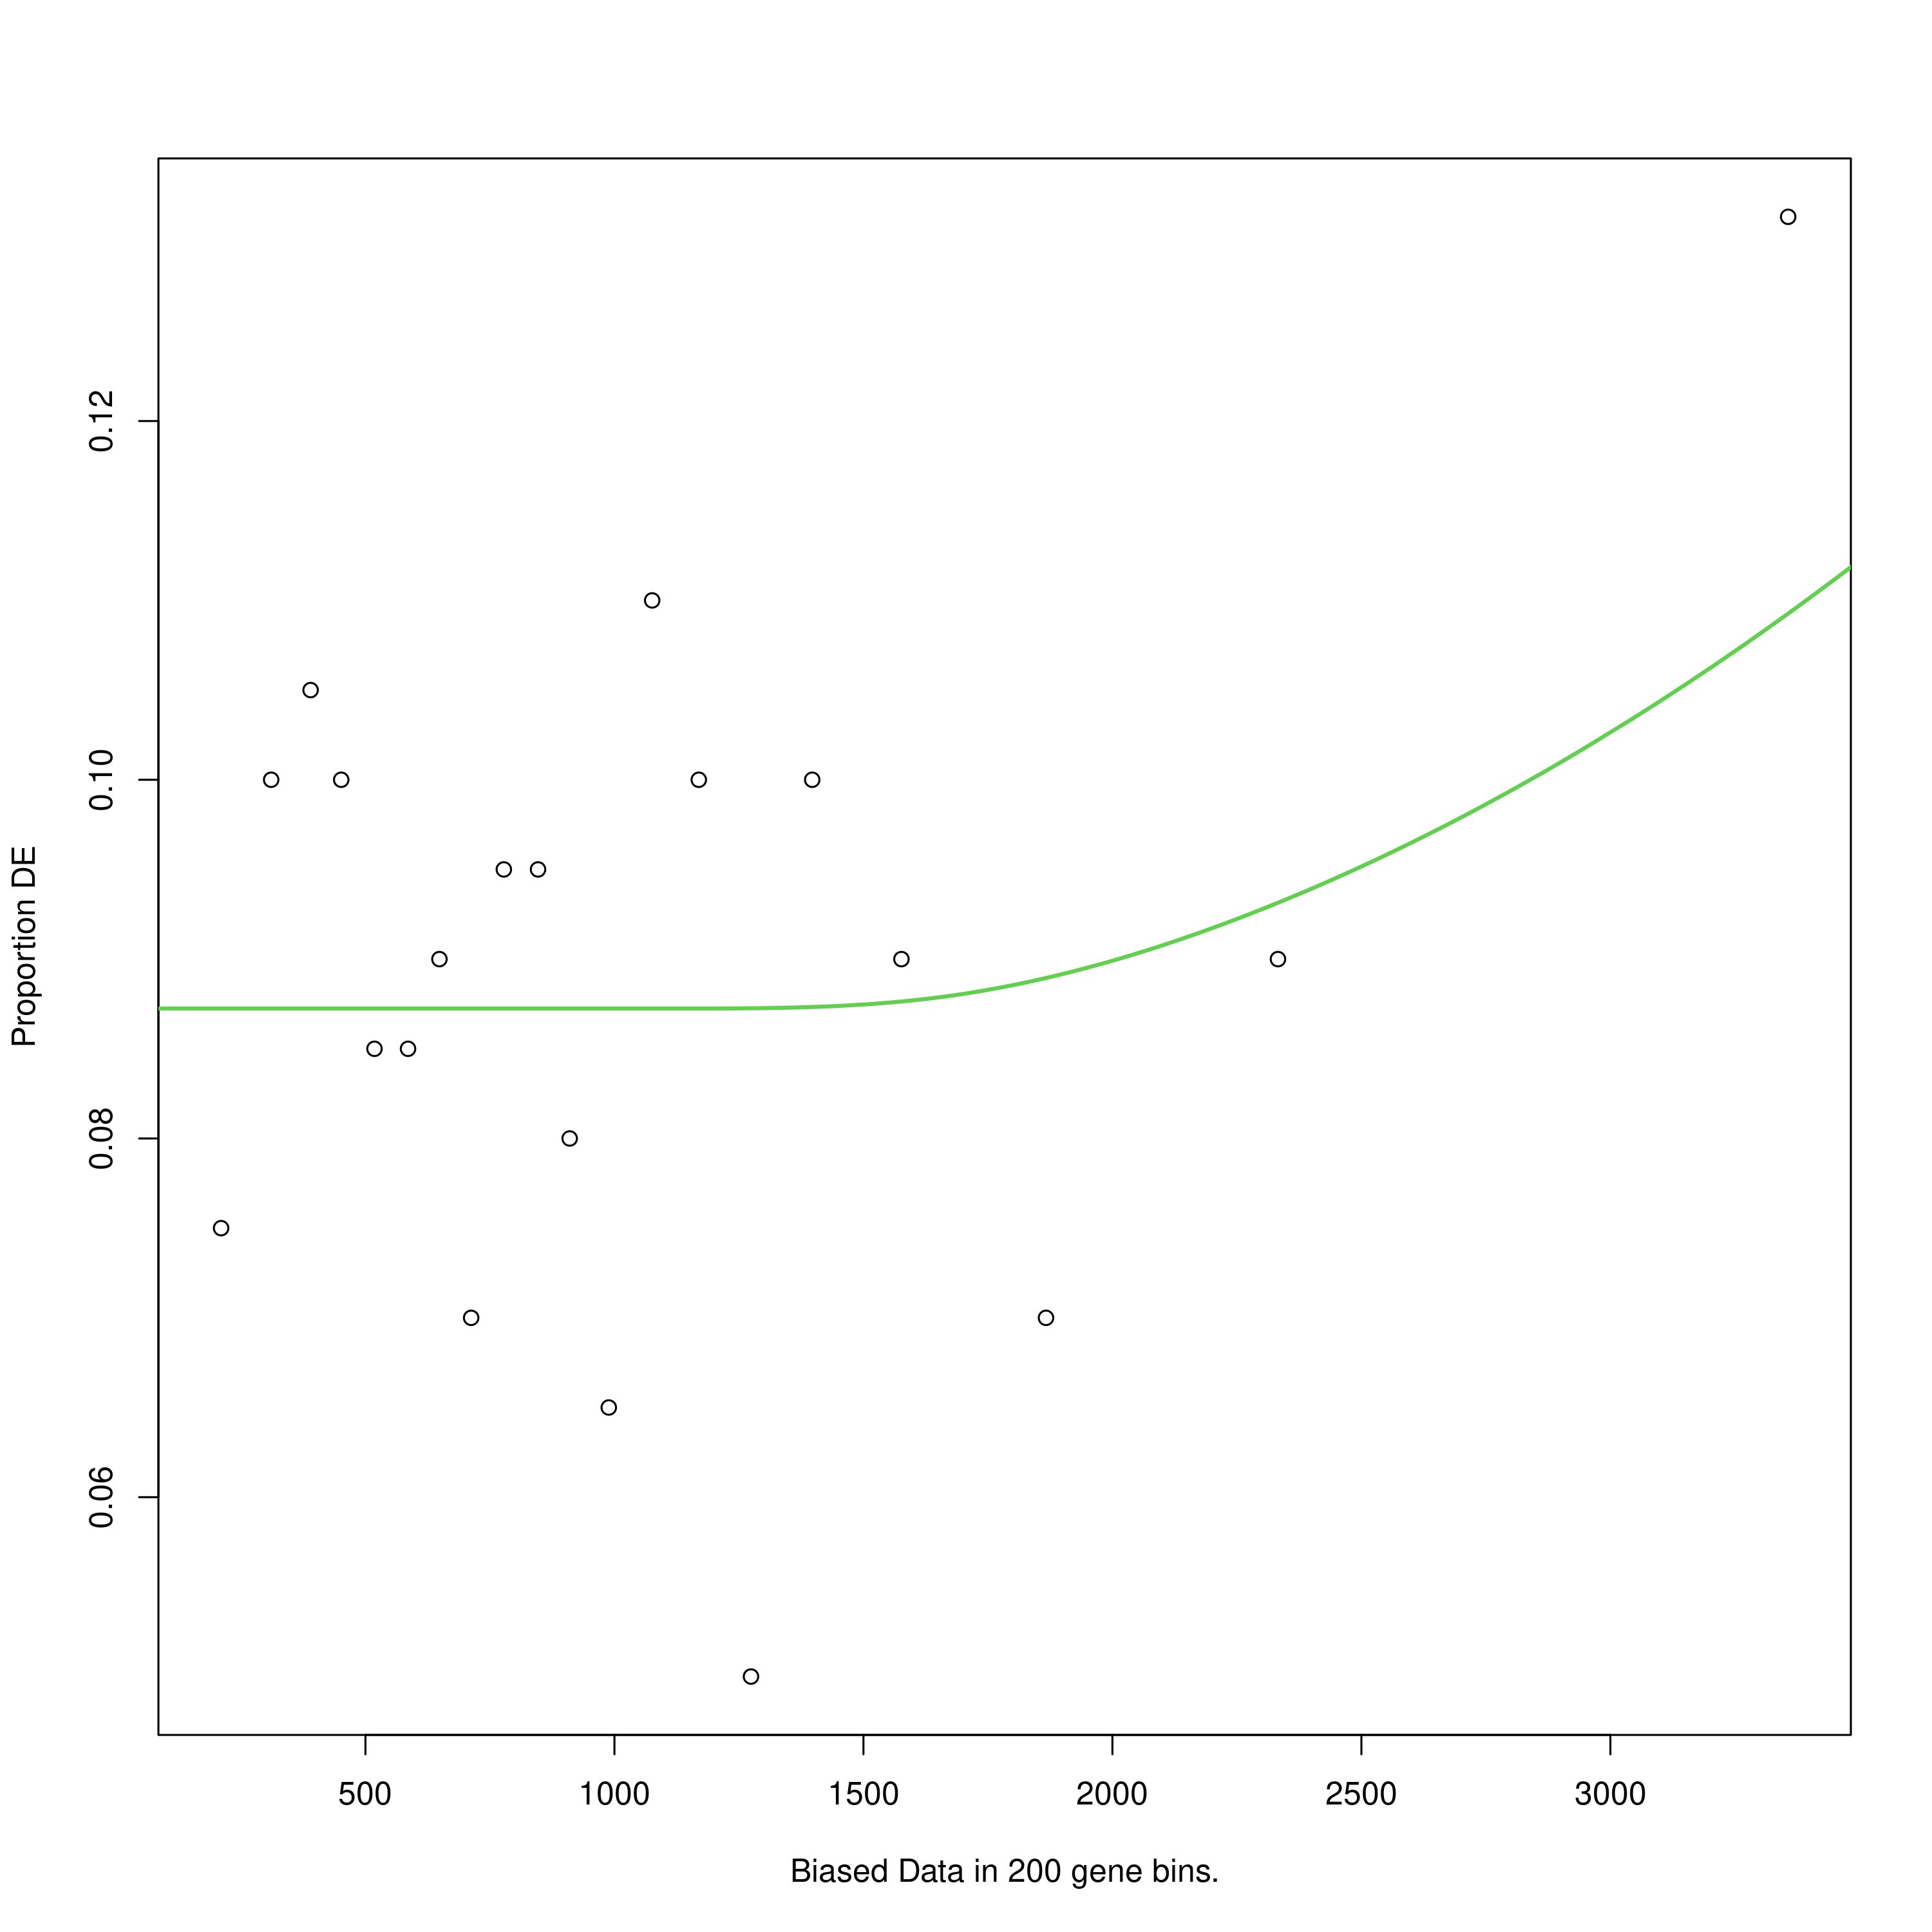

Using manually entered categories.

For 54 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining, by = "category"


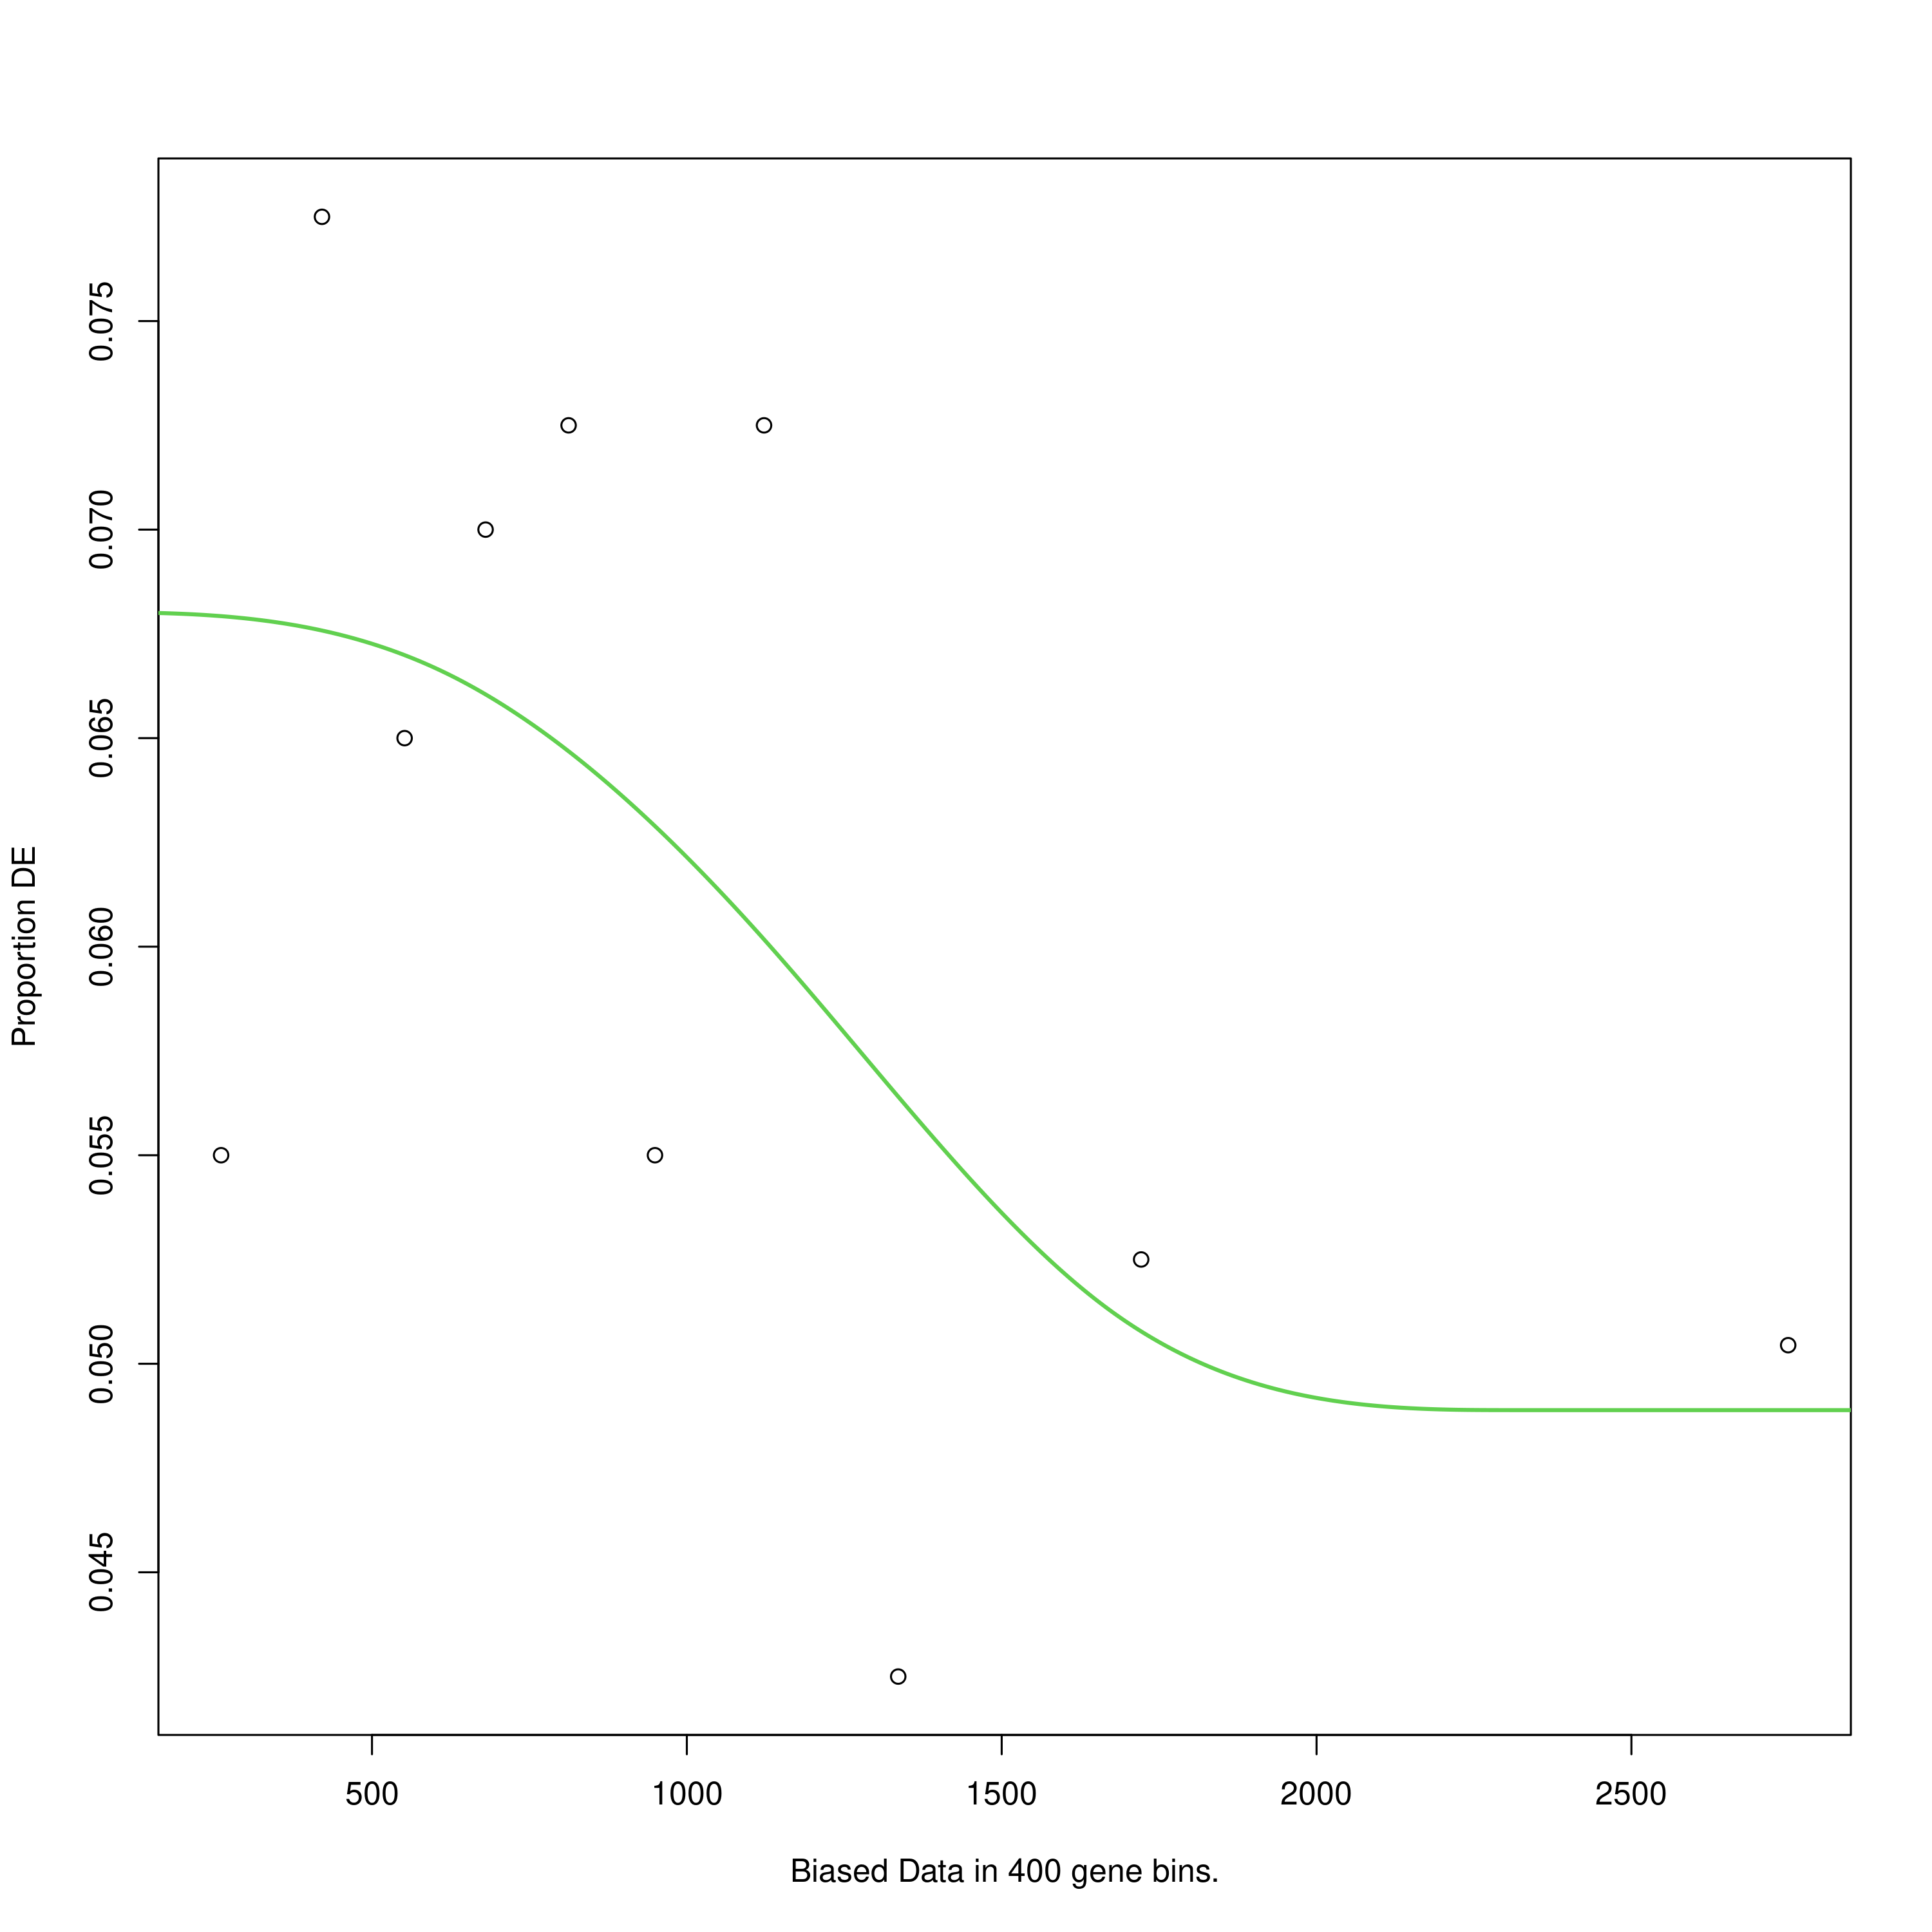

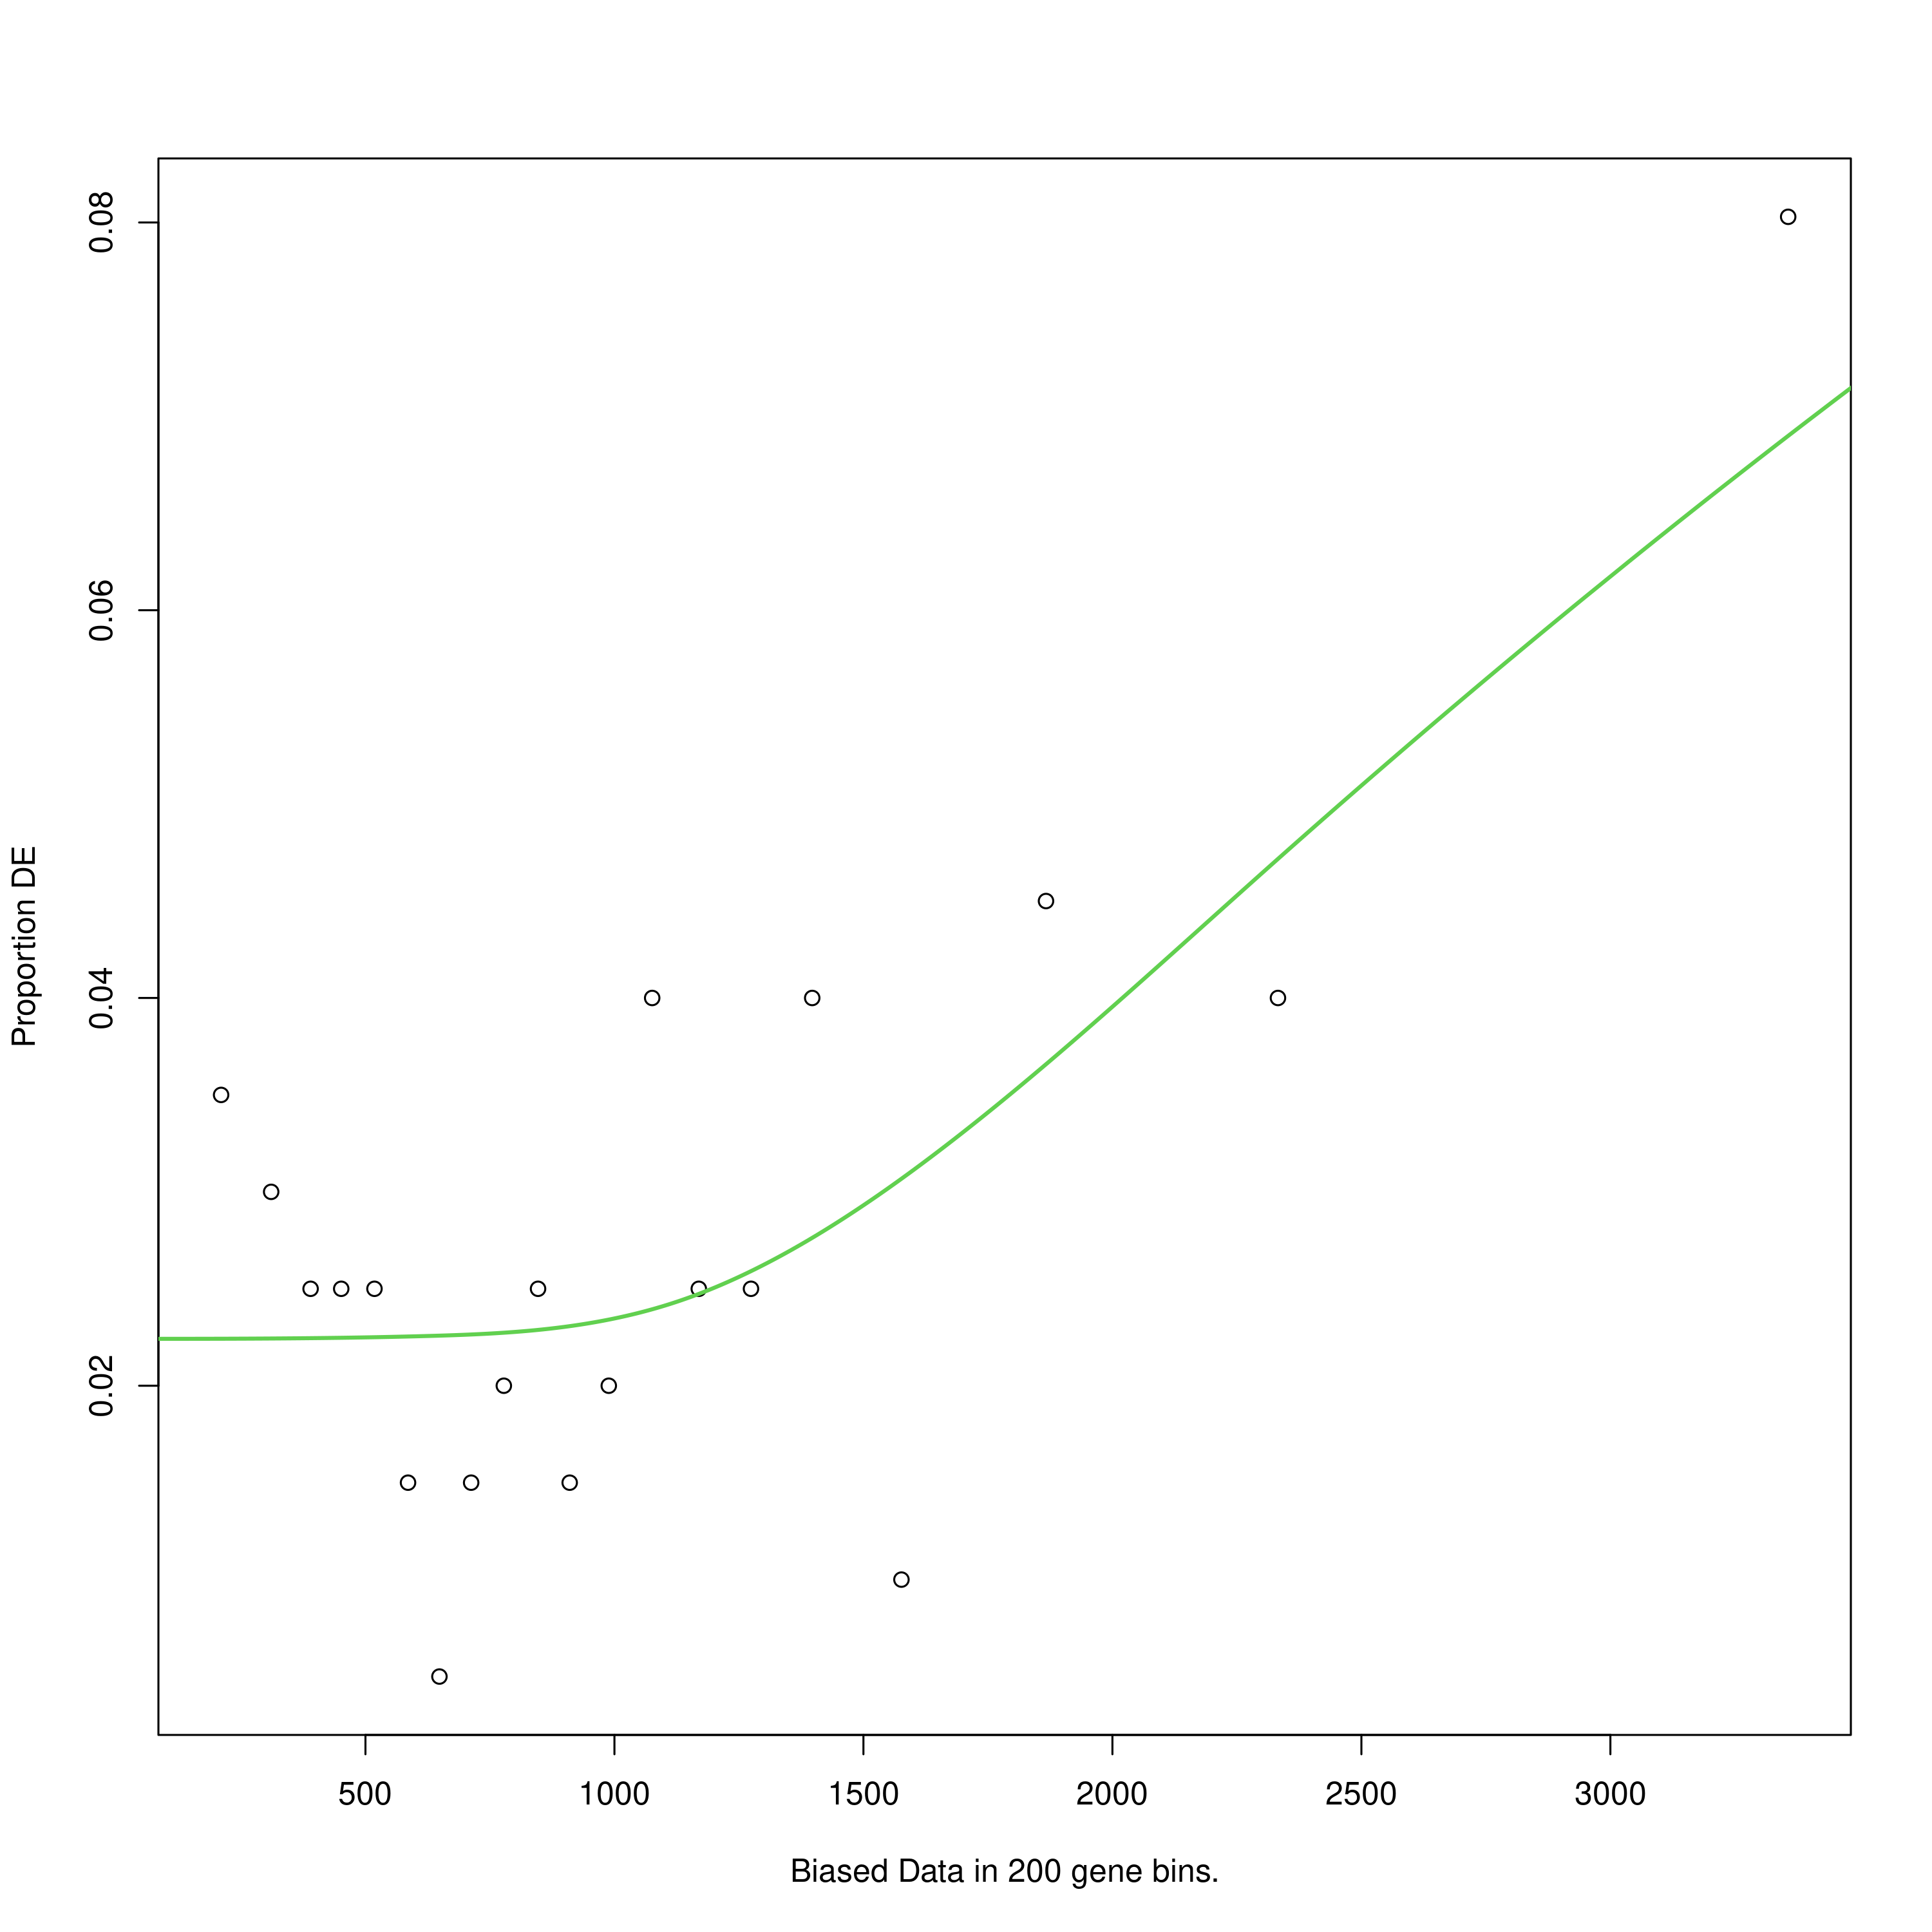

In [91]:
dlist = list()
for (col in c('sub' ,'path')) 
    {
    for (test in c('significant', 'down', 'up')) 
        {
          dlist[[length(dlist) + 1]] <- run_enrichment(col, test)
    }
    
}

goseq_res = bind_rows(dlist)


In [92]:
goseq_res %>%filter(padj < 0.2)

category PATH                                       over_represented_pvalue
1  09142    09142 Cell motility                        5.525532e-13           
2  09132    09132 Signal transduction                  6.247861e-05           
3  09142    09142 Cell motility                        9.969319e-18           
4  09132    09132 Signal transduction                  1.098917e-06           
5  09103    09103 Lipid metabolism                     1.315621e-02           
6  09102    09102 Energy metabolism                    1.604723e-02           
7  09104    09104 Nucleotide metabolism                2.782902e-02           
8  09101    09101 Carbohydrate metabolism              3.478801e-02           
9  02030    02030 Bacterial chemotaxis [PATH:ko02030]  3.200135e-09           
10 00910    00910 Nitrogen metabolism [PATH:ko00910]   3.191049e-07           
11 02020    02020 Two-component system [PATH:ko02020]  4.320602e-06           
12 02040    02040 Flagellar assembly [PATH:ko02040]    6.767078e-06           
13 02030    02030 Bacterial chemotaxis [PATH:ko02030]  3.098074e-12           
14 02020    02020 Two-component system [PATH:ko02020]  7.065529e-08           
15 02040    02040 Flagellar assembly [PATH:ko02040]    7.223747e-08           
16 00910    00910 Nitrogen metabolism [PATH:ko00910]   5.504319e-09           
17 00240    00240 Pyrimidine metabolism [PATH:ko00240] 1.569401e-04           
   padj         under_represented_pvalue numDEInCat numInCat
1  1.105106e-11 1.0000000                32          90     
2  6.247861e-04 0.9999769                28         149     
3  1.993864e-16 1.0000000                32          90     
4  1.098917e-05 0.9999997                25         149     
5  1.604723e-01 0.9967982                 6          70     
6  1.604723e-01 0.9949141                 8         114     
7  1.739401e-01 0.9919236                 6          86     
8  1.739401e-01 0.9849400                11         199     
9  3.200135e-07 1.0000000                19          47     
10 1.595524e-05 1.0000000                 9          13     
11 1.440201e-04 0.9999987                28         130     
12 1.691769e-04 0.9999987                15          48     
13 3.098074e-10 1.0000000                19          47     
14 2.407916e-06 1.0000000                25         130     
15 2.407916e-06 1.0000000                15          48     
16 5.504319e-07 1.0000000                 8          13     
17 7.847004e-03 0.9999851                 6          33     
   main                                       type        enrich organism
1  09140 Cellular Processes                   significant sub    HOT1A3  
2  09130 Environmental Information Processing significant sub    HOT1A3  
3  09140 Cellular Processes                   down        sub    HOT1A3  
4  09130 Environmental Information Processing down        sub    HOT1A3  
5  09100 Metabolism                           up          sub    HOT1A3  
6  09100 Metabolism                           up          sub    HOT1A3  
7  09100 Metabolism                           up          sub    HOT1A3  
8  09100 Metabolism                           up          sub    HOT1A3  
9  09140 Cellular Processes                   significant path   HOT1A3  
10 09100 Metabolism                           significant path   HOT1A3  
11 09130 Environmental Information Processing significant path   HOT1A3  
12 09140 Cellular Processes                   significant path   HOT1A3  
13 09140 Cellular Processes                   down        path   HOT1A3  
14 09130 Environmental Information Processing down        path   HOT1A3  
15 09140 Cellular Processes                   down        path   HOT1A3  
16 09100 Metabolism                           up          path   HOT1A3  
17 09100 Metabolism                           up          path   HOT1A3

In [93]:
goseq_res %>%filter(over_represented_pvalue < 0.05)

category PATH                                                        
1  09142    09142 Cell motility                                         
2  09132    09132 Signal transduction                                   
3  09142    09142 Cell motility                                         
4  09132    09132 Signal transduction                                   
5  09103    09103 Lipid metabolism                                      
6  09102    09102 Energy metabolism                                     
7  09104    09104 Nucleotide metabolism                                 
8  09101    09101 Carbohydrate metabolism                               
9  02030    02030 Bacterial chemotaxis [PATH:ko02030]                   
10 00910    00910 Nitrogen metabolism [PATH:ko00910]                    
11 02020    02020 Two-component system [PATH:ko02020]                   
12 02040    02040 Flagellar assembly [PATH:ko02040]                     
13 00240    00240 Pyrimidine metabolism [PATH:ko00240]                  
14 00061    00061 Fatty acid biosynthesis [PATH:ko00061]                
15 02030    02030 Bacterial chemotaxis [PATH:ko02030]                   
16 02020    02020 Two-component system [PATH:ko02020]                   
17 02040    02040 Flagellar assembly [PATH:ko02040]                     
18 00910    00910 Nitrogen metabolism [PATH:ko00910]                    
19 00240    00240 Pyrimidine metabolism [PATH:ko00240]                  
20 01040    01040 Biosynthesis of unsaturated fatty acids [PATH:ko01040]
21 00061    00061 Fatty acid biosynthesis [PATH:ko00061]                
   over_represented_pvalue padj         under_represented_pvalue numDEInCat
1  5.525532e-13            1.105106e-11 1.0000000                32        
2  6.247861e-05            6.247861e-04 0.9999769                28        
3  9.969319e-18            1.993864e-16 1.0000000                32        
4  1.098917e-06            1.098917e-05 0.9999997                25        
5  1.315621e-02            1.604723e-01 0.9967982                 6        
6  1.604723e-02            1.604723e-01 0.9949141                 8        
7  2.782902e-02            1.739401e-01 0.9919236                 6        
8  3.478801e-02            1.739401e-01 0.9849400                11        
9  3.200135e-09            3.200135e-07 1.0000000                19        
10 3.191049e-07            1.595524e-05 1.0000000                 9        
11 4.320602e-06            1.440201e-04 0.9999987                28        
12 6.767078e-06            1.691769e-04 0.9999987                15        
13 2.120549e-02            4.118946e-01 0.9938478                 7        
14 2.471368e-02            4.118946e-01 0.9945051                 5        
15 3.098074e-12            3.098074e-10 1.0000000                19        
16 7.065529e-08            2.407916e-06 1.0000000                25        
17 7.223747e-08            2.407916e-06 1.0000000                15        
18 5.504319e-09            5.504319e-07 1.0000000                 8        
19 1.569401e-04            7.847004e-03 0.9999851                 6        
20 8.031137e-03            2.677046e-01 0.9997452                 2        
21 1.300606e-02            3.251515e-01 0.9986441                 3        
   numInCat main                                       type        enrich
1   90      09140 Cellular Processes                   significant sub   
2  149      09130 Environmental Information Processing significant sub   
3   90      09140 Cellular Processes                   down        sub   
4  149      09130 Environmental Information Processing down        sub   
5   70      09100 Metabolism                           up          sub   
6  114      09100 Metabolism                           up          sub   
7   86      09100 Metabolism                           up          sub   
8  199      09100 Metabolism                           up          sub   
9   47      09140 Cellular Processes                   sign

In [94]:
goseq_res %>% write_csv(file.path('DE_results','HOT1A3_GOSEQ_results_ref_vs_long.csv'))

In [95]:
path_df = path_df %>% mutate(gene = if_else(gene != '', gene, gene_id))

In [96]:
names(path_df)

[1] "gene_id"       "gene"          "product"       "protein_id"   
 [5] "old_locus_tag" "X"             "path_id"       "main"         
 [9] "sub"           "path"          "ecpath"

In [97]:
path_df_to_export = path_df %>% 
     group_by(gene_id) %>% 
     mutate(
         main = paste0(unique(main), collapse = " // "),
         sub = paste0(unique(sub), collapse = " // "),
         path = paste0(unique(path), collapse = " // "),
         ecpath = paste0(unique(ecpath), collapse = " // ")
     ) %>%
    ungroup() %>%
    distinct(gene_id, .keep_all = TRUE)


In [110]:
names(inner_join(path_df_to_export, res_df))

Joining, by = "gene_id"


[1] "gene_id"        "gene"           "product"        "protein_id"    
 [5] "old_locus_tag"  "X"              "path_id"        "main"          
 [9] "sub"            "path"           "ecpath"         "baseMean"      
[13] "log2FoldChange" "lfcSE"          "stat"           "pvalue"        
[17] "padj"           "contrast"       "na_pvalue"      "na_padj"       
[21] "significant"    "direction"      "status"         "Length"        
[25] "down"           "up"

In [98]:
inner_join(path_df_to_export, res_df) %>% 
  mutate(organism='HOT1A3') %>% 
  select(c('gene_id','gene','product','status',
           'main','sub','path','ecpath',
           'baseMean','log2FoldChange','lfcSE','stat','pvalue','padj','contrast','Length','organism', 'protein_id')) %>%
  write_csv(file.path('DE_results','HOT1A3_DE_genes_DESEQ_ref_vs_long_wKEGG.csv'))

Joining, by = "gene_id"


In [99]:
res_df

gene_id       baseMean    log2FoldChange lfcSE      stat      
1    ACZ81_RS00005 4746.94781  -0.49038345    0.2007087   0.0000000
2    ACZ81_RS00010 1970.93465  -0.41743780    0.1473558   0.0000000
3    ACZ81_RS00015  536.43170  -0.02681061    0.1899096   0.0000000
4    ACZ81_RS00020 2930.11254  -0.35225750    0.2256984   0.0000000
5    ACZ81_RS00025  150.21391  -0.06732803    0.1825782   0.0000000
6    ACZ81_RS00030 2610.28832   0.30138533    0.2271472   0.0000000
7    ACZ81_RS00035 1549.19018   0.72449526    0.1383330   1.6228609
8    ACZ81_RS00040  252.83679  -0.07416826    0.1181960   0.0000000
9    ACZ81_RS00045  884.40980  -0.42992065    0.2055718   0.0000000
10   ACZ81_RS00050  963.26203  -0.23525242    0.1710798   0.0000000
11   ACZ81_RS00055  416.91776   0.14001257    0.2872264   0.0000000
12   ACZ81_RS00060 3219.80776   0.01610801    0.1403593   0.0000000
13   ACZ81_RS00065  979.51881  -0.37579790    0.1645172   0.0000000
14   ACZ81_RS00070 1241.45810   0.57068747    0.2257799   0.3130813
15   ACZ81_RS00075  669.13909   0.01167038    0.1220097   0.0000000
16   ACZ81_RS00080  462.13599   0.16529318    0.1222861   0.0000000
17   ACZ81_RS00085  435.10735   0.29915257    0.1364267   0.0000000
18   ACZ81_RS00090  516.16741   0.10080973    0.2033231   0.0000000
19   ACZ81_RS00095 1294.33877  -0.67533500    0.2026318  -0.8652887
20   ACZ81_RS00100 5254.60879  -0.68367665    0.3474827  -0.5285922
21   ACZ81_RS00105 1423.93069  -1.52177903    0.2443008  -4.1824633
22   ACZ81_RS00110  597.36902  -0.85441087    0.2417659  -1.4659259
23   ACZ81_RS00115 2934.99022  -0.36017450    0.1901497   0.0000000
24   ACZ81_RS00120  254.18259  -0.21366392    0.2054427   0.0000000
25   ACZ81_RS00125  190.06536   0.19467061    0.1693617   0.0000000
26   ACZ81_RS00130  148.46918   0.20552220    0.1668757   0.0000000
27   ACZ81_RS00135  316.48597  -4.60178370    0.7055902  -5.8132660
28   ACZ81_RS00140   86.70296  -0.25462554    0.1530189   0.0000000
29   ACZ81_RS00145  204.84699   0.22208006    0.1847451   0.0000000
30   ACZ81_RS00150  457.64802   0.12403456    0.1137414   0.0000000
⋮    ⋮             ⋮           ⋮              ⋮          ⋮         
3986 ACZ81_RS21530   16.327337  0.09668895    0.43105943  0.0000000
3987 ACZ81_RS21535    3.300236 -1.10109752    0.74688524 -0.8048057
3988 ACZ81_RS21540  240.853121 -0.57418039    0.30763999 -0.2411273
3989 ACZ81_RS21545  688.576634 -0.19221783    0.18008595  0.0000000
3990 ACZ81_RS21550  435.445064 -0.91758995    0.33011228 -1.2649937
3991 ACZ81_RS21555  198.876822  1.79105659    0.23208193  5.5629346
3992 ACZ81_RS21560  217.874340 -0.17882512    0.22136308  0.0000000
3993 ACZ81_RS21565  398.268116 -0.17064266    0.13653413  0.0000000
3994 ACZ81_RS21570   10.306171 -0.71511370    0.42503151 -0.5061124
3995 ACZ81_RS21580    9.415583 -0.97651832    0.39345143 -1.2111236
3996 ACZ81_RS21590  130.782521 -0.98471093    0.33128202 -1.4631368
3997 ACZ81_RS21595   71.746138 -0.88781487    0.30930579 -1.2538235
3998 ACZ81_RS21605   37.449839 -0.57877436    0.33586481 -0.2345419
3999 ACZ81_RS21610   68.173617 -0.37759110    0.35038677  0.0000000
4000 ACZ81_RS21615   79.717100 -0.48761031    0.26524672  0.0000000
4001 ACZ81_RS21620   62.059812 -0.71694834    0.24827487 -0.8738232
4002 ACZ81_RS21625   50.420643 -0.40389643    0.24515791  0.0000000
4003 ACZ81_RS21630  147.811456 -1.76583636    0.38058448 -3.3260325
4004 ACZ81_RS21635   78.527980 -1.72946161    0.37472683 -3.2809543
4005 ACZ81_RS21640   52.986861 -0.75148638    0.26814138 -0.9378872
4006 ACZ81_RS21645  838.570302 -0.58327159    0.20881735 -0.3987772
4007 ACZ81_RS21650   23.947856  0.18349127    0.25640244  0.0000000
4008 ACZ81_RS21655   26.156122 -0.19549360    0.27612218  0.0000000
4009 ACZ81_RS21660   33.978750 -0.04184089    0.25912690  0.0000000
4010 ACZ81_RS21665  875.234381  0.13340413    0.07466491  0.0000000
4011 ACZ81_RS21670  283.315391  0.05496346    0.15921147  0.0000000
4012 ACZ81_RS21675 4900.450778 -0.14990611    0.38375117  0.0

Warning message:
“Removed 78 rows containing missing values (geom_point).”


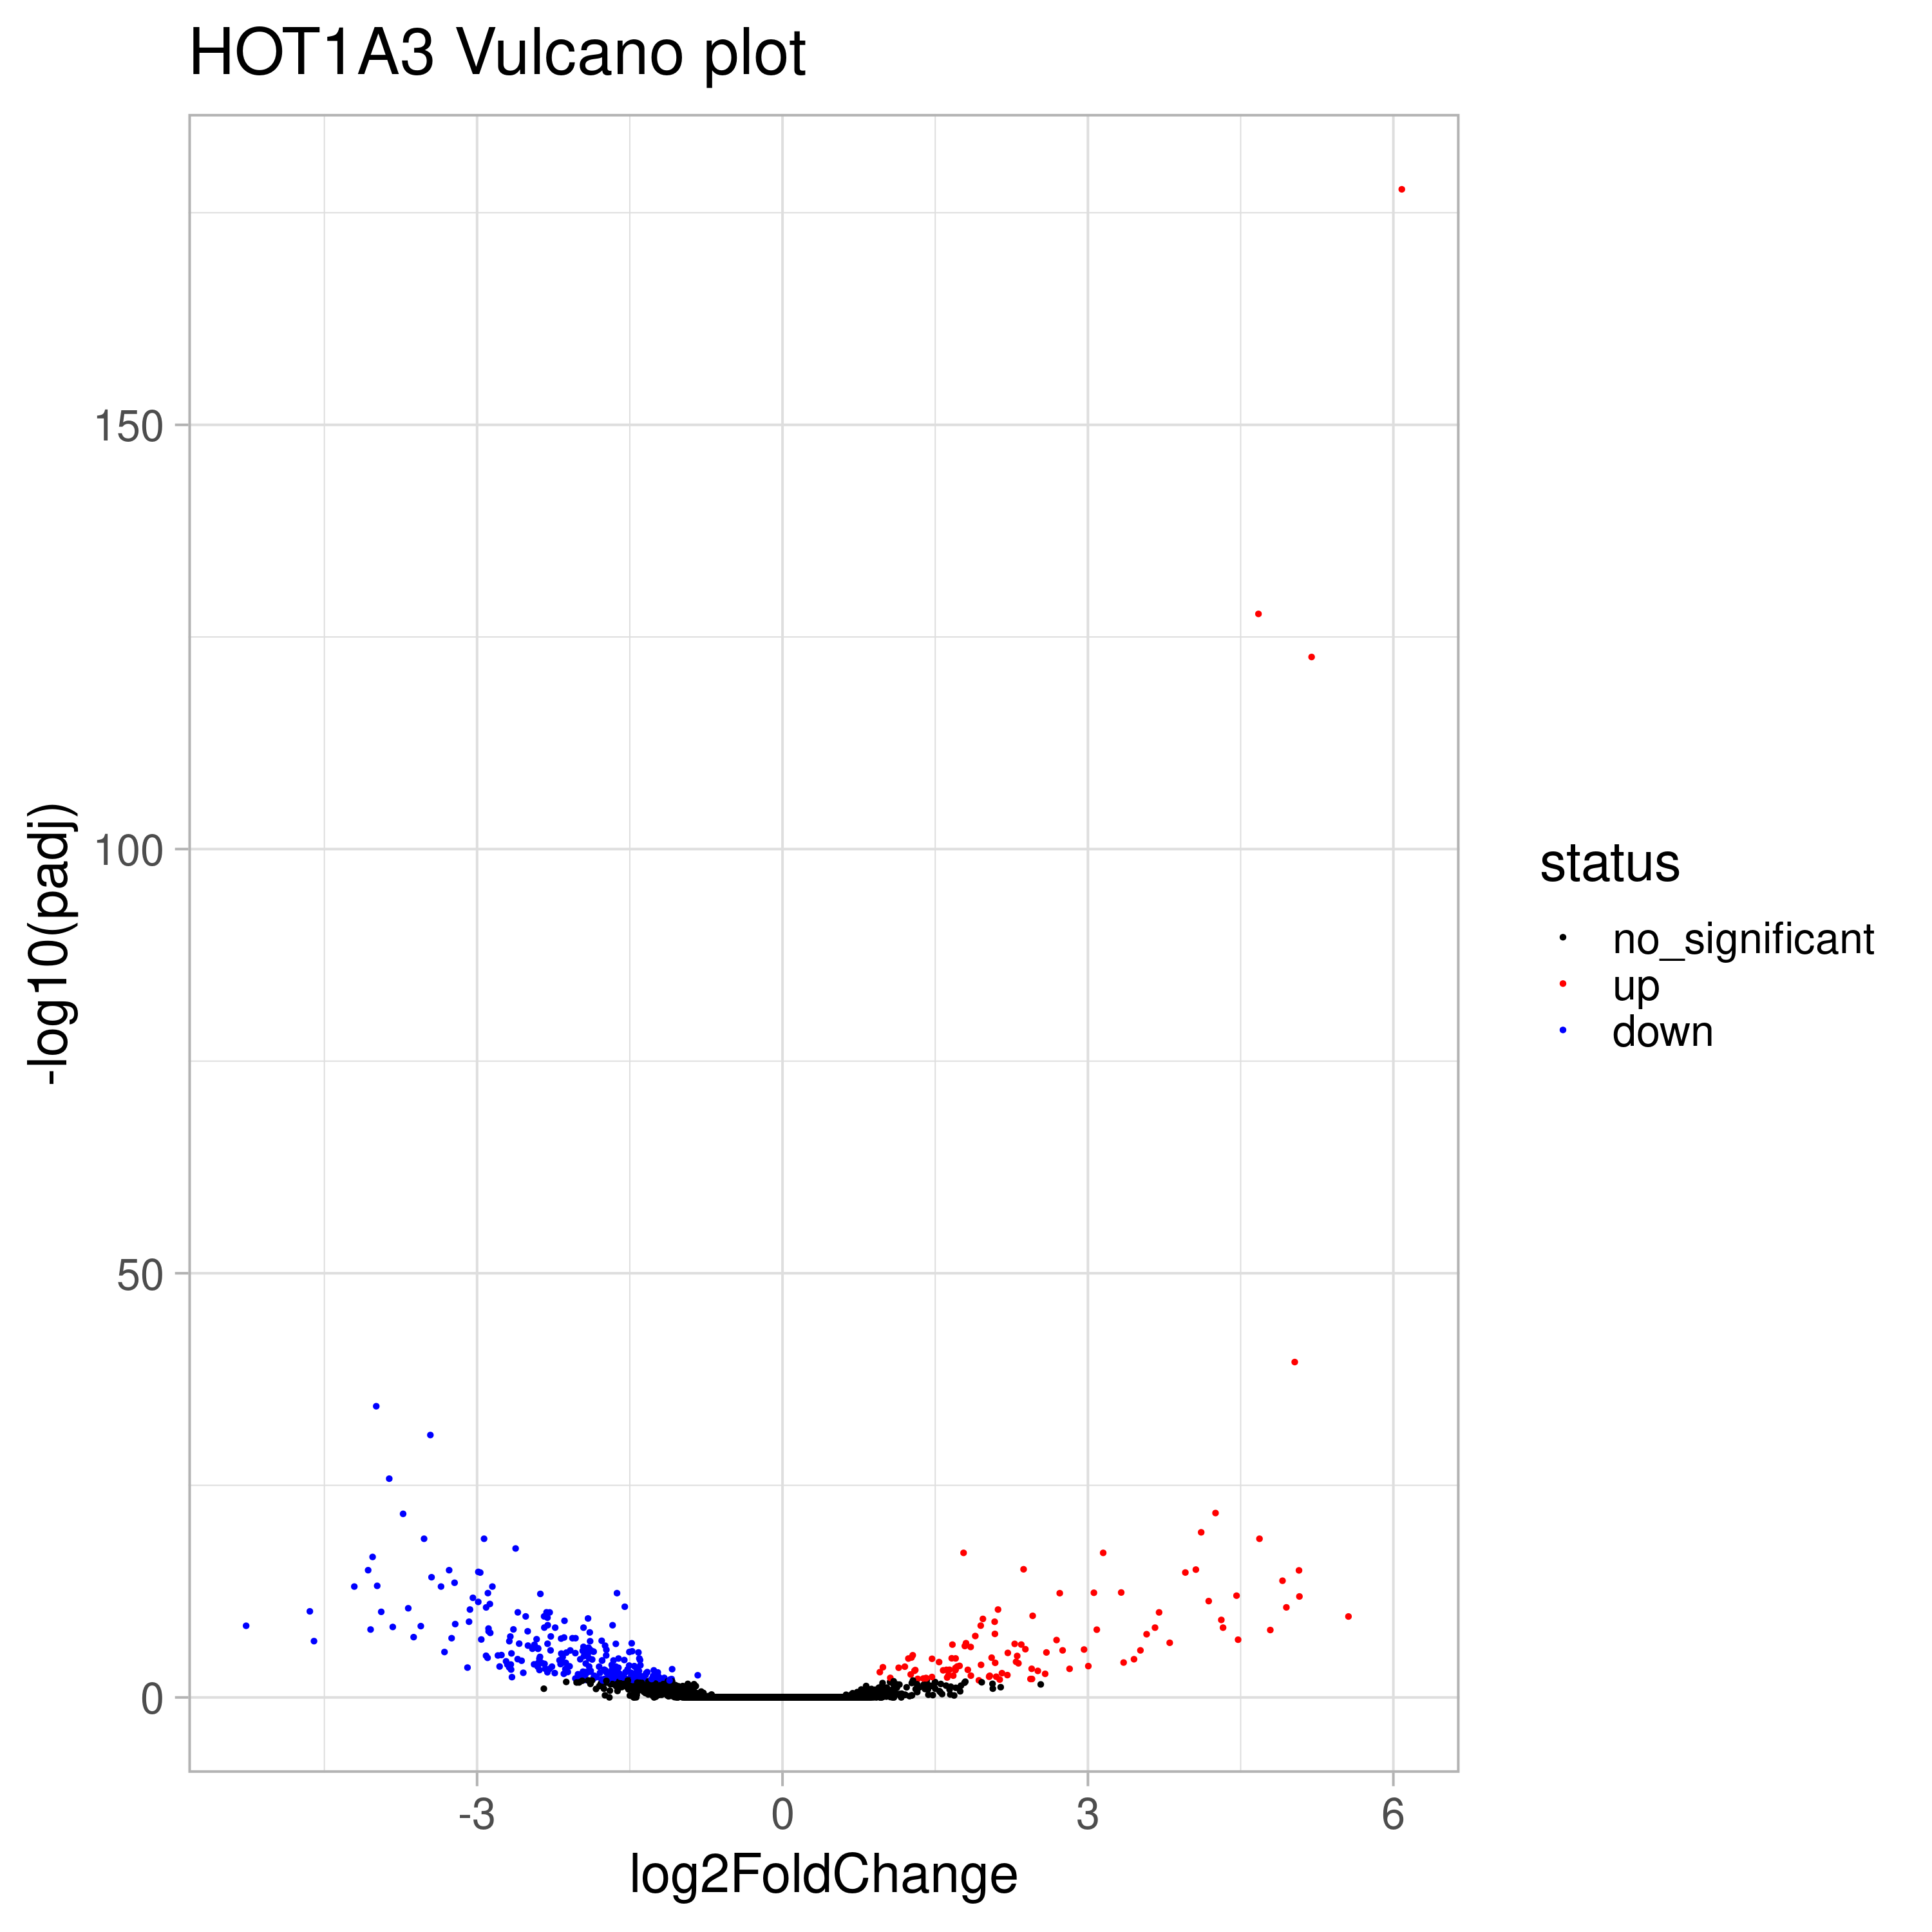

In [100]:
ggplot(res_df, aes(x=log2FoldChange, y=-log10(padj), color=status)) +
  geom_point(size=0.5) +
  scale_color_manual(values = c(no_significant='black',up='red', down='blue' )) +
  ggtitle('HOT1A3 Vulcano plot') +
  theme_light(base_size = 20)
  


Warning message:
“Removed 134 rows containing missing values (geom_point).”


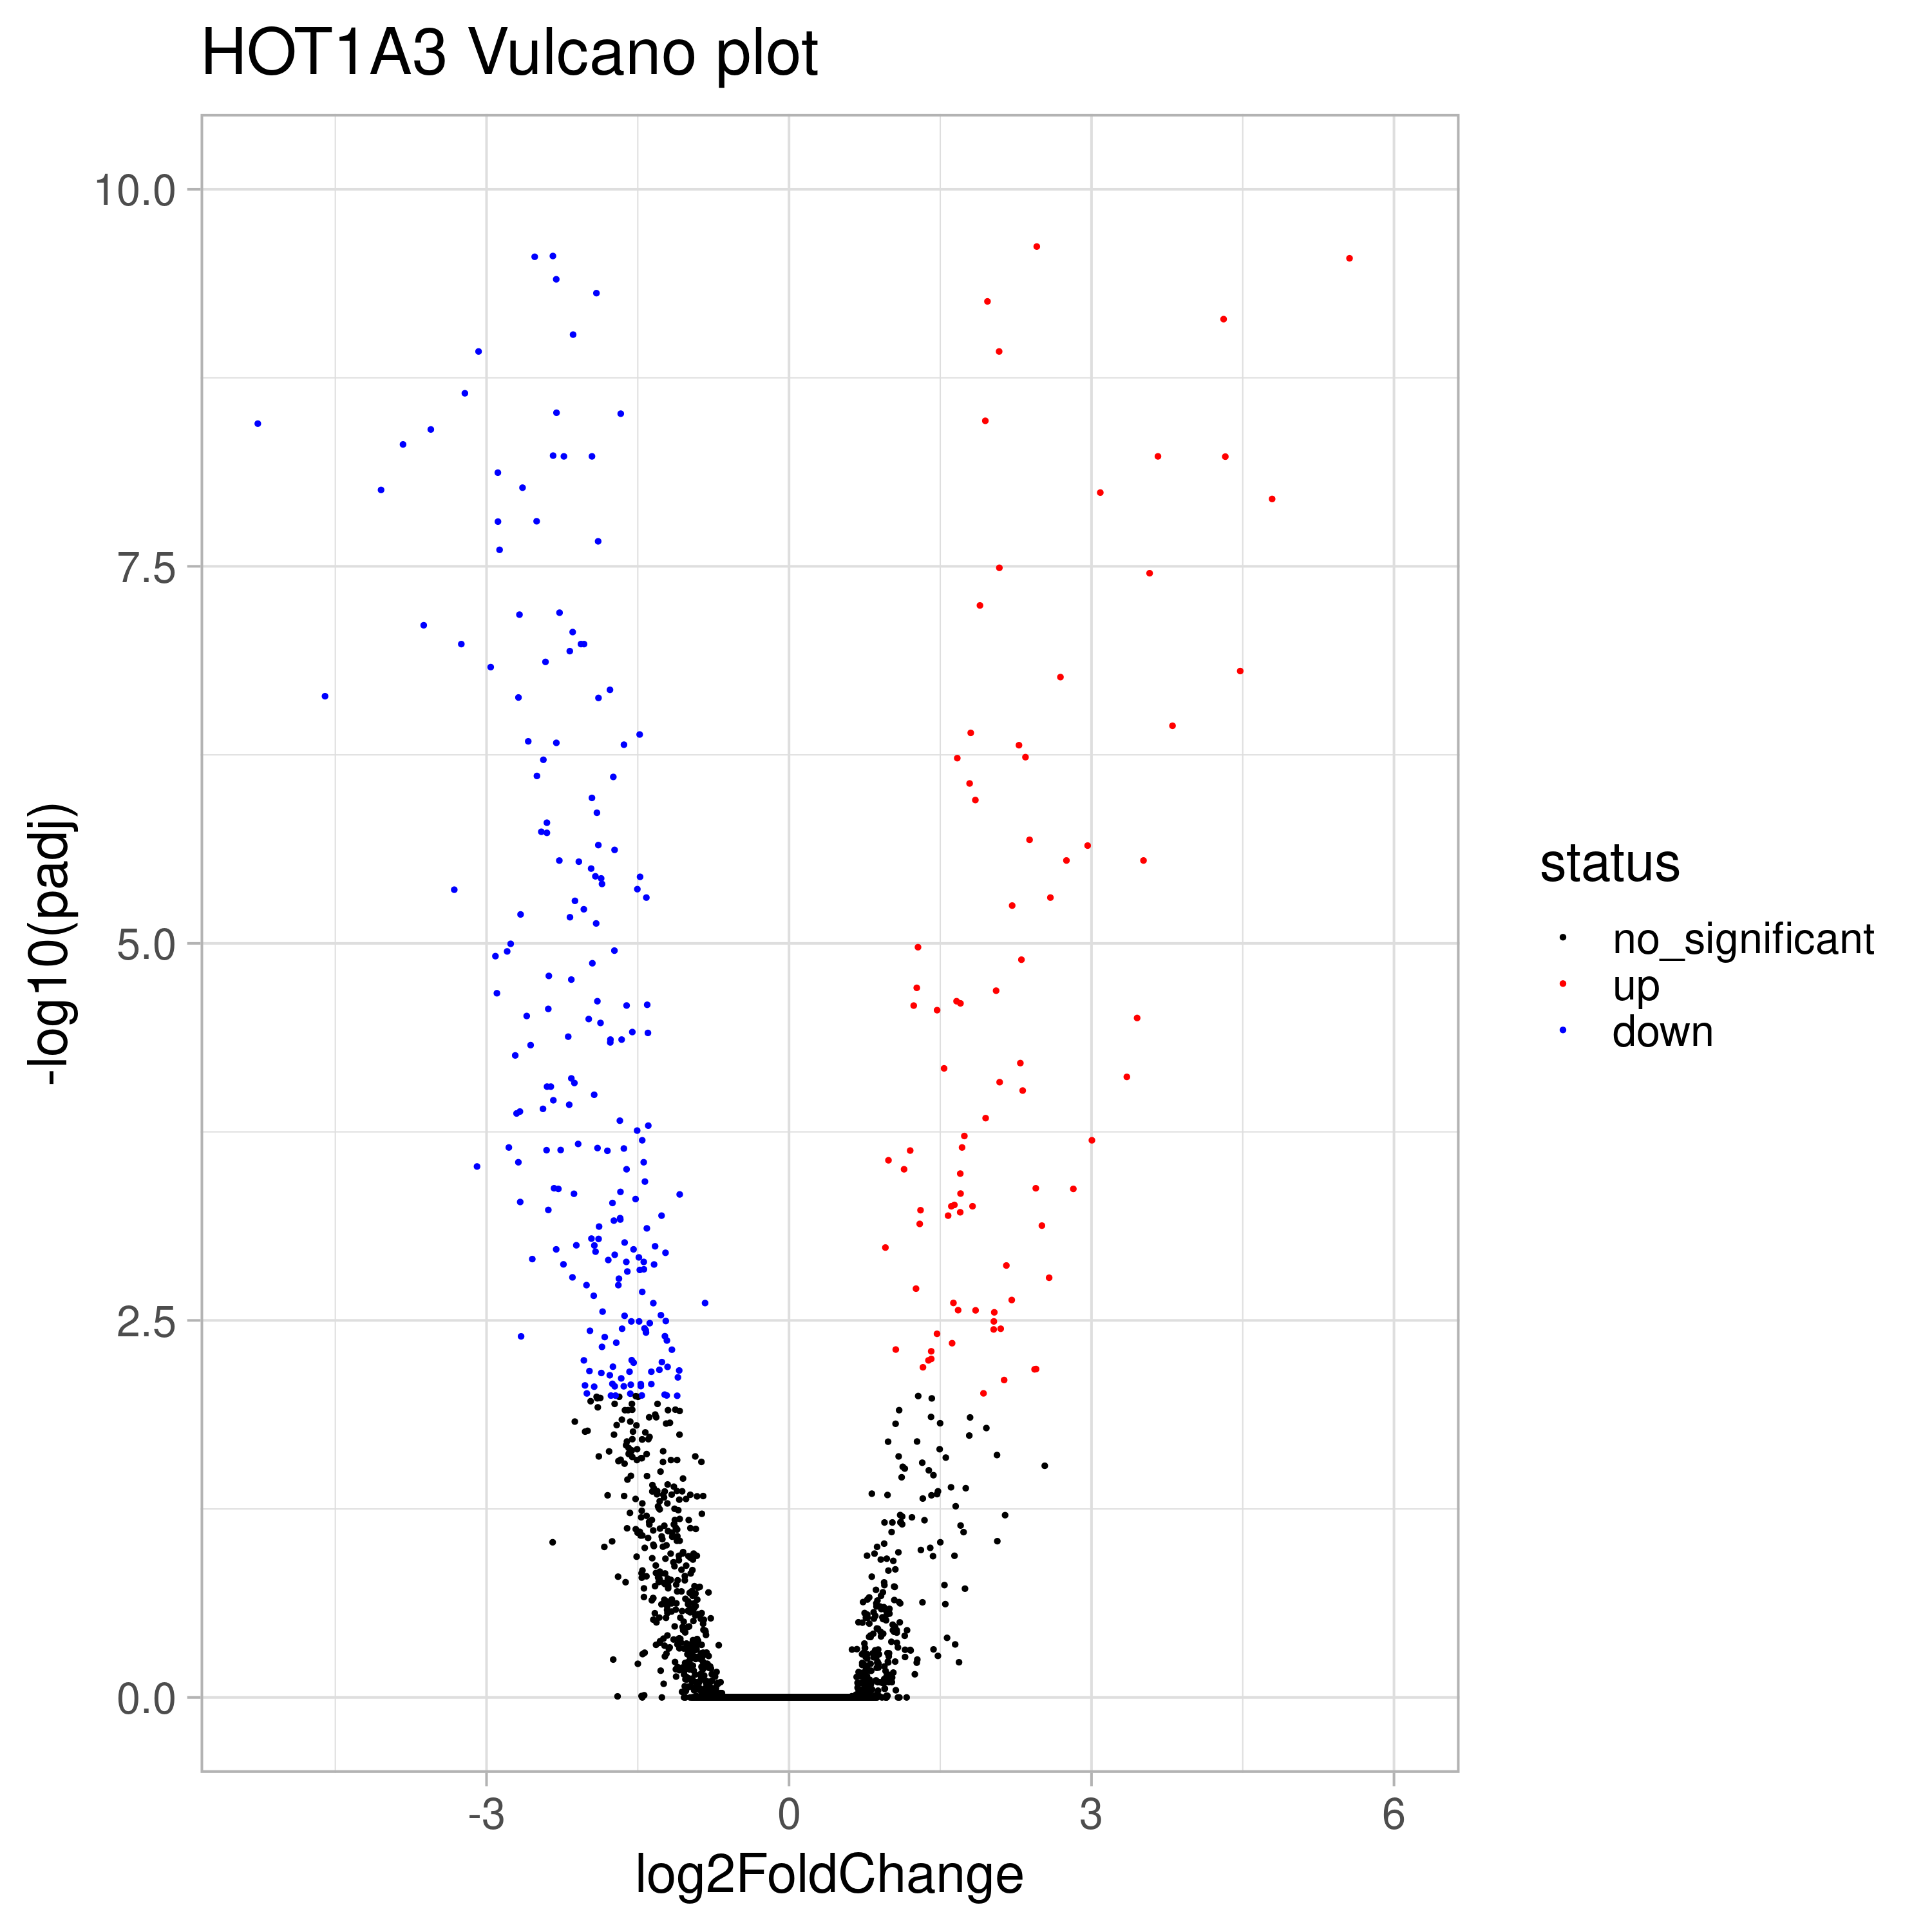

In [101]:
ggplot(res_df, aes(x=log2FoldChange, y=-log10(padj), color=status)) +
  geom_point(size=0.5) +
  scale_color_manual(values = c(no_significant='black',up='red', down='blue' )) +
  ggtitle('HOT1A3 Vulcano plot') +
  theme_light(base_size = 20) + ylim(0,10)
  

  

In [102]:
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 300)

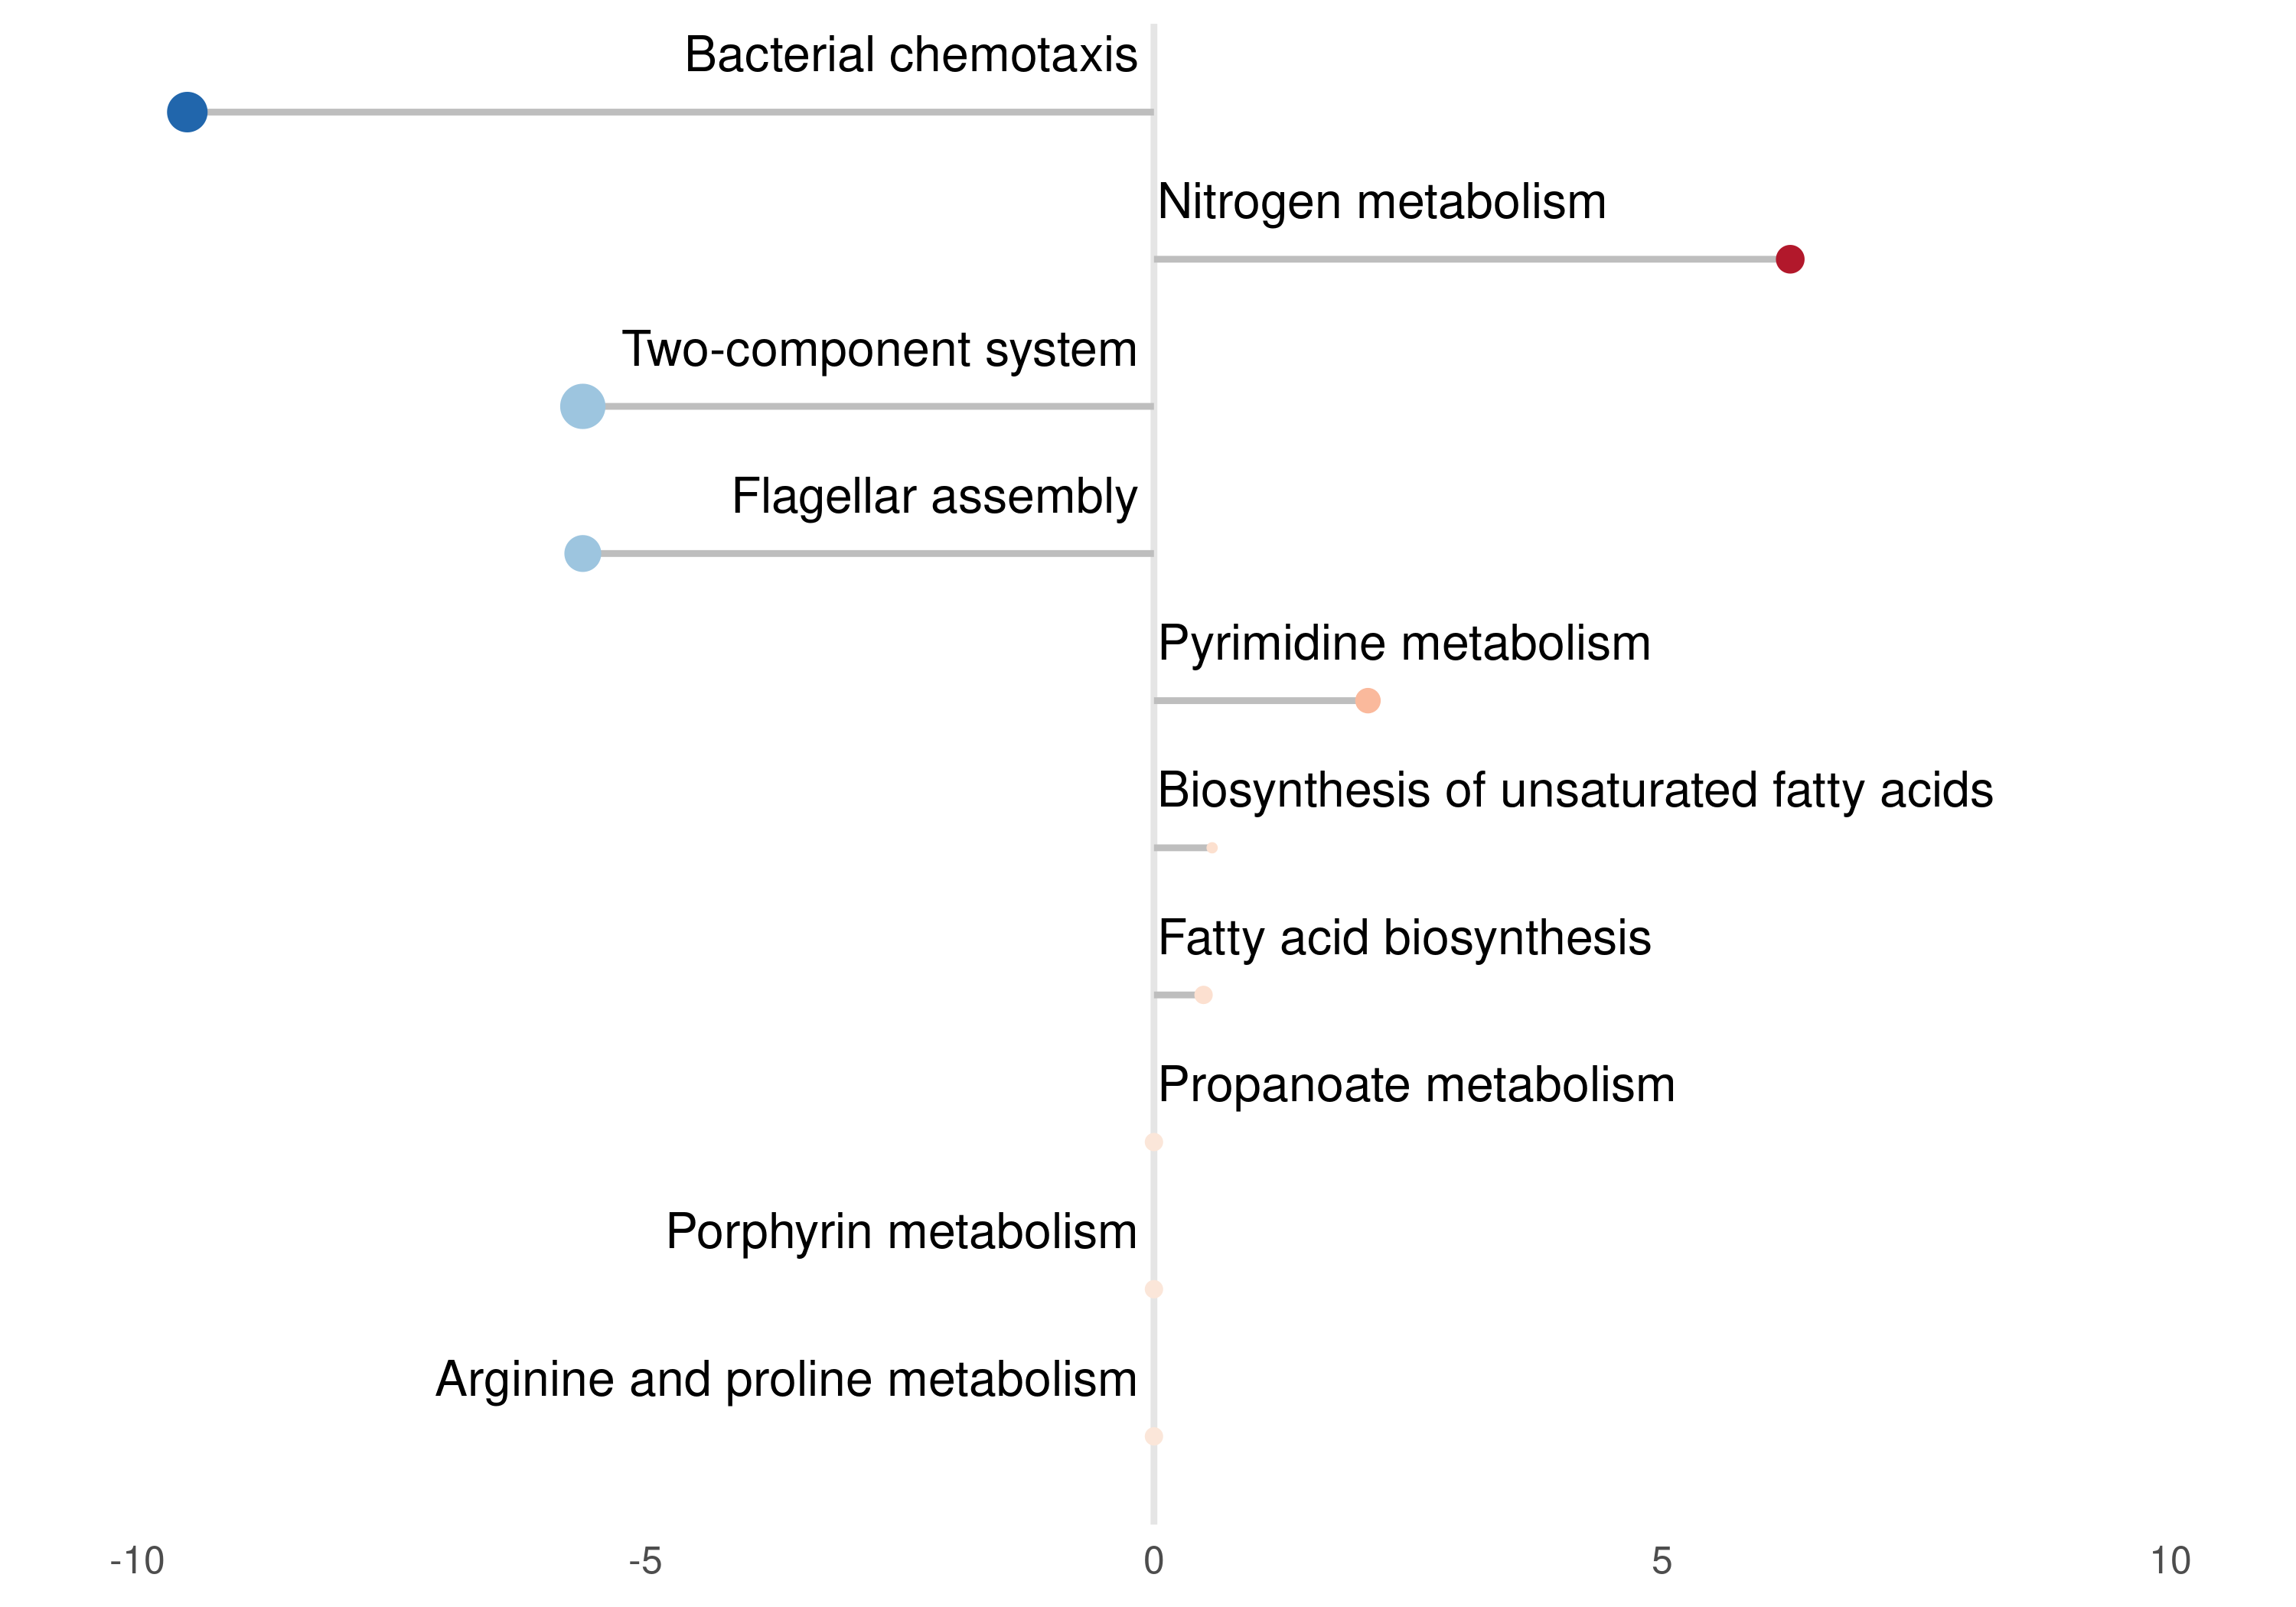

In [103]:
goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=10) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type == 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type == 'down', -0.01, 0.03)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_Score)) %>%

ggplot(aes(y=pathway, x=padj_score, size=numDEInCat)) + 
  geom_vline(aes(xintercept = 0.00), color = "grey90", size = 1) +
  geom_segment( aes(x=0, xend=padj_score, y=pathway, yend=pathway), color="grey", size=1) +
  geom_point(aes(color=padj_score)) + 
 scale_color_distiller(palette = 'RdBu') + # , limit=c(-15,15)) +
  geom_text(aes(x=labelx, y=pathway, label=pathway, size=20, hjust=just), nudge_y=0.4) + #, color='black')) + 
  xlim(-10, 10) +
  #scale_color_manual(values = c(up='red', down='blue')) +
  theme_classic(base_size = 15) + 
  theme(
      axis.title.y=element_blank(),
      axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        legend.position="none")




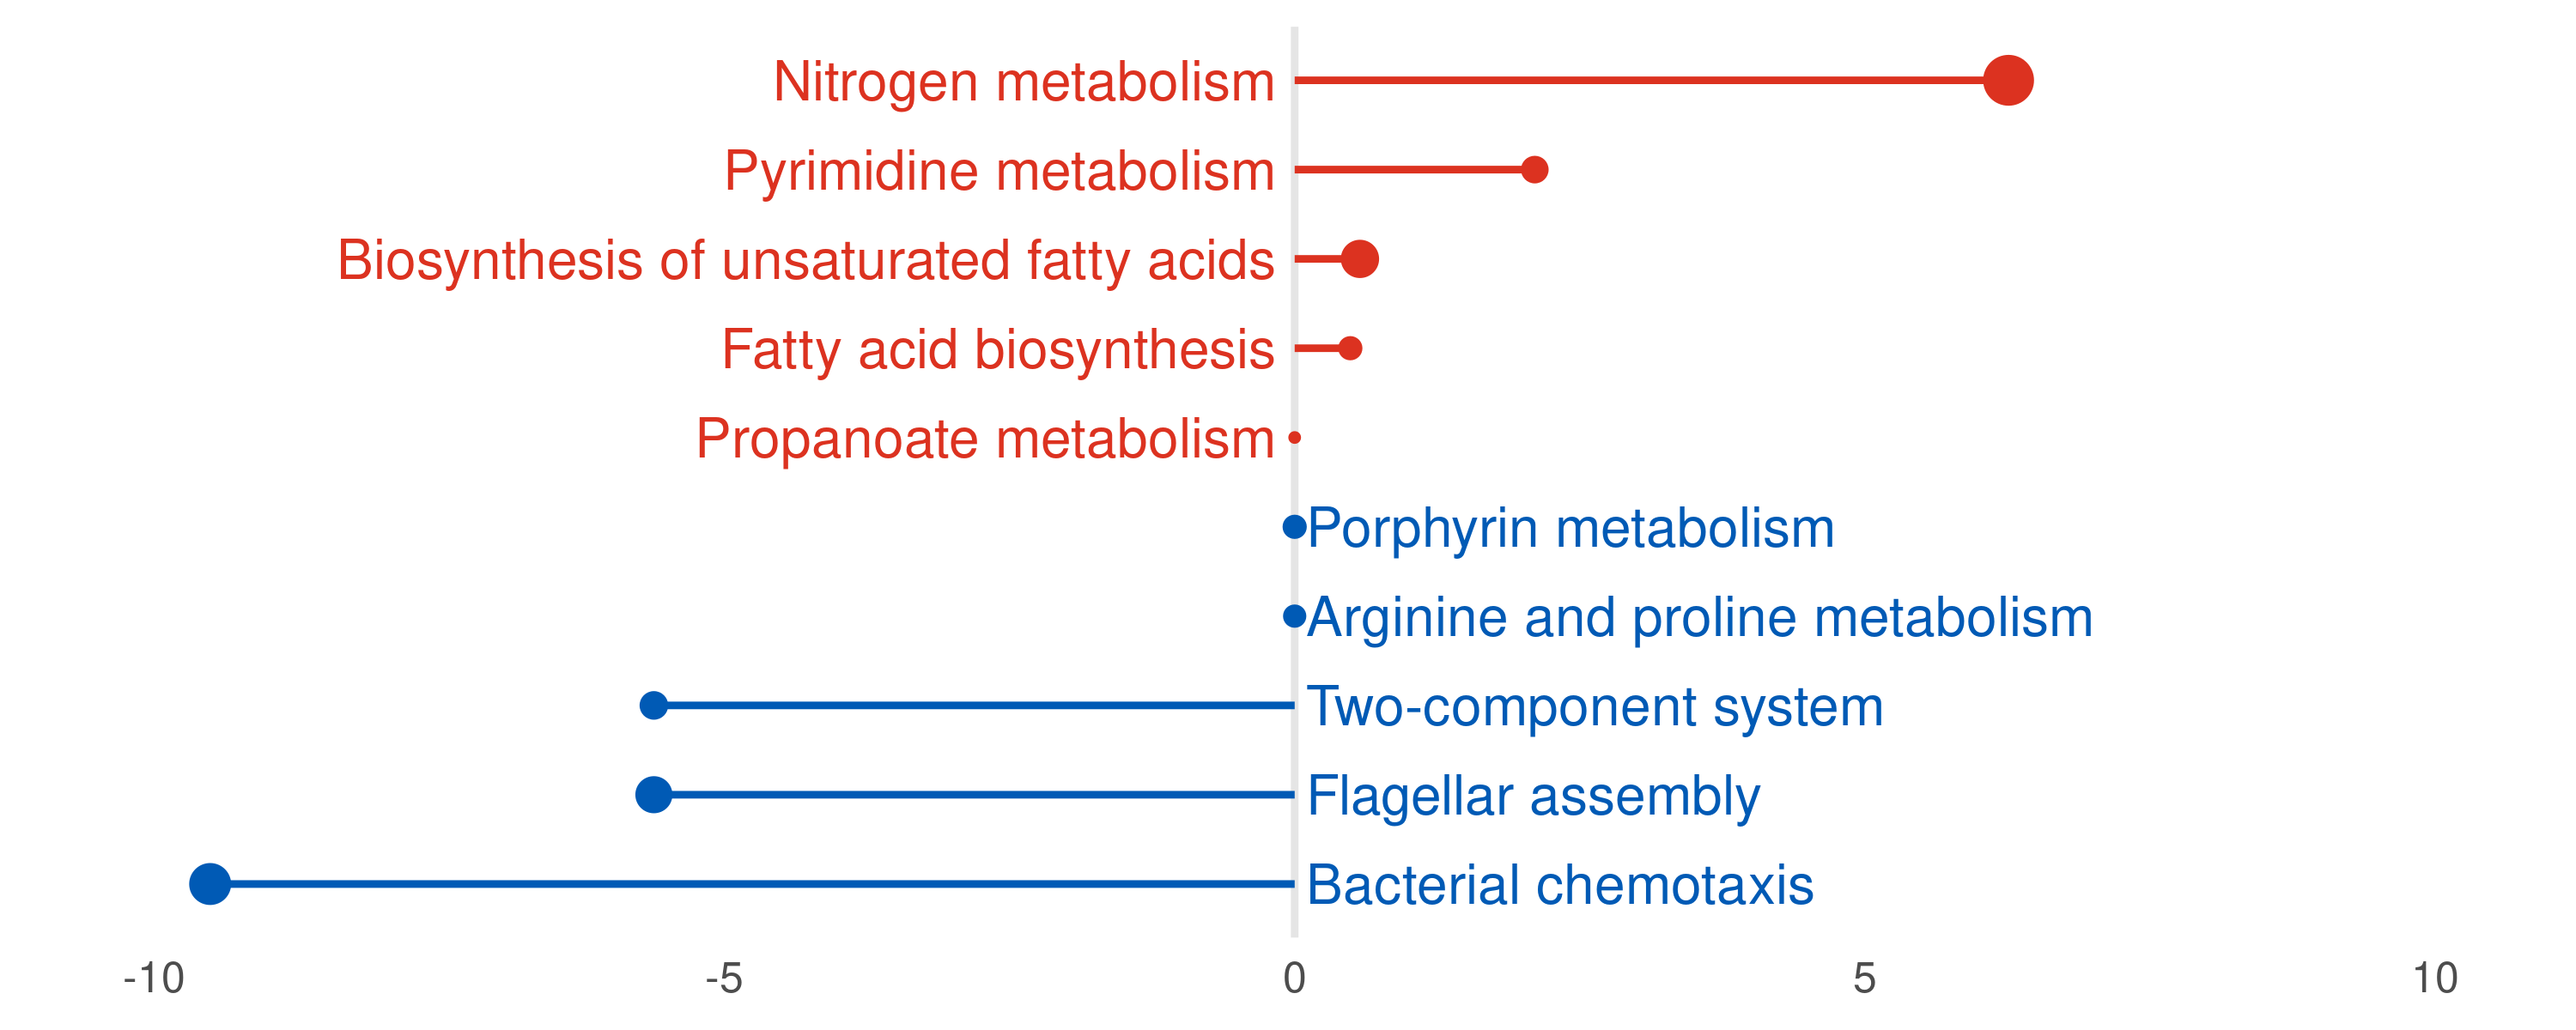

In [104]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)
goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=10) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type != 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type != 'down', -0.03, 0.1)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_score)) %>%


ggplot(aes(y=pathway, x=padj_score, size=Ratio*40, color=type)) + 
  geom_vline(aes(xintercept = 0.00), color = "grey90", size = 1) +
  geom_segment( aes(x=0, xend=padj_score, y=pathway, yend=pathway), size=1) +
  geom_point() + 
 scale_color_manual(values = c(up='#DC3220', down='#005AB5')) + # , limit=c(-15,15)) +

  geom_text(aes(x=labelx, y=pathway, label=pathway, size=20, hjust=just), nudge_y=0) + #, color='black')) + 
  xlim(-10, 10) +
  #scale_color_manual(values = c(up='red', down='blue')) +
  theme_classic(base_size = 15) + 
  theme(
      axis.title.y=element_blank(),
      axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        legend.position="none")




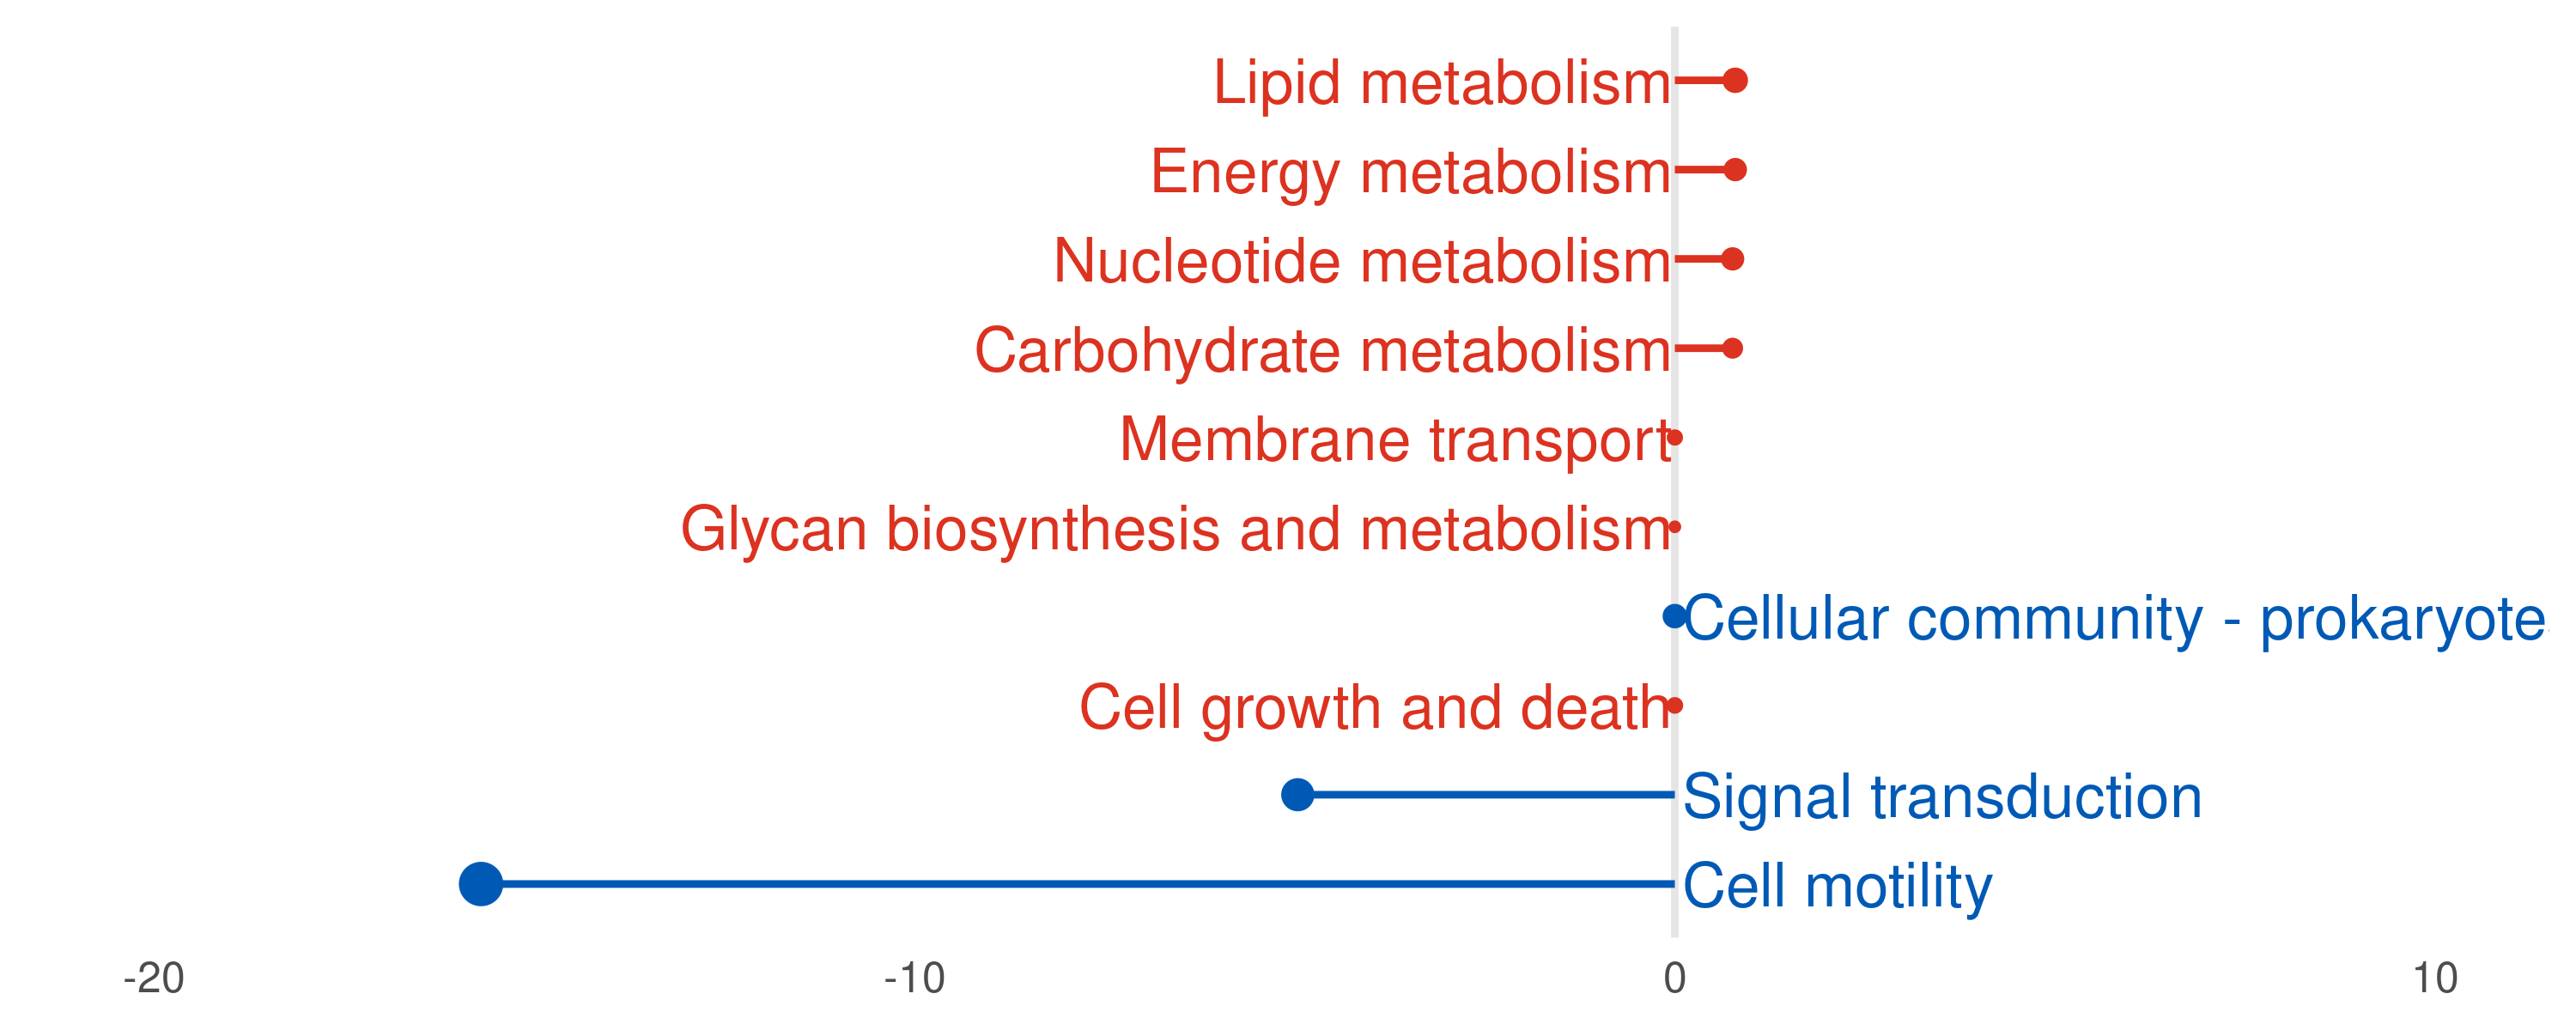

In [109]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)
goseq_res %>% 
  filter(enrich == 'sub') %>%
  #filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=10) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type != 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type != 'down', -0.03, 0.1)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_score)) %>%


ggplot(aes(y=pathway, x=padj_score, size=Ratio*40, color=type)) + 
  geom_vline(aes(xintercept = 0.00), color = "grey90", size = 1) +
  geom_segment( aes(x=0, xend=padj_score, y=pathway, yend=pathway), size=1) +
  geom_point() + 
 scale_color_manual(values = c(up='#DC3220', down='#005AB5')) + # , limit=c(-15,15)) +

  geom_text(aes(x=labelx, y=pathway, label=pathway, size=20, hjust=just), nudge_y=0) + #, color='black')) + 
  xlim(-20, 10) +
  #scale_color_manual(values = c(up='red', down='blue')) +
  theme_classic(base_size = 15) + 
  theme(
      axis.title.y=element_blank(),
      axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        legend.position="none")




In [107]:
goseq_res %>% 
  filter(enrich == 'sub') %>%
  #filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=10) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type != 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type != 'down', -0.03, 0.1)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_score)) 

category pathway                            over_represented_pvalue
1  09142    Cell motility                      9.969319e-18           
2  09132    Signal transduction                1.098917e-06           
3  09103    Lipid metabolism                   1.315621e-02           
4  09102    Energy metabolism                  1.604723e-02           
5  09104    Nucleotide metabolism              2.782902e-02           
6  09101    Carbohydrate metabolism            3.478801e-02           
7  09145    Cellular community - prokaryotes   2.523757e-01           
8  09131    Membrane transport                 3.644746e-01           
9  09107    Glycan biosynthesis and metabolism 4.968344e-01           
10 09143    Cell growth and death              5.303274e-01           
   padj         under_represented_pvalue numDEInCat numInCat
1  1.993864e-16 1.0000000                32          90     
2  1.098917e-05 0.9999997                25         149     
3  1.604723e-01 0.9967982                 6          70     
4  1.604723e-01 0.9949141                 8         114     
5  1.739401e-01 0.9919236                 6          86     
6  1.739401e-01 0.9849400                11         199     
7  1.000000e+00 0.8544640                 8         102     
8  1.000000e+00 0.8332889                 3          80     
9  1.000000e+00 0.7713734                 2          60     
10 1.000000e+00 0.8310758                 1          26     
   main                                       type enrich organism Ratio     
1  09140 Cellular Processes                   down sub    HOT1A3   0.35555556
2  09130 Environmental Information Processing down sub    HOT1A3   0.16778523
3  09100 Metabolism                           up   sub    HOT1A3   0.08571429
4  09100 Metabolism                           up   sub    HOT1A3   0.07017544
5  09100 Metabolism                           up   sub    HOT1A3   0.06976744
6  09100 Metabolism                           up   sub    HOT1A3   0.05527638
7  09140 Cellular Processes                   down sub    HOT1A3   0.07843137
8  09130 Environmental Information Processing up   sub    HOT1A3   0.03750000
9  09100 Metabolism                           up   sub    HOT1A3   0.03333333
10 09140 Cellular Processes                   up   sub    HOT1A3   0.03846154
   padj_Score ratio       just  labelx padj_score 
1  15.7003045 -0.35555556 left   0.10  -15.7003045
2   4.9590351 -0.16778523 left   0.10   -4.9590351
3   0.7945999  0.08571429 right -0.03    0.7945999
4   0.7945999  0.07017544 right -0.03    0.7945999
5   0.7596004  0.06976744 right -0.03    0.7596004
6   0.7596004  0.05527638 right -0.03    0.7596004
7   0.0000000 -0.07843137 left   0.10    0.0000000
8   0.0000000  0.03750000 right -0.03    0.0000000
9   0.0000000  0.03333333 right -0.03    0.0000000
10  0.0000000  0.03846154 right -0.03    0.0000000